<a href="https://colab.research.google.com/github/chalika-vanyaa/StartupCampus-Final_Project/blob/main/Tim_20D_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Import Modules & Dataset**

In [ ]:
# giving access to google drive
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [ ]:
filename = "/content/drive/MyDrive/Tim 20D Final Project Drive/dataset-5/"

os.chdir(filename)

#**Data Understanding**

> Bagian ini mencakup pemahaman setiap mart. Dengan demikian, akan ditampilkan data pada setiap mart, informasi dasar mengenai kolom dan tipe data setiap kolom, data statistik deskriptif dari kolom numerik maupun kategorikal, hingga melihat persentase perbandingan penjualan brand sendiri dengan brand lainnya sebagai informasi yang dibutuhkan untuk menjawab *business objective* proyek ini.

##**BritishMart.csv**

In [ ]:
# load BritishMart.csv
britishmart_df = pd.read_csv("BritishMart.csv", delimiter=',')
britishmart_df.head()

,nama_toko,harga_pound,harga_per_unit,unit,nama,kategori,brand_sendiri,tanggal
0,BritishMart,1.35,1.35,l,Alpro Oat Long Life Drink,drinks,False,2021-01-01
1,BritishMart,2.10,2.10,l,Alpro Almond Chilled Drink,drinks,False,2021-01-01
2,BritishMart,1.00,0.70,l,Volvic Touch of Fruit Strawberr…,drinks,False,2021-01-01
3,BritishMart,2.10,2.10,l,Alpro Soya Chilled Drink,drinks,False,2021-01-01
4,BritishMart,1.00,0.70,l,Volvic Touch of Fruit Lemon & Lim…,drinks,False,2021-01-01


In [ ]:
# basic information of df
britishmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979866 entries, 0 to 979865
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   nama_toko       979866 non-null  object 
 1   harga_pound     979866 non-null  float64
 2   harga_per_unit  979866 non-null  float64
 3   unit            979866 non-null  object 
 4   nama            979866 non-null  object 
 5   kategori        979866 non-null  object 
 6   brand_sendiri   979866 non-null  bool   
 7   tanggal         979866 non-null  object 
dtypes: bool(1), float64(2), object(5)
memory usage: 53.3+ MB


In [ ]:
britishmart_df.shape

(979866, 8)

In [ ]:
# statistical data of dataframe
britishmart_df.describe().T

,count,mean,std,min,25%,50%,75%,max
harga_pound,979866.0,5.045403,6.843133,0.25,1.75,2.99,5.5,300.0
harga_per_unit,979866.0,25.310135,159.595147,0.00,3.29,7.30,14.7,11225.0


In [ ]:
britishmart_df.describe(include=object).T

,count,unique,top,freq
nama_toko,979866,1,BritishMart,979866
unit,979866,4,kg,441498
nama,979866,24365,Alpro Oat Long Life Drink,49
kategori,979866,11,food_cupboard,234953
tanggal,979866,1155,2021-01-01,849


In [ ]:
# memeriksa persentase perbandingan penjualan brand sendiri dengan brand lain
britishmart_df['brand_sendiri'].value_counts(normalize=True)

brand_sendiri
False    0.752015
True     0.247985
Name: proportion, dtype: float64

> Terlihat proporsi perbandingan penjualan brand sendiri dengan brand lain sangat jauh, dimana sebanyak 75% penjualan didominasi oleh brand lainnya.

In [ ]:
# memeriksa seluruh kategori yang terjual
britishmart_df['kategori'].sort_values().unique()

array(['baby_products', 'bakery', 'drinks', 'food_cupboard', 'free-from',
       'fresh_food', 'frozen', 'health_products', 'home', 'household',
       'pets'], dtype=object)

In [ ]:
# memeriksa tanggal mulai dan tanggal selesai seluruh transaksi
print("Tanggal Mulai    :", britishmart_df['tanggal'].min())
print("Tanggal Selesai  :", britishmart_df['tanggal'].max())

Tanggal Mulai    : 2021-01-01
Tanggal Selesai  : 2024-02-29


##**CVanyMart.csv**

In [ ]:
# load CVanyMart.csv
cvanymart_df = pd.read_csv("CVanyMart.csv", delimiter=',')
cvanymart_df.head()

,nama_toko,harga_per_unit,unit,nama,tanggal,kategori,brand_sendiri,harga_pound
0,CVanyMart,2.9,l,Scentcerity Calming Zen Room Spray 240ml,2021-01-01,household,False,0.690000
1,CVanyMart,1.2,l,Almat So Soft Luxurious Fabric Conditioner- Li...,2021-01-02,household,False,1.040000
2,CVanyMart,1.1,l,Almat So Soft Fabric Conditioner - Clear Skies...,2021-01-03,household,False,1.156667
3,CVanyMart,1.1,l,Almat So Soft Fabric Conditioner - Pure & Gent...,2021-01-04,household,False,1.215000
4,CVanyMart,1.1,l,Almat So Soft Sunshine Fabric Conditioner 1.26l,2021-01-05,household,False,1.250000


In [ ]:
# basic information of df
cvanymart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240665 entries, 0 to 240664
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   nama_toko       240665 non-null  object 
 1   harga_per_unit  240661 non-null  float64
 2   unit            240661 non-null  object 
 3   nama            240665 non-null  object 
 4   tanggal         240665 non-null  object 
 5   kategori        240665 non-null  object 
 6   brand_sendiri   240665 non-null  bool   
 7   harga_pound     240665 non-null  float64
dtypes: bool(1), float64(2), object(5)
memory usage: 13.1+ MB


In [ ]:
cvanymart_df.shape

(240665, 8)

In [ ]:
# statistical data of dataframe
cvanymart_df.describe().T

,count,mean,std,min,25%,50%,75%,max
harga_per_unit,240661.0,8.074653,47.411055,0.00,2.270,5.200,8.800,2343.80
harga_pound,240665.0,2.181765,1.429038,0.36,1.302,1.782,2.454,15.67


In [ ]:
cvanymart_df.describe(include=object).T

,count,unique,top,freq
nama_toko,240665,1,CVanyMart,240665
unit,240661,4,kg,163955
nama,240665,6139,The Foodie Market Dried Prunes 500g,49
tanggal,240665,1155,2021-01-01,209
kategori,240665,10,fresh_food,81607


In [ ]:
# memeriksa persentase perbandingan penjualan brand sendiri dengan brand lain
cvanymart_df['brand_sendiri'].value_counts(normalize=True)

brand_sendiri
False    0.829564
True     0.170436
Name: proportion, dtype: float64

> Terlihat proporsi perbandingan penjualan brand sendiri dengan brand lain sangat jauh, bahkan jauh lebih sedikit dibanding BritishMart. Terlihat hanya sebesar 17% dari total penjualan yang berasal dari brand sendiri.

In [ ]:
# memeriksa seluruh kategori yang terjual
cvanymart_df['kategori'].sort_values().unique()

array(['baby_products', 'bakery', 'drinks', 'food_cupboard', 'free-from',
       'fresh_food', 'frozen', 'health_products', 'household', 'pets'],
      dtype=object)

In [ ]:
# memeriksa tanggal mulai dan tanggal selesai seluruh transaksi
print("Tanggal Mulai    :", cvanymart_df['tanggal'].min())
print("Tanggal Selesai  :", cvanymart_df['tanggal'].max())

Tanggal Mulai    : 2021-01-01
Tanggal Selesai  : 2024-02-29


##**CVFamz.csv**

In [ ]:
# load CVFamz.csv
cvfamz_df = pd.read_csv("CVFamz.csv", delimiter=',')
cvfamz_df.head()

<ipython-input-20-0f05a3daa31f>:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  cvfamz_df = pd.read_csv("CVFamz.csv", delimiter=',')


,nama_toko,harga_pound,harga_per_unit,unit,nama,kategori,brand_sendiri,tanggal
0,CVFamz,45.00,45.00,unit,TP-Link Tapo C310 Outdoor Security Wi-Fi Camera,home,False,2021-01-01
1,CVFamz,55.00,55.00,unit,Amazon Echo Dot 5Th Gen Charcoal,home,False,2021-01-01
2,CVFamz,20.00,4.00,m,Energizer UK 3 Pin Smart 5m Flexi Strip Light,home,False,2021-01-01
3,CVFamz,3.65,0.73,unit,Status Electrical PVC Insulating Tape 10 Metre...,home,False,2021-01-01
4,CVFamz,17.00,17.00,unit,Wahl Colour Trim Stubble & Beard Trimmer,home,False,2021-01-01


In [ ]:
# basic information of df
cvfamz_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299188 entries, 0 to 1299187
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   nama_toko       1299188 non-null  object 
 1   harga_pound     1299184 non-null  float64
 2   harga_per_unit  1299078 non-null  float64
 3   unit            1299078 non-null  object 
 4   nama            1299167 non-null  object 
 5   kategori        1299188 non-null  object 
 6   brand_sendiri   1299167 non-null  object 
 7   tanggal         1299188 non-null  object 
dtypes: float64(2), object(6)
memory usage: 79.3+ MB


> Terlihat pada kolom `brand_sendiri`, tipe datanya merupakan object. Hal ini terjadi karena terdapat nilai nan pada kolom tersebut. Nilai ini akan di-*handling* pada *subsection* Missing Values.

In [ ]:
cvfamz_df.shape

(1299188, 8)

In [ ]:
# statistical data of dataframe
cvfamz_df.describe().T

,count,mean,std,min,25%,50%,75%,max
harga_pound,1299184.0,5.749758,9.363229,0.05,1.7,3.0,6.5,479.99
harga_per_unit,1299078.0,74.307718,1110.266423,0.00,3.4,7.5,15.8,99778.00


In [ ]:
cvfamz_df.describe(include=object).T

,count,unique,top,freq
nama_toko,1299188,1,CVFamz,1299188
unit,1299078,4,kg,560749
nama,1299167,30726,TP-Link Tapo C310 Outdoor Security Wi-Fi Camera,49
kategori,1299188,11,food_cupboard,270911
brand_sendiri,1299167,2,False,917220
tanggal,1299188,1155,2021-01-01,1125


In [ ]:
# memeriksa persentase perbandingan penjualan brand sendiri dengan brand lain
cvfamz_df['brand_sendiri'].value_counts(normalize=True)

brand_sendiri
False    0.706006
True     0.293994
Name: proportion, dtype: float64

> Terlihat proporsi perbandingan penjualan brand sendiri dengan brand lain masih cukup jauh, tetapi masih lebih besar dibanding dua mart sebelumnya. Pada mart ini, sebanyak 70% penjualan didominasi oleh brand lainnya.

In [ ]:
# memeriksa seluruh kategori yang terjual
cvfamz_df['kategori'].sort_values().unique()

array(['baby_products', 'bakery', 'drinks', 'food_cupboard', 'free-from',
       'fresh_food', 'frozen', 'health_products', 'home', 'household',
       'pets'], dtype=object)

In [ ]:
# memeriksa tanggal mulai dan tanggal selesai seluruh transaksi
print("Tanggal Mulai    :", cvfamz_df['tanggal'].min())
print("Tanggal Selesai  :", cvfamz_df['tanggal'].max())

Tanggal Mulai    : 2021-01-01
Tanggal Selesai  : 2024-02-29


##**ScottishMart.csv**

In [ ]:
# load ScottishMart.csv
scottishmart_df = pd.read_csv("ScottishMart.csv", delimiter=',')
scottishmart_df.head()

,nama_toko,harga,harga_per_unit,unit,nama,kategori,brand_sendiri,tanggal
0,ScottishMart,0.40,0.0,unit,Swan Vesta Matches 1 Box,household,False,2021-01-01
1,ScottishMart,0.50,0.0,unit,Tesco 200 Cotton Buds,health_products,True,2021-01-01
2,ScottishMart,0.60,0.0,unit,Tesco Nappy Bags 300,baby_products,True,2021-01-01
3,ScottishMart,0.75,0.0,unit,Fred & Flo Cotton Buds 300 Pack,baby_products,True,2021-01-01
4,ScottishMart,0.98,0.0,unit,Stockwell & Co. Sweeteners 850S,drinks,True,2021-01-01


In [ ]:
scottishmart_df[scottishmart_df['harga_per_unit'] == 0.0]

,nama_toko,harga,harga_per_unit,unit,nama,kategori,brand_sendiri,tanggal
0,ScottishMart,0.40,0.0,unit,Swan Vesta Matches 1 Box,household,False,2021-01-01
1,ScottishMart,0.50,0.0,unit,Tesco 200 Cotton Buds,health_products,True,2021-01-01
2,ScottishMart,0.60,0.0,unit,Tesco Nappy Bags 300,baby_products,True,2021-01-01
3,ScottishMart,0.75,0.0,unit,Fred & Flo Cotton Buds 300 Pack,baby_products,True,2021-01-01
4,ScottishMart,0.98,0.0,unit,Stockwell & Co. Sweeteners 850S,drinks,True,2021-01-01
...,...,...,...,...,...,...,...,...
1154817,ScottishMart,0.60,0.0,unit,Tesco Nappy Bags 300,baby_products,True,2024-02-26
1157537,ScottishMart,1.69,0.0,unit,Tesco Luxury Soft Quilted Toilet Tissue 4 Rolls,household,True,2024-02-29
1157979,ScottishMart,9.95,0.0,unit,Cushelle Quilted 50% Longer Lasting Toilet Tis...,household,False,2024-02-29
1157989,ScottishMart,9.75,0.0,unit,Andrex Classic Clean Toilet Tissue 12 Mega Rol...,household,False,2024-02-29


In [ ]:
# basic information of df
scottishmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1158616 entries, 0 to 1158615
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   nama_toko       1158616 non-null  object 
 1   harga           1158616 non-null  float64
 2   harga_per_unit  1158615 non-null  float64
 3   unit            1158615 non-null  object 
 4   nama            1158616 non-null  object 
 5   kategori        1158616 non-null  object 
 6   brand_sendiri   1158616 non-null  bool   
 7   tanggal         1158616 non-null  object 
dtypes: bool(1), float64(2), object(5)
memory usage: 63.0+ MB


> Terlihat terdapat inkonsistensi penamaan kolom dimana pada mart sebelumnya, kolom harga jual direpresentasikan oleh `harga_pound`. Maka dari itu, untuk mempermudah proses merging nantinya, kolom `harga` pada mart ini di-*rename* menjadi `harga_pound`.

In [ ]:
scottishmart_df.shape

(1158616, 8)

In [ ]:
# mengubah penamaan kolom 'harga' menjadi 'harga_pound'
scottishmart_df = scottishmart_df.rename(columns={'harga': 'harga_pound'})

In [ ]:
# statistical data of dataframe
scottishmart_df.describe().T

,count,mean,std,min,25%,50%,75%,max
harga_pound,1158616.0,5.218541,6.718668,0.0,1.75,3.0,6.0,160.0
harga_per_unit,1158615.0,36.261656,244.802359,0.0,3.33,8.0,16.0,150000.0


In [ ]:
scottishmart_df.describe(include=object).T

,count,unique,top,freq
nama_toko,1158616,1,ScottishMart,1158616
unit,1158615,4,kg,537717
nama,1158616,28834,Graze Protein Oat Boosts Lemon Blueberry 4X 30G,49
kategori,1158616,10,food_cupboard,283787
tanggal,1158616,1155,2021-01-01,1004


In [ ]:
# memeriksa persentase perbandingan penjualan brand sendiri dengan brand lain
scottishmart_df['brand_sendiri'].value_counts(normalize=True)

brand_sendiri
False    0.743147
True     0.256853
Name: proportion, dtype: float64

> Terlihat proporsi perbandingan penjualan brand sendiri dengan brand lain juga masih sangat jauh. Perbandingan persentase penjualan brand sendiri dan brand lain pada mart ini memiliki selisih yang sedikit dengan perbandingan persentase penjualan kedua jenis brand pada BritishMart.

In [ ]:
# memeriksa seluruh kategori yang terjual
scottishmart_df['kategori'].sort_values().unique()

array(['baby_products', 'bakery', 'drinks', 'food_cupboard', 'fresh_food',
       'frozen', 'health_products', 'home', 'household', 'pets'],
      dtype=object)

In [ ]:
# memeriksa tanggal mulai dan tanggal selesai seluruh transaksi
print("Tanggal Mulai    :", scottishmart_df['tanggal'].min())
print("Tanggal Selesai  :", scottishmart_df['tanggal'].max())

Tanggal Mulai    : 2021-01-01
Tanggal Selesai  : 2024-02-29


##**UKMart.csv**

In [ ]:
# load UKMart.csv
ukmart_df = pd.read_csv("UKMart.csv", delimiter=',')
ukmart_df.head()

,nama_toko,harga_pound,harga_per_unit,unit,nama,kategori,brand_sendiri,tanggal
0,UKMart,1.50,3.00,kg,Alpro Plain Unsweetened No Sugars Plant-Based ...,fresh_food,False,2021-01-01
1,UKMart,1.65,0.82,l,Cravendale Filtered Fresh Skimmed Milk Fresher...,fresh_food,False,2021-01-01
2,UKMart,1.65,0.82,l,Cravendale Filtered Fresh Whole Milk 2L Freshe...,fresh_food,False,2021-01-01
3,UKMart,0.90,0.90,kg,Sainsbury's Fairtrade Bananas Loose,fresh_food,True,2021-01-01
4,UKMart,1.45,0.64,l,Sainsbury's British Semi Skimmed Milk 2.27L (4...,fresh_food,True,2021-01-01


In [ ]:
# basic information of df
ukmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387644 entries, 0 to 1387643
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   nama_toko       1387644 non-null  object 
 1   harga_pound     1387644 non-null  float64
 2   harga_per_unit  1387515 non-null  float64
 3   unit            1387515 non-null  object 
 4   nama            1387644 non-null  object 
 5   kategori        1387644 non-null  object 
 6   brand_sendiri   1387644 non-null  bool   
 7   tanggal         1387644 non-null  object 
dtypes: bool(1), float64(2), object(5)
memory usage: 75.4+ MB


In [ ]:
ukmart_df.shape

(1387644, 8)

In [ ]:
# statistical data of dataframe
ukmart_df.describe().T

,count,mean,std,min,25%,50%,75%,max
harga_pound,1387644.0,5.427956,7.156165,0.01,1.9,3.0,6.25,190.0
harga_per_unit,1387515.0,48.754250,616.690264,0.00,3.9,8.0,15.40,40000.0


In [ ]:
ukmart_df.describe(include=object).T

,count,unique,top,freq
nama_toko,1387644,1,UKMart,1387644
unit,1387515,4,kg,629206
nama,1387644,31714,Alpro Plain Unsweetened No Sugars Plant-Based ...,49
kategori,1387644,11,health_products,274662
tanggal,1387644,1155,2021-01-01,1202


In [ ]:
# memeriksa persentase perbandingan penjualan brand sendiri dengan brand lain
ukmart_df['brand_sendiri'].value_counts(normalize=True)

brand_sendiri
False    0.770657
True     0.229343
Name: proportion, dtype: float64

> Terlihat proporsi perbandingan penjualan brand sendiri dengan brand lain sangat jauh, dimana sebanyak 77% penjualan didominasi oleh brand lainnya.

In [ ]:
# memeriksa seluruh kategori yang terjual
ukmart_df['kategori'].sort_values().unique()

array(['baby_products', 'bakery', 'drinks', 'food_cupboard', 'free-from',
       'fresh_food', 'frozen', 'health_products', 'home', 'household',
       'pets'], dtype=object)

In [ ]:
# memeriksa tanggal mulai dan tanggal selesai seluruh transaksi
print("Tanggal Mulai    :", ukmart_df['tanggal'].min())
print("Tanggal Selesai  :", ukmart_df['tanggal'].max())

Tanggal Mulai    : 2021-01-01
Tanggal Selesai  : 2024-02-29


# **Data Preprocessing**

> Bagian ini mencakup pembersihan dan pengolahan data, dimulai dari *data merging*, melakukan normalisasi tabel terhadap kategori dan produk, melakukan *handling* pada *missing values*, *duplicated data*, serta *outliers*. Hal ini bertujuan untuk menghasilkan dataframe yang "bersih" untuk dapat digunakan pada proses pemodelan.

## **Data Merging**

> Bagian ini mencakup penggabungan data kelima mart untuk menghasilkan data transaksi secara keseluruhan.

In [ ]:
# melakukan merging data setiap mart
mart_df = pd.concat([britishmart_df, cvanymart_df, cvfamz_df, scottishmart_df, ukmart_df])

In [ ]:
mart_df

,nama_toko,harga_pound,harga_per_unit,unit,nama,kategori,brand_sendiri,tanggal
0,BritishMart,1.35,1.35,l,Alpro Oat Long Life Drink,drinks,False,2021-01-01
1,BritishMart,2.10,2.10,l,Alpro Almond Chilled Drink,drinks,False,2021-01-01
2,BritishMart,1.00,0.70,l,Volvic Touch of Fruit Strawberr…,drinks,False,2021-01-01
3,BritishMart,2.10,2.10,l,Alpro Soya Chilled Drink,drinks,False,2021-01-01
4,BritishMart,1.00,0.70,l,Volvic Touch of Fruit Lemon & Lim…,drinks,False,2021-01-01
...,...,...,...,...,...,...,...,...
1387639,UKMart,2.70,14.21,kg,Jarlsberg Original 190g,fresh_food,False,2022-04-30
1387640,UKMart,3.00,5.00,kg,Sainsbury's Moroccan Spiced Chicken & Chickpea...,fresh_food,True,2022-05-01
1387641,UKMart,1.25,5.50,kg,"Ginsters Cornish Pasty, 227g",fresh_food,False,2022-05-02
1387642,UKMart,3.00,30.00,kg,"Sainsbury's British Corned Beef Slices, Taste ...",fresh_food,True,2022-05-03


> Proses *data merging* pada kelima mart dilakukan untuk bisa melihat informasi transaksi secara keseluruhan.

In [ ]:
# memeriksa total produk unik
mart_df['nama'].nunique()

118609

In [ ]:
# memeriksa total missing values pada setiap kolom
mart_df.isnull().sum()

nama_toko           0
harga_pound         4
harga_per_unit    244
unit              244
nama               21
kategori            0
brand_sendiri      21
tanggal             0
dtype: int64

In [ ]:
# menampilkan informasi mengenai dataframe
mart_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5065979 entries, 0 to 1387643
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   nama_toko       object 
 1   harga_pound     float64
 2   harga_per_unit  float64
 3   unit            object 
 4   nama            object 
 5   kategori        object 
 6   brand_sendiri   object 
 7   tanggal         object 
dtypes: float64(2), object(6)
memory usage: 347.9+ MB


> Terlihat kolom `tanggal` masih bertipe object. Dengan demikian, kolom tersebut dapat diubah menjadi datetime. Untuk kolom `brand_sendiri` yang masih bertipe object, akan dilakukan *handling* terlebih dahulu sebelum diubah tipe datanya menjadi int (0/1).

In [ ]:
# mengubah tipe data tanggal dari object menjadi datetime
mart_df['tanggal'] = pd.to_datetime(mart_df['tanggal'])

In [ ]:
# membulatkan nilai pada kolom harga_pound dan harga_per_unit menjadi 2 angka dibelakang koma agar konsisten
mart_df['harga_pound'] = mart_df['harga_pound'].round(2)
mart_df['harga_per_unit'] = mart_df['harga_per_unit'].round(2)

> Pembulatan dua angka ini dilakukan untuk menjaga kekonsistensian pada data harga.

In [ ]:
# memeriksa nilai unik pada kolom kategori
mart_df['kategori'].sort_values().unique()

array(['baby_products', 'bakery', 'drinks', 'food_cupboard', 'free-from',
       'fresh_food', 'frozen', 'health_products', 'home', 'household',
       'pets'], dtype=object)

In [ ]:
# memeriksa nilai unik pada kolom unit
mart_df['unit'].unique()

array(['l', 'kg', 'unit', 'm', nan], dtype=object)

> Terlihat juga masih terdapat nilai nan pada kolom `unit`. Dengan demikian, akan dilakukan *handling* untuk mengatasi hal tersebut pada *subsection* Missing Values.

In [ ]:
# memeriksa baris dengan harga_per_unit = 0.0
mart_df[mart_df['harga_per_unit'] == 0.0]

,nama_toko,harga_pound,harga_per_unit,unit,nama,kategori,brand_sendiri,tanggal
4614,BritishMart,2.50,0.0,kg,The Coconut Collaborative Chocolate M…,free-from,False,2021-01-06
8286,BritishMart,1.50,0.0,m,Nutmeg Cream Pillar Candle Small,household,True,2021-01-10
8947,BritishMart,1.39,0.0,unit,Regal Hot Bombay Mix,food_cupboard,False,2021-01-11
9008,BritishMart,1.70,0.0,kg,Proste Historie Kopytka,food_cupboard,False,2021-01-11
9695,BritishMart,0.70,0.0,unit,Nutmeg Cotton Wool Buds,baby_products,True,2021-01-12
...,...,...,...,...,...,...,...,...
1386491,UKMart,6.00,0.0,unit,Sainsbury's Super Softer Classic Toilet Tissue...,household,True,2024-02-29
1386538,UKMart,2.80,0.0,unit,Sainsbury's Super Soft White Toilet Tissue Dou...,household,True,2024-02-29
1386557,UKMart,2.85,0.0,unit,Andrex Supreme Quilts Toilet Roll 4 Rolls,household,False,2024-02-29
1386900,UKMart,4.40,0.0,unit,Hermesetas Mini Sweeteners x 1200’s Tablets,food_cupboard,False,2024-02-29


> Terlihat banyak sekali kolom dengan harga_per_unit = 0.0. Hal ini bisa jadi akibat pembulatan data aslinya sehingga terlihat seperti harganya adalah 0. Untuk itu, dapat diperiksa dari baris lainnya untuk mendapatkan informasi terhadap nilai tersebut.

In [ ]:
britishmart_df.loc[britishmart_df['nama'].str.contains('The Coconut Collaborative Chocolate')]

,nama_toko,harga_pound,harga_per_unit,unit,nama,kategori,brand_sendiri,tanggal
4614,BritishMart,2.50,0.0,kg,The Coconut Collaborative Chocolate M…,free-from,False,2021-01-06
7847,BritishMart,2.95,12.3,l,The Coconut Collaborative Chocolate & Cream Pots,fresh_food,False,2021-01-10
16257,BritishMart,2.50,0.0,kg,The Coconut Collaborative Chocolate M…,free-from,False,2021-01-20
25750,BritishMart,2.95,12.3,l,The Coconut Collaborative Chocolate & Cream Pots,fresh_food,False,2021-01-31
40240,BritishMart,2.50,0.0,kg,The Coconut Collaborative Chocolate M…,free-from,False,2021-02-17
...,...,...,...,...,...,...,...,...
932992,BritishMart,2.20,9.2,l,The Coconut Collaborative Chocolate & Cream Pots,fresh_food,False,2024-01-06
948850,BritishMart,3.60,0.0,kg,The Coconut Collaborative Chocolate M…,free-from,False,2024-01-24
957099,BritishMart,2.20,9.2,l,The Coconut Collaborative Chocolate & Cream Pots,fresh_food,False,2024-02-03
966225,BritishMart,3.60,0.0,kg,The Coconut Collaborative Chocolate M…,free-from,False,2024-02-14


In [ ]:
britishmart_df.loc[(britishmart_df['nama'].str.contains('The Coconut Collaborative Chocolate')) & (britishmart_df['harga_pound'] == 2.5)]

,nama_toko,harga_pound,harga_per_unit,unit,nama,kategori,brand_sendiri,tanggal
4614,BritishMart,2.5,0.0,kg,The Coconut Collaborative Chocolate M…,free-from,False,2021-01-06
16257,BritishMart,2.5,0.0,kg,The Coconut Collaborative Chocolate M…,free-from,False,2021-01-20
40240,BritishMart,2.5,0.0,kg,The Coconut Collaborative Chocolate M…,free-from,False,2021-02-17
64619,BritishMart,2.5,0.0,kg,The Coconut Collaborative Chocolate M…,free-from,False,2021-03-18
94702,BritishMart,2.5,0.0,kg,The Coconut Collaborative Chocolate M…,free-from,False,2021-04-22
117553,BritishMart,2.5,0.0,kg,The Coconut Collaborative Chocolate M…,free-from,False,2021-05-19
137101,BritishMart,2.5,0.0,kg,The Coconut Collaborative Chocolate M…,free-from,False,2021-06-11
160099,BritishMart,2.5,0.0,kg,The Coconut Collaborative Chocolate M…,free-from,False,2021-07-08
169088,BritishMart,2.5,0.0,kg,The Coconut Collaborative Chocolate M…,free-from,False,2021-07-19
191570,BritishMart,2.5,0.0,kg,The Coconut Collaborative Chocolate M…,free-from,False,2021-08-14


> Ternyata tidak bisa dipastikan nilai asli sebelum dilakukan pembulatan karena tidak bisa diambil dari informasi pada baris lainnya. Dengan demikian, untuk baris-baris ini dapat dihapus.

In [ ]:
mart_df.shape

(5065979, 8)

In [ ]:
# mencari total row pada mart_df
ttl_row_mart_df = (mart_df.shape[0])
print("Total Row :", ttl_row_mart_df)

# mencari total row yg harga_per_unit = 0.0
mv_mart_df = (mart_df['harga_per_unit'] == 0.0).sum()
print('Total Row 0.0 :', mv_mart_df)

pm_mart_df = (mv_mart_df / ttl_row_mart_df) * 100
print(f"Persentase Row 0.0: {pm_mart_df.round(2)}%")

Total Row : 5065979
Total Row 0.0 : 6731
Persentase Row 0.0: 0.13%


In [ ]:
# menghapus baris-baris dimana harga_per_unit == 0.0
mart_df = mart_df.loc[mart_df['harga_per_unit'] != 0.0]

In [ ]:
mart_df.loc[mart_df['harga_per_unit'] == 0.0]

,nama_toko,harga_pound,harga_per_unit,unit,nama,kategori,brand_sendiri,tanggal


## **Missing Values**

> Bagian ini menjelaskan proses handling *missing values*. Proses handling dilakukan per mart untuk memudahkan analisis.

In [ ]:
# fungsi untuk memeriksa kolom dengan nilai null pada setiap mart
def check_null(grouped_df):
  for nama_toko, data_per_toko in grouped_df:
    print(f'Nama mart: {nama_toko}')

    count_null = data_per_toko.isnull().sum().sort_values()
    persentase = (count_null / len(data_per_toko)) * 100

    missing_values = pd.concat([count_null, persentase], keys = ['Jumlah', 'Persentase'], axis = 1)

    total_null = missing_values['Jumlah']

    if (total_null != 0).any():
      print('Kolom:')
      print(missing_values[total_null > 0])
    else:
      print('Tidak terdapat Missing Values')

    print()

In [ ]:
check_null(mart_df.groupby('nama_toko'))

Nama mart: BritishMart
Tidak terdapat Missing Values

Nama mart: CVFamz
Kolom:
                Jumlah  Persentase
harga_pound          4    0.000308
nama                21    0.001617
brand_sendiri       21    0.001617
harga_per_unit     110    0.008471
unit               110    0.008471

Nama mart: CVanyMart
Kolom:
                Jumlah  Persentase
harga_per_unit       4     0.00167
unit                 4     0.00167

Nama mart: ScottishMart
Kolom:
                Jumlah  Persentase
harga_per_unit       1    0.000087
unit                 1    0.000087

Nama mart: UKMart
Kolom:
                Jumlah  Persentase
harga_per_unit     129     0.00931
unit               129     0.00931



### **CVFamz**

> Terdapat 4 *missing values* pada kolom `harga_pound`, 21 *missing values* pada kolom `nama` dan kolom `brand_sendiri`, serta 106 *missing values* pada kolom `harga_per_unit` dan kolom `unit`.

In [ ]:
# memeriksa baris data yang mengandung nan pada kolom 'nama' dan 'brand_sendiri'
cekmisval = mart_df.loc[(mart_df['nama'].isna()) & (mart_df['brand_sendiri'].isna()) & (mart_df['nama_toko'] == "CVFamz")]
display(cekmisval)
print()
print('total baris:', cekmisval.shape[0])

,nama_toko,harga_pound,harga_per_unit,unit,nama,kategori,brand_sendiri,tanggal
181409,CVFamz,NaN,NaN,NaN,NaN,free-from,NaN,2021-06-11
625820,CVFamz,NaN,NaN,NaN,NaN,fresh_food,NaN,2022-07-11
706697,CVFamz,1.29,3.9,l,NaN,food_cupboard,NaN,2022-09-21
713147,CVFamz,1.29,3.9,l,NaN,food_cupboard,NaN,2022-09-27
739382,CVFamz,1.29,3.9,l,NaN,food_cupboard,NaN,2022-10-20
762155,CVFamz,1.29,3.9,l,NaN,food_cupboard,NaN,2022-11-10
791571,CVFamz,1.29,3.9,l,NaN,food_cupboard,NaN,2022-12-06
817111,CVFamz,1.29,3.9,l,NaN,food_cupboard,NaN,2022-12-28
845759,CVFamz,1.29,3.9,l,NaN,food_cupboard,NaN,2023-01-23
872755,CVFamz,1.29,3.9,l,NaN,food_cupboard,NaN,2023-02-16



total baris: 21


> Terlihat dari total 21 baris data dengan nilai nan pada kolom `nama` dan `brand_sendiri`, terdapat produk dengan 3 kategori berbeda, yaitu kategori 'free-form', 'food_cupboard', dan 'fresh_food'. Diantaranya, terdapat empat baris nan pada kolom `harga_pound`, sama seperti total jumlah nan pada kolom tersebut.

> Untuk keempat kolom tersebut, nilai nan dapat dihapus karena tidak dapat diambil informasi lain selain dari tanggal transaksi.

In [ ]:
# menghapus baris nan pada kolom 'harga_pound'
mart_df.dropna(subset=['harga_pound'], inplace=True)

<ipython-input-65-f9492c660652>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mart_df.dropna(subset=['harga_pound'], inplace=True)


> Selanjutnya, tersisa produk dari kategori 'food_cupboard' dengan harga_pound = 1.29 dan harga_per_unit = 3.9. Dengan demikian, dapat diperiksa apakah terdapat produk dengan kriteria tersebut untuk diambil informasinya.

In [ ]:
mart_df.loc[(mart_df['harga_per_unit'] == 3.9) &
 (mart_df['kategori'] == 'food_cupboard') &
  (mart_df['harga_pound'] == 1.29) &
  (mart_df['nama_toko'] == 'CVFamz')]

,nama_toko,harga_pound,harga_per_unit,unit,nama,kategori,brand_sendiri,tanggal
1667,CVFamz,1.29,3.9,l,FUEL10K High Protein Chocolate Breakfast Milk ...,food_cupboard,False,2021-01-02
1688,CVFamz,1.29,3.9,l,FUEL10K High Protein Vanilla Breakfast Milk Drink,food_cupboard,False,2021-01-02
1689,CVFamz,1.29,3.9,l,FUEL10K High Protein Strawberry Breakfast Milk...,food_cupboard,False,2021-01-02
1690,CVFamz,1.29,3.9,l,FUEL10K High Protein Banana Breakfast Milk Drink,food_cupboard,False,2021-01-02
1702,CVFamz,1.29,3.9,l,FUEL10K High Fibre Chocolate Breakfast Oat Drink,food_cupboard,False,2021-01-02
...,...,...,...,...,...,...,...,...
1249533,CVFamz,1.29,3.9,l,FUEL10K High Protein Vanilla Breakfast Milk Drink,food_cupboard,False,2024-01-17
1274277,CVFamz,1.29,3.9,l,FUEL10K High Protein Chocolate Breakfast Milk ...,food_cupboard,False,2024-02-08
1274321,CVFamz,1.29,3.9,l,FUEL10K High Protein Strawberry Breakfast Milk...,food_cupboard,False,2024-02-08
1274332,CVFamz,1.29,3.9,l,FUEL10K High Protein Vanilla Breakfast Milk Drink,food_cupboard,False,2024-02-08


In [ ]:
# mencetak semua nama produk unik sesuai kriteria
mart_df.loc[(mart_df['harga_per_unit'] == 3.9) &
 (mart_df['kategori'] == 'food_cupboard') &
 (mart_df['harga_pound'] == 1.29) &
  (mart_df['nama_toko'] == 'CVFamz'), 'nama'].unique()

array(['FUEL10K High Protein Chocolate Breakfast Milk Drink',
       'FUEL10K High Protein Vanilla Breakfast Milk Drink',
       'FUEL10K High Protein Strawberry Breakfast Milk Drink',
       'FUEL10K High Protein Banana Breakfast Milk Drink',
       'FUEL10K High Fibre Chocolate Breakfast Oat Drink', nan],
      dtype=object)

> Setelah diperiksa, semua produk berasal dari brand yang sama, yaitu 'FUEL10K'. Karena kelima produk memiliki kriteria yang sama, dapat diambil salah satu produk secara acak ataupun bisa diambil nilai modus. Selain itu, kelima produk tersebut bukan merupakan brand sendiri sehingga untuk kolom `brand_sendiri` dapat diisi dengan False.

In [ ]:
# mencetak nama produk yang paling banyak dibeli diantara kelima produk di atas
mode = mart_df.loc[(mart_df['nama'].str.contains('FUEL10K High', na=False)) & (mart_df['nama_toko'] == 'CVFamz'), 'nama'].mode().iloc[0]
mode

'FUEL10K High Fibre Chocolate Breakfast Oat Drink'

In [ ]:
# mengisi nilai pada kolom 'nama' dengan nilai modus untuk setiap baris yang mengandung nan
mart_df.loc[mart_df['kategori'] == 'food_cupboard', 'nama'] = mart_df.loc[mart_df['kategori'] == 'food_cupboard', 'nama'].fillna(mode)

In [ ]:
# mengisi nilai pada kolom 'brand_sendiri' dengan nilai False untuk setiap baris yang mengandung nan
mart_df.loc[mart_df['kategori'] == 'food_cupboard',
            'brand_sendiri'] = mart_df.loc[mart_df['kategori'] == 'food_cupboard', 'brand_sendiri'].fillna(False)

> Terlihat semua kolom selain `harga_per_unit` dan `unit` sudah di-*handle*. Selanjutnya, kedua kolom dapat diperiksa untuk memahami sebab munculnya *missing values*.

In [ ]:
# memeriksa baris data yang mengandung nan pada kolom 'harga_per_unit' dan 'unit'
cekmisval = mart_df.loc[(mart_df['harga_per_unit'].isna()) & (mart_df['unit'].isna()) & (mart_df['nama_toko'] == "CVFamz")]
display(cekmisval)
print()
print('total baris:', cekmisval.shape[0])

,nama_toko,harga_pound,harga_per_unit,unit,nama,kategori,brand_sendiri,tanggal
10349,CVFamz,35.25,NaN,NaN,Signature Red Filter Multipack 5x10 Cigars,home,False,2021-01-10
10359,CVFamz,7.80,NaN,NaN,Signature Original Cigars,home,False,2021-01-10
50690,CVFamz,35.25,NaN,NaN,Signature Red Filter Multipack 5x10 Cigars,home,False,2021-02-15
50695,CVFamz,7.80,NaN,NaN,Signature Original Cigars,home,False,2021-02-15
61415,CVFamz,35.25,NaN,NaN,Signature Red Filter Multipack 5x10 Cigars,home,False,2021-02-24
...,...,...,...,...,...,...,...,...
1253063,CVFamz,3.00,NaN,NaN,Original Source Tingly Mint & Tea Tree Shower ...,health_products,False,2024-01-20
1254655,CVFamz,35.25,NaN,NaN,Signature Red Filter Multipack 5x10 Cigars,home,False,2024-01-22
1257709,CVFamz,7.80,NaN,NaN,Signature Original Cigars,home,False,2024-01-24
1277430,CVFamz,3.00,NaN,NaN,Original Source Tropical Coconut & Shea Butter...,health_products,False,2024-02-11



total baris: 106


> Terlihat data yang mengandung nan pada kolom `harga_per_unit` dan `unit` berada pada baris yang sama. Sekilas terlihat terdapat empat produk berbeda yang bisa dieksplorasi lebih lanjut.

In [ ]:
# mencetak nama produk berbeda dari hasil filtering di atas
cekmisval['nama'].unique()

array(['Signature Red Filter Multipack 5x10 Cigars',
       'Signature Original Cigars',
       'Original Source Tingly Mint & Tea Tree Shower Refill',
       'Original Source Tropical Coconut & Shea Butter Shower Refill'],
      dtype=object)

> Seperti dugaan, terdapat empat produk berbeda. Dengan demikian, dapat diperiksa apakah terdapat baris lain pada setiap produk tersebut yang tidak mengandung nan.

In [ ]:
# mencetak baris dengan nama produk pertama yang tidak memiliki nan
mart_df.loc[(mart_df['nama'] == 'Signature Red Filter Multipack 5x10 Cigars') & mart_df['harga_per_unit'].notnull()]

,nama_toko,harga_pound,harga_per_unit,unit,nama,kategori,brand_sendiri,tanggal


In [ ]:
# mencetak baris dengan nama produk kedua yang tidak memiliki nan
mart_df.loc[(mart_df['nama'] == 'Signature Original Cigars') & mart_df['harga_per_unit'].notnull()]

,nama_toko,harga_pound,harga_per_unit,unit,nama,kategori,brand_sendiri,tanggal


> Karena tidak terdapat baris lainnya pada kedua produk di atas yang tidak mengandung nan, maka setiap baris pada produk tersebut dapat dihapus.

In [ ]:
# menghapus kedua produk tersebut sesuai indexnya
mart_df.drop(mart_df[mart_df['nama'] == 'Signature Red Filter Multipack 5x10 Cigars'].index, inplace=True)
mart_df.drop(mart_df[mart_df['nama'] == 'Signature Original Cigars'].index, inplace=True)

<ipython-input-75-764c99d97d3c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mart_df.drop(mart_df[mart_df['nama'] == 'Signature Red Filter Multipack 5x10 Cigars'].index, inplace=True)
<ipython-input-75-764c99d97d3c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mart_df.drop(mart_df[mart_df['nama'] == 'Signature Original Cigars'].index, inplace=True)


In [ ]:
# mencetak baris dengan nama produk ketiga yang tidak memiliki nan
mart_df.loc[(mart_df['nama'] == 'Original Source Tingly Mint & Tea Tree Shower Refill') & (mart_df['harga_per_unit'].notnull())]

,nama_toko,harga_pound,harga_per_unit,unit,nama,kategori,brand_sendiri,tanggal
21332,CVFamz,3.0,3.0,l,Original Source Tingly Mint & Tea Tree Shower ...,health_products,False,2021-01-19
49037,CVFamz,3.0,3.0,l,Original Source Tingly Mint & Tea Tree Shower ...,health_products,False,2021-02-13
60186,CVFamz,3.0,3.0,l,Original Source Tingly Mint & Tea Tree Shower ...,health_products,False,2021-02-23
88546,CVFamz,3.0,3.0,l,Original Source Tingly Mint & Tea Tree Shower ...,health_products,False,2021-03-20
135974,CVFamz,3.0,3.0,l,Original Source Tingly Mint & Tea Tree Shower ...,health_products,False,2021-05-01
162185,CVFamz,3.0,3.0,l,Original Source Tingly Mint & Tea Tree Shower ...,health_products,False,2021-05-25
186409,CVFamz,3.5,3.5,l,Original Source Tingly Mint & Tea Tree Shower ...,health_products,False,2021-06-15
205677,CVFamz,3.5,3.5,l,Original Source Tingly Mint & Tea Tree Shower ...,health_products,False,2021-07-02
241720,CVFamz,3.5,3.5,l,Original Source Tingly Mint & Tea Tree Shower ...,health_products,False,2021-08-04
269959,CVFamz,3.5,3.5,l,Original Source Tingly Mint & Tea Tree Shower ...,health_products,False,2021-08-29


> Untuk produk ketiga, terlihat setiap `harga_per_unit` sama nilainya dengan `harga_pound` pada setiap barisnya. Dengan demikian, nilai nan pada kolom tersebut dapat disamakan dengan `harga_pound`. Didapatkan juga informasi mengenai unit, yaitu liter atau l.

In [ ]:
# mencetak baris dengan nama produk keempat yang tidak memiliki nan
mart_df.loc[(mart_df['nama'] == 'Original Source Tropical Coconut & Shea Butter Shower Refill') & (mart_df['harga_per_unit'].notnull())]

,nama_toko,harga_pound,harga_per_unit,unit,nama,kategori,brand_sendiri,tanggal
21331,CVFamz,3.0,3.0,l,Original Source Tropical Coconut & Shea Butter...,health_products,False,2021-01-19
49036,CVFamz,3.0,3.0,l,Original Source Tropical Coconut & Shea Butter...,health_products,False,2021-02-13
60185,CVFamz,3.0,3.0,l,Original Source Tropical Coconut & Shea Butter...,health_products,False,2021-02-23
88545,CVFamz,3.0,3.0,l,Original Source Tropical Coconut & Shea Butter...,health_products,False,2021-03-20
135973,CVFamz,3.0,3.0,l,Original Source Tropical Coconut & Shea Butter...,health_products,False,2021-05-01
162184,CVFamz,3.0,3.0,l,Original Source Tropical Coconut & Shea Butter...,health_products,False,2021-05-25
186407,CVFamz,3.5,3.5,l,Original Source Tropical Coconut & Shea Butter...,health_products,False,2021-06-15
205675,CVFamz,3.5,3.5,l,Original Source Tropical Coconut & Shea Butter...,health_products,False,2021-07-02
241006,CVFamz,3.5,3.5,l,Original Source Tropical Coconut & Shea Butter...,health_products,False,2021-08-03
269605,CVFamz,3.5,3.5,l,Original Source Tropical Coconut & Shea Butter...,health_products,False,2021-08-28


> Sama seperti produk ketiga, pada produk keempat, terlihat setiap `harga_per_unit` sama nilainya dengan `harga_pound` pada setiap barisnya. Dengan demikian, nilai nan pada kolom tersebut dapat disamakan dengan `harga_pound`. Didapatkan juga informasi mengenai unit, yaitu liter atau l.

> Tidak hanya itu, kedua produk juga tergolong kategori 'health_products'. Karena informasi yang didapatkan sama, cara *handling*-nya bisa melalui kategori 'health_products'.

In [ ]:
# menyimpan harga pound dari setiap produk pada kategori 'health_products'
hargapound = mart_df.loc[(mart_df['kategori'] == 'health_products') & (mart_df['nama_toko'] == 'CVFamz') , 'harga_pound']

In [ ]:
# mengisi nilai pada kolom 'harga_per_unit' dengan nilai 'harga_pound' untuk setiap baris yang mengandung nan
mart_df.loc[(mart_df['kategori'] == 'health_products') & (mart_df['nama_toko'] == 'CVFamz'),
            'harga_per_unit'] = mart_df.loc[(mart_df['kategori'] == 'health_products') & (mart_df['nama_toko'] == 'CVFamz'),
            'harga_per_unit'].fillna(hargapound)

In [ ]:
# mengisi nilai pada kolom 'unit' dengan nilai 'l' untuk setiap baris yang mengandung nan
mart_df.loc[(mart_df['kategori'] == 'health_products') & (mart_df['nama_toko'] == 'CVFamz'),
            'unit'] = mart_df.loc[(mart_df['kategori'] == 'health_products') & (mart_df['nama_toko'] == 'CVFamz'),
            'unit'].fillna('l')

In [ ]:
# memeriksa kembali jumlah missing values pada setiap kolom
check_null(mart_df.groupby('nama_toko'))

Nama mart: BritishMart
Tidak terdapat Missing Values

Nama mart: CVFamz
Tidak terdapat Missing Values

Nama mart: CVanyMart
Kolom:
                Jumlah  Persentase
harga_per_unit       4     0.00167
unit                 4     0.00167

Nama mart: ScottishMart
Kolom:
                Jumlah  Persentase
harga_per_unit       1    0.000087
unit                 1    0.000087

Nama mart: UKMart
Kolom:
                Jumlah  Persentase
harga_per_unit     129    0.009311
unit               129    0.009311



###**CVanymart**

> Terdapat empat *missing values* pada kolom `harga_per_unit` dan kolom `unit`.

In [ ]:
# memeriksa informasi produk yang mengandung nan pada kedua kolom tersebut
mart_df.loc[(mart_df['nama_toko'] == 'CVanyMart') & (mart_df['harga_per_unit'].isna()) & (mart_df['unit'].isna()),
 ['harga_per_unit', 'unit', 'nama']]

,harga_per_unit,unit,nama
113687,NaN,NaN,Saxon Biodegradable Toilet Tissue Wipes - Fine...
117875,NaN,NaN,Saxon Biodegradable Toilet Tissue Wipes - Fine...
231598,NaN,NaN,Saxon Biodegradable Toilet Tissue Wipes - Fine...
236964,NaN,NaN,Saxon Biodegradable Toilet Tissue Wipes - Fine...


> Setelah diperiksa, keempat baris merujuk kepada satu produk yang sama. Untuk itu, dapat diperiksa apakah terdapat baris lain dengan nama produk yang sama, tetapi memiliki nilai pada kolom `harga_per_unit` maupun `unit`.

In [ ]:
mart_df[mart_df['nama'].str.contains('Saxon Biodegradable Toilet Tissue Wipes')]

,nama_toko,harga_pound,harga_per_unit,unit,nama,kategori,brand_sendiri,tanggal
113687,CVanyMart,1.43,NaN,NaN,Saxon Biodegradable Toilet Tissue Wipes - Fine...,household,False,2022-05-13
117875,CVanyMart,1.23,NaN,NaN,Saxon Biodegradable Toilet Tissue Wipes - Fine...,household,False,2021-03-07
231598,CVanyMart,2.25,NaN,NaN,Saxon Biodegradable Toilet Tissue Wipes - Fine...,household,False,2022-08-22
236964,CVanyMart,2.77,NaN,NaN,Saxon Biodegradable Toilet Tissue Wipes - Fine...,household,False,2021-07-09


> Ternyata tidak ada informasi lain yang dapat diambil untuk produk tersebut. Oleh karena itu, keempat baris tersebut dapat dihapus.

In [ ]:
# menghapus baris dengan missing values
mart_df = mart_df[~((mart_df['nama_toko'] == 'CVanyMart') & (mart_df.isnull().any(axis = 1)))]

In [ ]:
# memeriksa kembali jumlah missing values pada setiap kolom
check_null(mart_df.groupby('nama_toko'))

Nama mart: BritishMart
Tidak terdapat Missing Values

Nama mart: CVFamz
Tidak terdapat Missing Values

Nama mart: CVanyMart
Tidak terdapat Missing Values

Nama mart: ScottishMart
Kolom:
                Jumlah  Persentase
harga_per_unit       1    0.000087
unit                 1    0.000087

Nama mart: UKMart
Kolom:
                Jumlah  Persentase
harga_per_unit     129    0.009311
unit               129    0.009311



### **ScottishMart**

> Terdapat satu baris yang mengandung *missing values* pada kolom `harga_per_unit` dan `unit`.

In [ ]:
mart_df.loc[(mart_df['harga_per_unit'].isna()) & (mart_df['nama_toko'] == 'ScottishMart')]

,nama_toko,harga_pound,harga_per_unit,unit,nama,kategori,brand_sendiri,tanggal
483945,ScottishMart,0.0,NaN,NaN,Twix Multipack Chocolate Bars Biscuits 9x20g,food_cupboard,False,2022-04-28


In [ ]:
# mencetak baris dengan nama produk terkait yang tidak mengandung nan
mart_df.loc[(mart_df['nama'] == 'Twix Multipack Chocolate Bars Biscuits 9x20g') & (mart_df['harga_per_unit'].notnull())]

,nama_toko,harga_pound,harga_per_unit,unit,nama,kategori,brand_sendiri,tanggal
8042,ScottishMart,2.35,13.1,kg,Twix Multipack Chocolate Bars Biscuits 9x20g,food_cupboard,False,2021-01-09
32548,ScottishMart,2.35,13.1,kg,Twix Multipack Chocolate Bars Biscuits 9x20g,food_cupboard,False,2021-02-02
57521,ScottishMart,2.35,13.1,kg,Twix Multipack Chocolate Bars Biscuits 9x20g,food_cupboard,False,2021-02-27
81402,ScottishMart,2.35,13.1,kg,Twix Multipack Chocolate Bars Biscuits 9x20g,food_cupboard,False,2021-03-23
103822,ScottishMart,2.35,13.1,kg,Twix Multipack Chocolate Bars Biscuits 9x20g,food_cupboard,False,2021-04-14
128839,ScottishMart,2.35,13.1,kg,Twix Multipack Chocolate Bars Biscuits 9x20g,food_cupboard,False,2021-05-09
152901,ScottishMart,2.35,13.1,kg,Twix Multipack Chocolate Bars Biscuits 9x20g,food_cupboard,False,2021-06-02
175812,ScottishMart,2.35,13.1,kg,Twix Multipack Chocolate Bars Biscuits 9x20g,food_cupboard,False,2021-06-25
201769,ScottishMart,2.35,13.1,kg,Twix Multipack Chocolate Bars Biscuits 9x20g,food_cupboard,False,2021-07-21
236959,ScottishMart,2.35,13.1,kg,Twix Multipack Chocolate Bars Biscuits 9x20g,food_cupboard,False,2021-08-25


> Jika dilihat, pada baris nan, harga_pound produk adalah 0.0. Sementara itu, ketika dilihat baris lainnya dengan id produk yang sama, tidak ada yang harga_pound = 0.0. Oleh karena itu, baris nan dapat dihapus.

In [ ]:
# menghapus baris dengan missing values
mart_df = mart_df[~((mart_df['nama_toko'] == 'ScottishMart') & (mart_df.isnull().any(axis = 1)))]

In [ ]:
# memeriksa kembali jumlah missing values pada setiap kolom
check_null(mart_df.groupby('nama_toko'))

Nama mart: BritishMart
Tidak terdapat Missing Values

Nama mart: CVFamz
Tidak terdapat Missing Values

Nama mart: CVanyMart
Tidak terdapat Missing Values

Nama mart: ScottishMart
Tidak terdapat Missing Values

Nama mart: UKMart
Kolom:
                Jumlah  Persentase
harga_per_unit     129    0.009311
unit               129    0.009311



###**UKMart**

> Terdapat 129 *missing values* pada kolom `harga_per_unit` dan kolom `unit`.

In [ ]:
# memeriksa baris data yang mengandung nan pada kolom 'harga_per_unit' dan 'unit'
cekmisval = mart_df.loc[(mart_df['harga_per_unit'].isna()) & (mart_df['unit'].isna()) & (mart_df['nama_toko'] =="UKMart")]
display(cekmisval)
print()
print('total baris:', cekmisval.shape[0])

,nama_toko,harga_pound,harga_per_unit,unit,nama,kategori,brand_sendiri,tanggal
3634,UKMart,4.5,NaN,NaN,Sainsbury's Hot Smoked Salmon & Baby Potato Sa...,fresh_food,True,2021-01-04
16620,UKMart,1.2,NaN,NaN,Sainsbury's Hot Cross Bun Loaf 400g,bakery,True,2021-01-14
32921,UKMart,1.2,NaN,NaN,Sainsbury's Hot Cross Bun Loaf 400g,bakery,True,2021-01-28
35972,UKMart,4.5,NaN,NaN,Sainsbury's Hot Smoked Salmon & Baby Potato Sa...,fresh_food,True,2021-01-30
82926,UKMart,1.2,NaN,NaN,Sainsbury's Hot Cross Bun Loaf 400g,bakery,True,2021-03-11
...,...,...,...,...,...,...,...,...
1344568,UKMart,4.5,NaN,NaN,Sainsbury's Hot Smoked Salmon & Baby Potato Sa...,fresh_food,True,2024-01-25
1352612,UKMart,4.5,NaN,NaN,Sainsbury's Spicy Chicken & Puttanesca Pasta S...,fresh_food,True,2024-02-01
1368920,UKMart,1.2,NaN,NaN,Sainsbury's Hot Cross Bun Loaf 400g,bakery,True,2024-02-14
1371724,UKMart,4.5,NaN,NaN,Sainsbury's Hot Smoked Salmon & Baby Potato Sa...,fresh_food,True,2024-02-17



total baris: 129


> Terlihat data yang mengandung nan pada kolom `harga_per_unit` dan `unit` berada pada baris yang sama. Sekilas terlihat terdapat tiga produk berbeda yang bisa dieksplorasi lebih lanjut.

In [ ]:
# mencetak nama produk berbeda dari hasil filtering di atas
cekmisval['nama'].unique()

array(["Sainsbury's Hot Smoked Salmon & Baby Potato Salad, Taste the Difference",
       "Sainsbury's Hot Cross Bun Loaf 400g",
       "Sainsbury's Spicy Chicken & Puttanesca Pasta Salad, Taste the Difference",
       "Cockburn's Fine White Port 75cl"], dtype=object)

> Ternyata setelah diperiksa terdapat empat produk berbeda. Dengan demikian, dapat diperiksa apakah terdapat baris lain pada setiap produk tersebut yang tidak mengandung nan.

In [ ]:
# mencetak baris dengan nama produk pertama yang tidak memiliki nan
mart_df.loc[(mart_df['nama'] == "Sainsbury's Hot Smoked Salmon & Baby Potato Salad, Taste the Difference") &
            mart_df['harga_per_unit'].notnull()]

,nama_toko,harga_pound,harga_per_unit,unit,nama,kategori,brand_sendiri,tanggal


In [ ]:
# mencetak baris dengan nama produk kedua yang tidak memiliki nan
mart_df.loc[(mart_df['nama'] == "Sainsbury's Hot Cross Bun Loaf 400g") & mart_df['harga_per_unit'].notnull()]

,nama_toko,harga_pound,harga_per_unit,unit,nama,kategori,brand_sendiri,tanggal


> Karena tidak terdapat baris lainnya pada kedua produk di atas yang tidak mengandung nan, maka setiap baris pada produk tersebut dapat dihapus.

In [ ]:
# menghapus kedua produk tersebut sesuai indexnya
mart_df.drop(mart_df[mart_df['nama'] == "Sainsbury's Hot Smoked Salmon & Baby Potato Salad, Taste the Difference"].index, inplace=True)
mart_df.drop(mart_df[mart_df['nama'] == "Sainsbury's Hot Cross Bun Loaf 400g"].index, inplace=True)

In [ ]:
# mencetak baris dengan nama produk ketiga yang tidak memiliki nan
mart_df.loc[(mart_df['nama'] == "Sainsbury's Spicy Chicken & Puttanesca Pasta Salad, Taste the Difference") &
            mart_df['harga_per_unit'].notnull()]

,nama_toko,harga_pound,harga_per_unit,unit,nama,kategori,brand_sendiri,tanggal
3981,UKMart,4.5,14.2,kg,Sainsbury's Spicy Chicken & Puttanesca Pasta S...,fresh_food,True,2021-01-04
36313,UKMart,4.5,14.2,kg,Sainsbury's Spicy Chicken & Puttanesca Pasta S...,fresh_food,True,2021-01-31
84420,UKMart,4.5,14.2,kg,Sainsbury's Spicy Chicken & Puttanesca Pasta S...,fresh_food,True,2021-03-12
109258,UKMart,4.5,14.2,kg,Sainsbury's Spicy Chicken & Puttanesca Pasta S...,fresh_food,True,2021-04-01
140746,UKMart,4.5,14.2,kg,Sainsbury's Spicy Chicken & Puttanesca Pasta S...,fresh_food,True,2021-04-28
163626,UKMart,4.5,14.2,kg,Sainsbury's Spicy Chicken & Puttanesca Pasta S...,fresh_food,True,2021-05-17
193639,UKMart,4.5,14.2,kg,Sainsbury's Spicy Chicken & Puttanesca Pasta S...,fresh_food,True,2021-06-11
200878,UKMart,4.5,14.2,kg,Sainsbury's Spicy Chicken & Puttanesca Pasta S...,fresh_food,True,2021-06-17
232378,UKMart,4.5,14.2,kg,Sainsbury's Spicy Chicken & Puttanesca Pasta S...,fresh_food,True,2021-07-13
259115,UKMart,4.5,14.2,kg,Sainsbury's Spicy Chicken & Puttanesca Pasta S...,fresh_food,True,2021-08-04


> Untuk produk ketiga, terlihat pada setiap baris, harga_pound = 4.5 dan harga_per_unit = 14.2. Dengan demikian, nilai nan pada kolom tersebut dapat diisi dengan mengacu pada informasi tersebut. Didapatkan juga informasi mengenai unit, yaitu kilogram atau kg.

In [ ]:
# mengisi nilai pada kolom 'harga_per_unit' dengan nilai 14.2 untuk setiap baris yang mengandung nan
mart_df.loc[(mart_df['nama'] == "Sainsbury's Spicy Chicken & Puttanesca Pasta Salad, Taste the Difference") & (mart_df['nama_toko'] == 'UKMart'),
            'harga_per_unit'] = mart_df.loc[(mart_df['nama'] == "Sainsbury's Spicy Chicken & Puttanesca Pasta Salad, Taste the Difference") &
             (mart_df['nama_toko'] == 'UKMart'), 'harga_per_unit'].fillna(14.2)

In [ ]:
# mengisi nilai pada kolom 'unit' dengan nilai 'kg' untuk setiap baris yang mengandung nan
mart_df.loc[(mart_df['nama'] == "Sainsbury's Spicy Chicken & Puttanesca Pasta Salad, Taste the Difference") & (mart_df['nama_toko']== 'UKMart'),
            'unit'] = mart_df.loc[(mart_df['nama'] == "Sainsbury's Spicy Chicken & Puttanesca Pasta Salad, Taste the Difference") &
             (mart_df['nama_toko']== 'UKMart'), 'unit'].fillna('kg')

In [ ]:
# mencetak baris dengan nama produk keempat yang tidak memiliki nan
mart_df.loc[(mart_df['nama'] == "Cockburn's Fine White Port 75cl") & mart_df['harga_per_unit'].notnull()]

,nama_toko,harga_pound,harga_per_unit,unit,nama,kategori,brand_sendiri,tanggal
12745,UKMart,14.0,18.62,l,Cockburn's Fine White Port 75cl,drinks,False,2021-01-11
50368,UKMart,14.0,18.62,l,Cockburn's Fine White Port 75cl,drinks,False,2021-02-11
79775,UKMart,14.0,18.62,l,Cockburn's Fine White Port 75cl,drinks,False,2021-03-08
112555,UKMart,14.0,18.62,l,Cockburn's Fine White Port 75cl,drinks,False,2021-04-04
130112,UKMart,14.0,18.62,l,Cockburn's Fine White Port 75cl,drinks,False,2021-04-19
156262,UKMart,14.0,18.62,l,Cockburn's Fine White Port 75cl,drinks,False,2021-05-11
196636,UKMart,14.0,18.62,l,Cockburn's Fine White Port 75cl,drinks,False,2021-06-13
223062,UKMart,14.0,18.62,l,Cockburn's Fine White Port 75cl,drinks,False,2021-07-05
250054,UKMart,14.0,18.62,l,Cockburn's Fine White Port 75cl,drinks,False,2021-07-28
279414,UKMart,14.0,18.62,l,Cockburn's Fine White Port 75cl,drinks,False,2021-08-21


> Untuk produk keempat, terlihat pada setiap baris, harga_pound = 14.0 dan harga_per_unit = 18.62. Dengan demikian, nilai nan pada kolom tersebut dapat diisi dengan mengacu pada informasi tersebut. Didapatkan juga informasi mengenai unit, yaitu liter atau l.

In [ ]:
# mengisi nilai pada kolom 'harga_per_unit' dengan nilai 18.62 untuk setiap baris yang mengandung nan
mart_df.loc[(mart_df['nama'] == "Cockburn's Fine White Port 75cl") & (mart_df['nama_toko'] == 'UKMart'),
            'harga_per_unit'] = mart_df.loc[(mart_df['nama'] == "Cockburn's Fine White Port 75cl") &
             (mart_df['nama_toko'] == 'UKMart'), 'harga_per_unit'].fillna(18.62)

In [ ]:
# mengisi nilai pada kolom 'unit' dengan nilai l untuk setiap baris yang mengandung nan
mart_df.loc[(mart_df['nama'] == "Cockburn's Fine White Port 75cl") & (mart_df['nama_toko'] == 'UKMart'),
            'unit'] = mart_df.loc[(mart_df['nama'] == "Cockburn's Fine White Port 75cl") &
             (mart_df['nama_toko'] == 'UKMart'), 'unit'].fillna('l')

In [ ]:
# memeriksa kembali jumlah missing values pada setiap kolom
check_null(mart_df.groupby('nama_toko'))

Nama mart: BritishMart
Tidak terdapat Missing Values

Nama mart: CVFamz
Tidak terdapat Missing Values

Nama mart: CVanyMart
Tidak terdapat Missing Values

Nama mart: ScottishMart
Tidak terdapat Missing Values

Nama mart: UKMart
Tidak terdapat Missing Values



## **Duplicated data**

> Bagian ini menjelaskan proses pemeriksaan data duplikat hingga proses *handling*.

In [ ]:
# memeriksa jumlah duplicated data
mart_df.duplicated().sum()

887

In [ ]:
# menghapus data yang duplikasi
mart_df = mart_df.drop_duplicates()

In [ ]:
# memeriksa kembali jumlah duplicated data
mart_df.duplicated().sum()

0

## **Normalisasi Table**

> Bagian ini menjelaskan proses normalisasi tabel. Normalisasi tabel dilakukan terhadap dua informasi, yaitu kategori dan produk. Hal ini dilakukan untuk menghasilkan *database* yang lebih modular dan lebih mudah dikelola.

### **Table Kategori**

> Tabel kategori menyimpan informasi kategori unik. Tabel ini berisikan id_kategori dan nama kategori tersebut.

In [ ]:
mart_df.head()

,nama_toko,harga_pound,harga_per_unit,unit,nama,kategori,brand_sendiri,tanggal
0,BritishMart,1.35,1.35,l,Alpro Oat Long Life Drink,drinks,False,2021-01-01
1,BritishMart,2.10,2.10,l,Alpro Almond Chilled Drink,drinks,False,2021-01-01
2,BritishMart,1.00,0.70,l,Volvic Touch of Fruit Strawberr…,drinks,False,2021-01-01
3,BritishMart,2.10,2.10,l,Alpro Soya Chilled Drink,drinks,False,2021-01-01
4,BritishMart,1.00,0.70,l,Volvic Touch of Fruit Lemon & Lim…,drinks,False,2021-01-01


In [ ]:
mart_df['kategori'].unique()

array(['drinks', 'home', 'food_cupboard', 'fresh_food', 'frozen',
       'free-from', 'bakery', 'health_products', 'household',
       'baby_products', 'pets'], dtype=object)

In [ ]:
mart_df['kategori'].nunique()

11

In [ ]:
# membuat kolom ID kategori pada DataFrame gabungan dengan format huruf 'K' + ID
mart_df['id_kategori'] = 'K' + (mart_df.groupby('kategori').ngroup() + 1).apply(lambda x: '{:02d}'.format(x))

In [ ]:
mart_df

,nama_toko,harga_pound,harga_per_unit,unit,nama,kategori,brand_sendiri,tanggal,id_kategori
0,BritishMart,1.35,1.35,l,Alpro Oat Long Life Drink,drinks,False,2021-01-01,K03
1,BritishMart,2.10,2.10,l,Alpro Almond Chilled Drink,drinks,False,2021-01-01,K03
2,BritishMart,1.00,0.70,l,Volvic Touch of Fruit Strawberr…,drinks,False,2021-01-01,K03
3,BritishMart,2.10,2.10,l,Alpro Soya Chilled Drink,drinks,False,2021-01-01,K03
4,BritishMart,1.00,0.70,l,Volvic Touch of Fruit Lemon & Lim…,drinks,False,2021-01-01,K03
...,...,...,...,...,...,...,...,...,...
1387639,UKMart,2.70,14.21,kg,Jarlsberg Original 190g,fresh_food,False,2022-04-30,K06
1387640,UKMart,3.00,5.00,kg,Sainsbury's Moroccan Spiced Chicken & Chickpea...,fresh_food,True,2022-05-01,K06
1387641,UKMart,1.25,5.50,kg,"Ginsters Cornish Pasty, 227g",fresh_food,False,2022-05-02,K06
1387642,UKMart,3.00,30.00,kg,"Sainsbury's British Corned Beef Slices, Taste ...",fresh_food,True,2022-05-03,K06


In [ ]:
# normalisasi tabel kategori
kat_df = mart_df[['id_kategori', 'kategori']].drop_duplicates().sort_values(by='id_kategori').reset_index(drop=True)
kat_df

,id_kategori,kategori
0,K01,baby_products
1,K02,bakery
2,K03,drinks
3,K04,food_cupboard
4,K05,free-from
5,K06,fresh_food
6,K07,frozen
7,K08,health_products
8,K09,home
9,K10,household


In [ ]:
mart_df.head()

,nama_toko,harga_pound,harga_per_unit,unit,nama,kategori,brand_sendiri,tanggal,id_kategori
0,BritishMart,1.35,1.35,l,Alpro Oat Long Life Drink,drinks,False,2021-01-01,K03
1,BritishMart,2.10,2.10,l,Alpro Almond Chilled Drink,drinks,False,2021-01-01,K03
2,BritishMart,1.00,0.70,l,Volvic Touch of Fruit Strawberr…,drinks,False,2021-01-01,K03
3,BritishMart,2.10,2.10,l,Alpro Soya Chilled Drink,drinks,False,2021-01-01,K03
4,BritishMart,1.00,0.70,l,Volvic Touch of Fruit Lemon & Lim…,drinks,False,2021-01-01,K03


In [ ]:
# menghapus kolom kategori pada dataframe gabungan karena sudah direpresentasikan oleh kolom id_kategori
mart_df.drop(columns='kategori', inplace=True)

In [ ]:
mart_df.head()

,nama_toko,harga_pound,harga_per_unit,unit,nama,brand_sendiri,tanggal,id_kategori
0,BritishMart,1.35,1.35,l,Alpro Oat Long Life Drink,False,2021-01-01,K03
1,BritishMart,2.10,2.10,l,Alpro Almond Chilled Drink,False,2021-01-01,K03
2,BritishMart,1.00,0.70,l,Volvic Touch of Fruit Strawberr…,False,2021-01-01,K03
3,BritishMart,2.10,2.10,l,Alpro Soya Chilled Drink,False,2021-01-01,K03
4,BritishMart,1.00,0.70,l,Volvic Touch of Fruit Lemon & Lim…,False,2021-01-01,K03


In [ ]:
mart_df['id_kategori'].nunique()

11

### **Table Produk**

> Tabel produk menyimpan informasi produk unik. Data diambil berdasarkan data transaksi terakhir untuk setiap produk agar data yang disimpan sudah paling terkini. Tabel ini berisikan id_produk, nama produk, unit, brand_sendiri, id_kategori, dan harga jual dari setiap produk.

In [ ]:
mart_df.head()

,nama_toko,harga_pound,harga_per_unit,unit,nama,brand_sendiri,tanggal,id_kategori
0,BritishMart,1.35,1.35,l,Alpro Oat Long Life Drink,False,2021-01-01,K03
1,BritishMart,2.10,2.10,l,Alpro Almond Chilled Drink,False,2021-01-01,K03
2,BritishMart,1.00,0.70,l,Volvic Touch of Fruit Strawberr…,False,2021-01-01,K03
3,BritishMart,2.10,2.10,l,Alpro Soya Chilled Drink,False,2021-01-01,K03
4,BritishMart,1.00,0.70,l,Volvic Touch of Fruit Lemon & Lim…,False,2021-01-01,K03


In [ ]:
mart_df['nama'].nunique()

118460

In [ ]:
mart_df.isna().sum()

nama_toko         0
harga_pound       0
harga_per_unit    0
unit              0
nama              0
brand_sendiri     0
tanggal           0
id_kategori       0
dtype: int64

In [ ]:
# membuat kolom ID produk pada DataFrame gabungan dengan format huruf 'P' + ID
mart_df['id_produk'] = 'P' + (mart_df.groupby('nama').ngroup() + 1).apply(lambda x: '{:06d}'.format(x))

In [ ]:
mart_df.head()

,nama_toko,harga_pound,harga_per_unit,unit,nama,brand_sendiri,tanggal,id_kategori,id_produk
0,BritishMart,1.35,1.35,l,Alpro Oat Long Life Drink,False,2021-01-01,K03,P006550
1,BritishMart,2.10,2.10,l,Alpro Almond Chilled Drink,False,2021-01-01,K03,P006455
2,BritishMart,1.00,0.70,l,Volvic Touch of Fruit Strawberr…,False,2021-01-01,K03,P114034
3,BritishMart,2.10,2.10,l,Alpro Soya Chilled Drink,False,2021-01-01,K03,P006588
4,BritishMart,1.00,0.70,l,Volvic Touch of Fruit Lemon & Lim…,False,2021-01-01,K03,P114020


In [ ]:
import re

# class feature extraction by regex
class FeatureExtractorByRegex:
    def __init__(self, df):
        self.df = df

    # fungsi untuk menghandle besaran yang dihasilkan melalui perkalian
    def handle_multiplication(self, string):
        match = re.findall(r'(\d+(?:\.\d+)?)\s*[xX*]\s*(\d+(?:\.\d+)?)\s*(mg|g|kg|ml|l|cl|m|mm|cm|MG|Mg|G|KG|Kg|ML|Ml|L|CL|Cl|M|MM|Mm|CM|Cm)',
                           string, re.IGNORECASE)
        # mengalikan dua bilangan yang ditemukan untuk menghasilkan satu nilai besaran
        if match:
            result = float(match[0][0]) * float(match[0][1])
            unit = match[0][2].lower()
            return result, unit
        return np.nan, np.nan

    # fungsi untuk mengambil nilai besaran dan unit dari nama produk
    def extract_features(self, nama):
        # memeriksa apakah terdapat perkalian besaran pada nama produk
        result, unit = self.handle_multiplication(nama)
        if not np.isnan(result):
            return result, unit

        # regex untuk proses ekstraksi besaran dan unit
        regex = r'(\d+(?:\.\d+)?)\s*(mg|g|kg|ml|l|cl|m|mm|cm|MG|Mg|G|KG|Kg|ML|Ml|L|CL|Cl|M|MM|Mm|CM|Cm)\b'

        # membalikkan urutan kata pada nama produk untuk menghandle kasus unit lebih dari 1
        nama_reversed = ' '.join(reversed(nama.split()))

        # meng-assign nilai besaran dan unit produk yang sesuai
        match = re.findall(regex, nama_reversed, re.IGNORECASE)
        if match:
            besaran = float(match[0][0])
            unit = match[0][1].lower()
            return besaran, unit

        return np.nan, np.nan

    # fungsi akhir untuk melakukan feature extraction besaran dan unit produk
    def feature_extraction(self):
        self.df['besaran'], self.df['unit_pada_nama'] = zip(*self.df['nama'].apply(self.extract_features))
        return self.df

In [ ]:
# inisialisasi object
extractor = FeatureExtractorByRegex(mart_df)

In [ ]:
extractor.feature_extraction()

,nama_toko,harga_pound,harga_per_unit,unit,nama,brand_sendiri,tanggal,id_kategori,id_produk,besaran,unit_pada_nama
0,BritishMart,1.35,1.35,l,Alpro Oat Long Life Drink,False,2021-01-01,K03,P006550,NaN,NaN
1,BritishMart,2.10,2.10,l,Alpro Almond Chilled Drink,False,2021-01-01,K03,P006455,NaN,NaN
2,BritishMart,1.00,0.70,l,Volvic Touch of Fruit Strawberr…,False,2021-01-01,K03,P114034,NaN,NaN
3,BritishMart,2.10,2.10,l,Alpro Soya Chilled Drink,False,2021-01-01,K03,P006588,NaN,NaN
4,BritishMart,1.00,0.70,l,Volvic Touch of Fruit Lemon & Lim…,False,2021-01-01,K03,P114020,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1387639,UKMart,2.70,14.21,kg,Jarlsberg Original 190g,False,2022-04-30,K06,P047488,190.0,g
1387640,UKMart,3.00,5.00,kg,Sainsbury's Moroccan Spiced Chicken & Chickpea...,True,2022-05-01,K06,P089578,600.0,g
1387641,UKMart,1.25,5.50,kg,"Ginsters Cornish Pasty, 227g",False,2022-05-02,K06,P037298,227.0,g
1387642,UKMart,3.00,30.00,kg,"Sainsbury's British Corned Beef Slices, Taste ...",True,2022-05-03,K06,P085230,100.0,g


> Feature extraction dilakukan untuk mengambil informasi netto pada nama produk yang dipisahkan nilainya ke dalam kolom `besaran` dan `unit_pada_nama`. Informasi-informasi ini kemudian digunakan untuk memperbaiki inkonsistensi pada kolom `unit` serta pada kolom `harga_per_unit`.

In [ ]:
# memeriksa persentase produk yang tidak berhasil diekstraksi nettonya
unique_products_df = mart_df.sort_values(by='id_produk').drop_duplicates(subset='id_produk').reset_index(drop=True)
na_percentage = (unique_products_df.isna().sum() / len(unique_products_df)) * 100
na_percentage

nama_toko          0.000000
harga_pound        0.000000
harga_per_unit     0.000000
unit               0.000000
nama               0.000000
brand_sendiri      0.000000
tanggal            0.000000
id_kategori        0.000000
id_produk          0.000000
besaran           55.234678
unit_pada_nama    55.234678
dtype: float64

> Terdapat sebesar 55% produk yang tidak tertera informasi netto pada nama produknya. Hal ini memunculkan *missing values* pada kolom `besaran` dan `unit_pada_nama`

In [ ]:
def check_inconsistent_unit(df):

  # inisialisasi variabel himpunan untuk menyimpan index produk yang memiliki unit tidak unik
  inconsistent_products = set()

  # mengeluarkan produk dimana value pada kolom unit_produk masih mengandung nan serta value kolom unit = 'unit
  excluded_nan = df.dropna(subset=['unit_pada_nama'])
  excluded_unit = excluded_nan[excluded_nan['unit'] != 'unit']

  # menyimpan id produk yang kolom 'unit_produk' yang mengandung nan
  nan_unit_id_products = df[df['unit_pada_nama'].isna()]['id_produk'].unique()

  # mengelompokkan data berdasarkan nama produk
  product_grouped = excluded_unit.groupby('id_produk')

  for id_product, data in product_grouped:
    unique_units = data['unit'].unique() # menyimpan unit yang unik pada setiap produk dalam kelompok kecuali bernilai 'unit'

    # memeriksa apakah terdapat lebih dari satu unit unik pada suatu kelompok produk
    if len(unique_units) > 1:
      inconsistent_products.add(id_product)

      # menghitung persentase kemunculan setiap unit dan mengurutkannya dari yang terbesar
      unit_percentage = [(unit, ((data['unit'] == unit).sum() / len(data)) * 100) for unit in unique_units]
      sorted_percentage = sorted(unit_percentage, key=lambda x: x[1], reverse=True)

      # mencetak produk serta persentase kemunculan unit pada produk
      print(f'- Id produk: {id_product}, Persentase kemunculan unit:', end = ' ')
      for unit, percentage in sorted_percentage:
        print(f'{unit} ({percentage:.1f}%)', end = ' ')
      print()

  if inconsistent_products:
    print(f'Total produk: {len(inconsistent_products)}')
  else:
    print('Tidak ada inkonsistensi')

  return inconsistent_products, sorted(list(nan_unit_id_products))

> Fungsi di atas memeriksa data transaksi pada produk yang sama dimana terdapat inkonsisten nilai pada kolom unit. Data yang diperiksa hanyalah untuk baris yang tidak mengandung *missing values* pada kolom `unit_pada_nama` (karena akan dijadikan acuan handling) dan juga data produk yang tidak terjadi perubahan nilai dari 'unit' ke satuan lain dan sebaliknya. Hal ini dikarenakan terdapat perbedaan harga jual dan harga per unit akibat perubahan nilai 'unit' ke satuan lain maupun sebaliknya.

In [ ]:
inconsistent_products, nan_unit_id_products = check_inconsistent_unit(mart_df)

- Id produk: P007555, Persentase kemunculan unit: kg (58.3%) l (41.7%) 
- Id produk: P008461, Persentase kemunculan unit: l (51.0%) kg (49.0%) 
- Id produk: P008470, Persentase kemunculan unit: l (51.0%) kg (49.0%) 
- Id produk: P008472, Persentase kemunculan unit: l (51.0%) kg (49.0%) 
- Id produk: P008476, Persentase kemunculan unit: l (52.1%) kg (47.9%) 
- Id produk: P008477, Persentase kemunculan unit: l (51.0%) kg (49.0%) 
- Id produk: P008480, Persentase kemunculan unit: l (51.0%) kg (49.0%) 
- Id produk: P010128, Persentase kemunculan unit: l (85.7%) kg (14.3%) 
- Id produk: P010130, Persentase kemunculan unit: l (85.7%) kg (14.3%) 
- Id produk: P010131, Persentase kemunculan unit: l (83.3%) kg (16.7%) 
- Id produk: P013618, Persentase kemunculan unit: l (69.0%) kg (31.0%) 
- Id produk: P013648, Persentase kemunculan unit: l (69.0%) kg (31.0%) 
- Id produk: P013746, Persentase kemunculan unit: l (57.1%) kg (42.9%) 
- Id produk: P014075, Persentase kemunculan unit: l (59.2%) kg (

> Terdapat total 171 produk yang terdapat kesalahan input pada kolom unit yang mengakibatkan terjadinya inkonsistensi data.

In [ ]:
# contoh kasus dimana value pada kolom unit berubah dari 'unit' ke satuan lain
mart_df[mart_df['id_produk'] == 'P000224']

,nama_toko,harga_pound,harga_per_unit,unit,nama,brand_sendiri,tanggal,id_kategori,id_produk,besaran,unit_pada_nama
21826,UKMart,1.0,1.0,unit,7th Heaven Charcoal Peel-Off 10ml,False,2021-01-19,K08,P000224,10.0,ml
29205,UKMart,1.0,1.0,unit,7th Heaven Charcoal Peel-Off 10ml,False,2021-01-25,K08,P000224,10.0,ml
72986,UKMart,1.0,1.0,unit,7th Heaven Charcoal Peel-Off 10ml,False,2021-03-02,K08,P000224,10.0,ml
99699,UKMart,1.0,1.0,unit,7th Heaven Charcoal Peel-Off 10ml,False,2021-03-25,K08,P000224,10.0,ml
114748,UKMart,1.0,1.0,unit,7th Heaven Charcoal Peel-Off 10ml,False,2021-04-06,K08,P000224,10.0,ml
158665,UKMart,1.0,1.0,unit,7th Heaven Charcoal Peel-Off 10ml,False,2021-05-13,K08,P000224,10.0,ml
189372,UKMart,1.0,1.0,unit,7th Heaven Charcoal Peel-Off 10ml,False,2021-06-07,K08,P000224,10.0,ml
207359,UKMart,1.0,100.0,l,7th Heaven Charcoal Peel-Off 10ml,False,2021-06-22,K08,P000224,10.0,ml
232744,UKMart,1.0,100.0,l,7th Heaven Charcoal Peel-Off 10ml,False,2021-07-13,K08,P000224,10.0,ml
262029,UKMart,1.0,100.0,l,7th Heaven Charcoal Peel-Off 10ml,False,2021-08-07,K08,P000224,10.0,ml


> Terlihat untuk kasus di atas, untuk produk dengan id 'P000224' terjadi perubahan nilai pada kolom `unit` dari 'unit' menjadi 'l'. Jika diperhatikan, hal ini memengaruhi nilai pada kolom `harga_per_unit`. Maka dari itu, kasus seperti ini dapat dibiarkan, dengan asumsi terjadi perubahan harga bergantung apakah produk dijual berdasarkan satuan unit atau satuan lainnya (pada kasus ini satuan volume atau liter).

In [ ]:
# contoh kasus dimana terdapat kesalahan input value pada kolom unit (tidak sesuai dengan satuan yang diukur pada 'unit_pada_nama')
mart_df[mart_df['id_produk'] == 'P007555']

,nama_toko,harga_pound,harga_per_unit,unit,nama,brand_sendiri,tanggal,id_kategori,id_produk,besaran,unit_pada_nama
6199,UKMart,6.0,5.00,l,Aptamil 2 Follow On Baby Milk Formula Liquid M...,False,2021-01-06,K01,P007555,1200.0,ml
48023,UKMart,6.0,5.00,l,Aptamil 2 Follow On Baby Milk Formula Liquid M...,False,2021-02-09,K01,P007555,1200.0,ml
82271,UKMart,6.0,5.00,l,Aptamil 2 Follow On Baby Milk Formula Liquid M...,False,2021-03-10,K01,P007555,1200.0,ml
106177,UKMart,6.0,5.00,l,Aptamil 2 Follow On Baby Milk Formula Liquid M...,False,2021-03-30,K01,P007555,1200.0,ml
137341,UKMart,6.0,5.00,l,Aptamil 2 Follow On Baby Milk Formula Liquid M...,False,2021-04-25,K01,P007555,1200.0,ml
150053,UKMart,6.0,5.00,l,Aptamil 2 Follow On Baby Milk Formula Liquid M...,False,2021-05-05,K01,P007555,1200.0,ml
187558,UKMart,6.0,5.00,l,Aptamil 2 Follow On Baby Milk Formula Liquid M...,False,2021-06-06,K01,P007555,1200.0,ml
220837,UKMart,6.0,5.00,l,Aptamil 2 Follow On Baby Milk Formula Liquid M...,False,2021-07-03,K01,P007555,1200.0,ml
226831,UKMart,6.0,5.00,l,Aptamil 2 Follow On Baby Milk Formula Liquid M...,False,2021-07-08,K01,P007555,1200.0,ml
254725,UKMart,6.0,5.00,l,Aptamil 2 Follow On Baby Milk Formula Liquid M...,False,2021-08-01,K01,P007555,1200.0,ml


> Sementara itu, pada kasus ini, produk dengan id 'P007555' mengandung informasi netto pada nama produk sehingga dapat diekstraksi informasi untuk mengisi kolom `besaran` dan `unit_pada_nama`. Terlihat, netto produk dalam satuan volume (ml) sedangkan terdapat beberapa transaksi yang nilai pada kolom `unit` adalah 'kg' dimana seharusnya nilai pada semua transaksi adalah 'l'. Hal ini tentunya merupakan kesalahan yang bisa jadi disebabkan karena kesalahan input data. Maka dari itu, untuk kasus seperti ini dapat dihandling dengan mengacu pada kolom `unit_pada_nama`.

In [ ]:
# menyimpan id produk dimana value unit masih inkonsisten ke dalam sebuah list
list_inconsistent_products = sorted(list(inconsistent_products))

In [ ]:
# menyimpan produk yang masih inkonsisten ke dalam suatu dataframe untuk di handling
filtered_product = mart_df[mart_df['id_produk'].isin(list_inconsistent_products)]
filtered_product

,nama_toko,harga_pound,harga_per_unit,unit,nama,brand_sendiri,tanggal,id_kategori,id_produk,besaran,unit_pada_nama
20352,BritishMart,1.79,5.0,kg,Morrisons Whole Gherkins (680g),True,2021-01-25,K04,P065874,680.0,g
44760,BritishMart,1.79,5.0,kg,Morrisons Whole Gherkins (680g),True,2021-02-22,K04,P065874,680.0,g
68002,BritishMart,1.79,5.0,kg,Morrisons Whole Gherkins (680g),True,2021-03-22,K04,P065874,680.0,g
96814,BritishMart,1.79,5.0,kg,Morrisons Whole Gherkins (680g),True,2021-04-25,K04,P065874,680.0,g
113044,BritishMart,1.79,5.0,kg,Morrisons Whole Gherkins (680g),True,2021-05-14,K04,P065874,680.0,g
...,...,...,...,...,...,...,...,...,...,...,...
1386303,UKMart,3.75,6.3,kg,Hellmann's Real Mayonnaise 600g,False,2024-02-29,K04,P043972,600.0,g
1386586,UKMart,1.50,25.0,l,Optimum Nutrition Gold Standard Cola Pre Worko...,False,2024-02-29,K05,P073345,60.0,ml
1387089,UKMart,1.50,4.6,kg,Askeys Treat Toffee Dessert Sauce 325g,False,2024-02-29,K04,P008480,325.0,g
1387299,UKMart,3.75,6.3,kg,Hellmann's Light Mayonnaise 600g,False,2021-05-25,K04,P043945,600.0,g


In [ ]:
# menghapus baris yang sudah diinclude pada df filtered_product
mart_df = mart_df[~mart_df['id_produk'].isin(list_inconsistent_products)]

In [ ]:
# fungsi untuk melakukan handling terhadap inkonsistensi pada kolom 'unit'
def handling_unit_inconsistencies(df):

  # mengisi nilai nan dengan mengacu pada kolom 'unit'
  for idx, row in df.iterrows():
    if row['unit_pada_nama'] in ['g', 'kg', 'mg']:
        df.at[idx, 'unit'] = 'kg'
    elif row['unit_pada_nama'] in ['ml', 'l', 'cl']:
        df.at[idx, 'unit'] = 'l'
    elif row['unit_pada_nama'] in ['mm', 'm', 'cm']:
        df.at[idx, 'unit'] = 'm'

  return df

In [ ]:
filtered_product = handling_unit_inconsistencies(filtered_product)

In [ ]:
# memeriksa apakah masih terdapat inkonsistensi nilai pada kolom 'unit'
remaining_inconsistencies, _ = check_inconsistent_unit(filtered_product)
print(remaining_inconsistencies)

- Id produk: P023547, Persentase kemunculan unit: l (99.3%) kg (0.7%) 
- Id produk: P036714, Persentase kemunculan unit: l (99.0%) kg (1.0%) 
Total produk: 2
{'P036714', 'P023547'}


> Setelah dilakukan handling, ternyata masih ada beberapa produk yang data transaksinya belum sepenuhnya disamakan unitnya. Jika dilihat perbandingan persentasenya, baris yang masih memiliki nilai unit yang salah sangat kecil. Untuk itu, baris tersebut dapat dihapus.

In [ ]:
filtered_product.loc[(filtered_product['id_produk'] == 'P023547') & (filtered_product['unit'] != 'l')]

,nama_toko,harga_pound,harga_per_unit,unit,nama,brand_sendiri,tanggal,id_kategori,id_produk,besaran,unit_pada_nama
683672,ScottishMart,5.0,69.0,kg,Deep Heat Muscle Rescue Heat Spray 72.5ml,False,2022-11-13,K08,P023547,72.5,ml


In [ ]:
# menghapus sisa kolom yang unitnya masih tidak sesuai
filtered_product = filtered_product[~((filtered_product['id_produk'] == 'P023547') & (filtered_product['unit'] == 'kg'))]
filtered_product = filtered_product[~((filtered_product['id_produk'] == 'P036714') & (filtered_product['unit'] == 'kg'))]

In [ ]:
# menambahkan data setelah di handling kembali ke mart_df
mart_df_handled = pd.concat([mart_df, filtered_product], ignore_index=True)

In [ ]:
mart_df_handled.shape

(5057630, 11)

In [ ]:
check_inconsistent_unit(mart_df_handled)

Tidak ada inkonsistensi


(set(),
 ['P000001',
  'P000002',
  'P000003',
  'P000004',
  'P000005',
  'P000006',
  'P000007',
  'P000008',
  'P000009',
  'P000010',
  'P000011',
  'P000012',
  'P000013',
  'P000014',
  'P000015',
  'P000016',
  'P000017',
  'P000018',
  'P000019',
  'P000020',
  'P000021',
  'P000022',
  'P000023',
  'P000024',
  'P000025',
  'P000026',
  'P000027',
  'P000028',
  'P000029',
  'P000030',
  'P000031',
  'P000032',
  'P000033',
  'P000034',
  'P000035',
  'P000038',
  'P000039',
  'P000042',
  'P000045',
  'P000046',
  'P000047',
  'P000048',
  'P000055',
  'P000056',
  'P000057',
  'P000059',
  'P000060',
  'P000062',
  'P000068',
  'P000073',
  'P000076',
  'P000078',
  'P000080',
  'P000081',
  'P000082',
  'P000086',
  'P000088',
  'P000090',
  'P000093',
  'P000094',
  'P000096',
  'P000098',
  'P000099',
  'P000102',
  'P000105',
  'P000107',
  'P000109',
  'P000110',
  'P000111',
  'P000112',
  'P000113',
  'P000114',
  'P000115',
  'P000116',
  'P000129',
  'P000130',
  'P

> Setelah dilakukan handling lebih lanjut dan diperiksa kembali, untuk data-data produk tadi sudah tidak terdapat inkonsistensi pada kolom `unit`.

In [ ]:
# mengisi nilai nan pada kolom 'unit_pada_nama' dengan nilai pada kolom 'unit' sesuai barisnya
mart_df_handled['unit_pada_nama'] = mart_df_handled['unit_pada_nama'].fillna(mart_df_handled['unit'])

> Selanjutnya, pendekatan untuk menghandling missing values pada kolom `unit_pada_nama` adalah dengan menyamakan nilainya dengan kolom unit. Hal ini karena kurangnya informasi mengenai netto produk tersebut.

In [ ]:
mart_df_handled

,nama_toko,harga_pound,harga_per_unit,unit,nama,brand_sendiri,tanggal,id_kategori,id_produk,besaran,unit_pada_nama
0,BritishMart,1.35,1.35,l,Alpro Oat Long Life Drink,False,2021-01-01,K03,P006550,NaN,l
1,BritishMart,2.10,2.10,l,Alpro Almond Chilled Drink,False,2021-01-01,K03,P006455,NaN,l
2,BritishMart,1.00,0.70,l,Volvic Touch of Fruit Strawberr…,False,2021-01-01,K03,P114034,NaN,l
3,BritishMart,2.10,2.10,l,Alpro Soya Chilled Drink,False,2021-01-01,K03,P006588,NaN,l
4,BritishMart,1.00,0.70,l,Volvic Touch of Fruit Lemon & Lim…,False,2021-01-01,K03,P114020,NaN,l
...,...,...,...,...,...,...,...,...,...,...,...
5057625,UKMart,3.75,6.30,kg,Hellmann's Real Mayonnaise 600g,False,2024-02-29,K04,P043972,600.0,g
5057626,UKMart,1.50,25.00,l,Optimum Nutrition Gold Standard Cola Pre Worko...,False,2024-02-29,K05,P073345,60.0,ml
5057627,UKMart,1.50,4.60,kg,Askeys Treat Toffee Dessert Sauce 325g,False,2024-02-29,K04,P008480,325.0,g
5057628,UKMart,3.75,6.30,kg,Hellmann's Light Mayonnaise 600g,False,2021-05-25,K04,P043945,600.0,g


In [ ]:
# mengisi nilai pada kolom besaran dimana unit_pada_nama = 'unit' (selama harga pound = harga per unit) dengan 1
mart_df_handled.loc[(mart_df_handled['unit_pada_nama'] == 'unit') & (mart_df_handled['harga_pound'] == mart_df_handled['harga_per_unit']),
            'besaran'] = mart_df_handled.loc[(mart_df_handled['unit_pada_nama'] == 'unit') &
             (mart_df_handled['harga_pound'] == mart_df_handled['harga_per_unit']), 'besaran'].fillna(1)

In [ ]:
mart_df_handled.isnull().sum()

nama_toko               0
harga_pound             0
harga_per_unit          0
unit                    0
nama                    0
brand_sendiri           0
tanggal                 0
id_kategori             0
id_produk               0
besaran           1893694
unit_pada_nama          0
dtype: int64

In [ ]:
besaran_nan_df = mart_df_handled[mart_df_handled['besaran'].isnull()]
besaran_nan_df

,nama_toko,harga_pound,harga_per_unit,unit,nama,brand_sendiri,tanggal,id_kategori,id_produk,besaran,unit_pada_nama
0,BritishMart,1.35,1.35,l,Alpro Oat Long Life Drink,False,2021-01-01,K03,P006550,NaN,l
1,BritishMart,2.10,2.10,l,Alpro Almond Chilled Drink,False,2021-01-01,K03,P006455,NaN,l
2,BritishMart,1.00,0.70,l,Volvic Touch of Fruit Strawberr…,False,2021-01-01,K03,P114034,NaN,l
3,BritishMart,2.10,2.10,l,Alpro Soya Chilled Drink,False,2021-01-01,K03,P006588,NaN,l
4,BritishMart,1.00,0.70,l,Volvic Touch of Fruit Lemon & Lim…,False,2021-01-01,K03,P114020,NaN,l
...,...,...,...,...,...,...,...,...,...,...,...
5049056,UKMart,11.95,2.39,unit,Estrid 5-Blade Cartridges x4,False,2022-03-09,K08,P028464,NaN,unit
5049062,UKMart,5.25,0.53,unit,Huggies DryNites Boys Pyjama Pants for Bedwett...,False,2022-03-15,K01,P045357,NaN,unit
5049081,UKMart,2.38,2.38,kg,Sainsbury's Leeks Loose,True,2022-04-05,K06,P089002,NaN,kg
5049092,UKMart,1.30,10.40,kg,Sainsbury's Triple Chocolate Sundae 125,True,2022-04-16,K06,P091463,NaN,kg


In [ ]:
# fungsi untuk mengisi nilai pada kolom besaran dimana unit_produk selain 'unit' dengan membagi harga pound dengan harga per unit
def fill_nan_besaran (df):
  for idx,row in df.iterrows():
    if row['unit'] == 'kg':
      if row['unit_pada_nama'] == 'g':
        besaran = round(row['harga_pound'] /(row['harga_per_unit'] / 1000),2)
      elif row['unit_pada_nama'] == 'mg':
        besaran = round(row['harga_pound'] / (row['harga_per_unit'] / 10**6),2)
      else:
        besaran = round(row['harga_pound'] / row['harga_per_unit'],2)
    elif row['unit'] == 'l':
      if row['unit_pada_nama'] == 'ml':
        besaran = round(row['harga_pound'] /(row['harga_per_unit'] / 1000),2)
      elif row['unit_pada_nama'] == 'cl':
        besaran = round(row['harga_pound'] /(row['harga_per_unit'] / 100),2)
      else:
        besaran = round(row['harga_pound'] /row['harga_per_unit'],2)
    elif row['unit'] == 'm':
      if row['unit_pada_nama'] == 'mm':
        besaran = round(row['harga_pound'] /(row['harga_per_unit'] / 1000),2)
      elif row['unit_pada_nama'] == 'cm':
        besaran = round(row['harga_pound'] /(row['harga_per_unit'] / 100),2)
      else:
        besaran = round(row['harga_pound'] /row['harga_per_unit'],2)
    else:
        besaran = np.ceil(row['harga_pound'] /row['harga_per_unit'])

    df.at[idx,'besaran']= besaran
  return df

In [ ]:
besaran_nan_df = fill_nan_besaran(besaran_nan_df)

In [ ]:
besaran_non_nan_df = mart_df_handled[mart_df_handled['besaran'].notnull()]
besaran_non_nan_df

,nama_toko,harga_pound,harga_per_unit,unit,nama,brand_sendiri,tanggal,id_kategori,id_produk,besaran,unit_pada_nama
75,BritishMart,1.85,1.80,l,M 100%Fruit Apple/Mango 1L,False,2021-01-01,K03,P056372,1.0,l
594,BritishMart,2.45,3.27,l,Shaken Udder Strawberry Dream Milkshake 750ml,False,2021-01-01,K03,P094591,750.0,ml
676,BritishMart,2.00,6.10,l,Nocco Limon Del Sol 330Ml,False,2021-01-01,K03,P070097,330.0,ml
702,BritishMart,2.25,34.10,kg,HIGH5 Energy Gel Aqua Berry 66g,False,2021-01-01,K03,P039799,66.0,g
703,BritishMart,2.25,34.10,kg,HIGH5 Energy Gel Aqua Orange 66g,False,2021-01-01,K03,P039800,66.0,g
...,...,...,...,...,...,...,...,...,...,...,...
5057625,UKMart,3.75,6.30,kg,Hellmann's Real Mayonnaise 600g,False,2024-02-29,K04,P043972,600.0,g
5057626,UKMart,1.50,25.00,l,Optimum Nutrition Gold Standard Cola Pre Worko...,False,2024-02-29,K05,P073345,60.0,ml
5057627,UKMart,1.50,4.60,kg,Askeys Treat Toffee Dessert Sauce 325g,False,2024-02-29,K04,P008480,325.0,g
5057628,UKMart,3.75,6.30,kg,Hellmann's Light Mayonnaise 600g,False,2021-05-25,K04,P043945,600.0,g


In [ ]:
# fungsi untuk memeriksa apakah harga per unit sudah sesuai
def handling_price_inconsistencies(df):
  for idx,row in df.iterrows():
    if row['unit'] == 'kg':
      if row['unit_pada_nama'] == 'g':
        correct_price = row['harga_pound'] / (row['besaran'] / 1000)
      elif row['unit_pada_nama'] == 'mg':
        correct_price = row['harga_pound'] / (row['besaran'] / 10**6)
      else:
        correct_price = row['harga_pound'] / row['besaran']
    elif row['unit'] == 'l':
      if row['unit_pada_nama'] == 'ml':
        correct_price = row['harga_pound'] / (row['besaran'] / 1000)
      elif row['unit_pada_nama'] == 'cl':
        correct_price = row['harga_pound'] / (row['besaran'] / 100)
      else:
        correct_price = row['harga_pound'] / row['besaran']
    elif row['unit'] == 'm':
      if row['unit_pada_nama'] == 'mm':
        correct_price = row['harga_pound'] / (row['besaran'] / 1000)
      elif row['unit_pada_nama'] == 'cm':
        correct_price = row['harga_pound'] / (row['besaran'] / 100)
      else:
        correct_price = row['harga_pound'] / row['besaran']
    else:
      correct_price = row['harga_pound']

    correct_price = round(correct_price, 2)
    if correct_price != row['harga_per_unit']:
      df.at[idx, 'harga_per_unit'] = correct_price

  return df

In [ ]:
besaran_non_nan_df = handling_price_inconsistencies(besaran_non_nan_df)

In [ ]:
mart_df_cleaned = pd.concat([besaran_non_nan_df, besaran_nan_df], ignore_index=True)
mart_df_cleaned = mart_df_cleaned.sort_values(by='tanggal').reset_index(drop=True)
mart_df_cleaned

,nama_toko,harga_pound,harga_per_unit,unit,nama,brand_sendiri,tanggal,id_kategori,id_produk,besaran,unit_pada_nama
0,BritishMart,1.85,1.85,l,M 100%Fruit Apple/Mango 1L,False,2021-01-01,K03,P056372,1.00,l
1,BritishMart,5.00,2.50,l,Monster Energy Drink Pacific Punch,False,2021-01-01,K03,P060748,2.00,l
2,BritishMart,1.20,4.80,l,Tenzing Natural Energy Raspberry & Yuzu,False,2021-01-01,K03,P101384,0.25,l
3,BritishMart,0.75,2.30,l,Carabao Energy Drink Green Apple,False,2021-01-01,K03,P017942,0.33,l
4,BritishMart,1.25,3.79,l,Shaken Udder Salted Caramel Milkshake,False,2021-01-01,K03,P094587,0.33,l
...,...,...,...,...,...,...,...,...,...,...,...
5057625,CVFamz,6.00,6.00,unit,George Home Black & White Cat Artificial Succu...,True,2024-02-29,K09,P033867,1.00,unit
5057626,CVFamz,2.00,15.15,kg,Walkers Baked Salt & Vinegar Multipack Snacks ...,False,2024-02-29,K04,P114580,132.00,g
5057627,CVFamz,8.00,8.00,unit,Suresign Vitamin D Test,False,2024-02-29,K08,P099754,1.00,unit
5057628,CVFamz,4.00,4.00,unit,George Home Fitted Pink Sheet - Single,True,2024-02-29,K01,P034526,1.00,unit


In [ ]:
mart_df_cleaned.isnull().sum()

nama_toko         0
harga_pound       0
harga_per_unit    0
unit              0
nama              0
brand_sendiri     0
tanggal           0
id_kategori       0
id_produk         0
besaran           0
unit_pada_nama    0
dtype: int64

In [ ]:
mart_df_cleaned_sorted = mart_df_cleaned.sort_values(by='tanggal', ascending=False).reset_index(drop=True)
mart_df_cleaned_sorted

,nama_toko,harga_pound,harga_per_unit,unit,nama,brand_sendiri,tanggal,id_kategori,id_produk,besaran,unit_pada_nama
0,ScottishMart,9.00,12.00,l,Maison Castel Cotes Du Rhone Red 75Cl,False,2024-02-29,K03,P056958,75.0,cl
1,ScottishMart,48.00,64.00,l,Lanson Le Vintage 75Cl,False,2024-02-29,K03,P053466,75.0,cl
2,ScottishMart,4.75,6.33,l,Piccodoro Sicilian Rosso Red 75Cl,False,2024-02-29,K03,P077524,75.0,cl
3,ScottishMart,6.50,8.67,l,Campaneo Old Vines Garnacha 75Cl,False,2024-02-29,K03,P017476,75.0,cl
4,ScottishMart,3.00,35.29,kg,Milky Way Magic Stars Dairy Free Chocolate 85G,False,2024-02-29,K04,P060023,85.0,g
...,...,...,...,...,...,...,...,...,...,...,...
5057625,CVFamz,15.00,15.00,unit,Wahl 9655 Cordless Clipper Kit,False,2021-01-01,K09,P114474,1.0,unit
5057626,CVFamz,16.00,16.00,unit,TRESemme 9142TU Lightweight Hair Dryer,False,2021-01-01,K09,P100407,1.0,unit
5057627,CVFamz,9.00,9.00,unit,George Home Hair Dryer,True,2021-01-01,K09,P034928,1.0,unit
5057628,CVFamz,16.00,16.00,unit,George Home Black Cordless Hair Clipper,True,2021-01-01,K09,P033922,1.0,unit


In [ ]:
# tabel produk
produk_df = mart_df_cleaned_sorted.drop_duplicates(subset=['id_produk']).sort_values(by='id_produk').drop(columns=['nama_toko', 'tanggal', 'harga_per_unit']).reset_index(drop=True)
produk_df

,harga_pound,unit,nama,brand_sendiri,id_kategori,id_produk,besaran,unit_pada_nama
0,3.55,unit,&Sisters Plastic Free Bleach Free Breathable V...,False,K08,P000001,24.00,unit
1,2.80,unit,&Sisters Plastic Free Bleach Free Heavy Non-Ap...,False,K08,P000002,14.00,unit
2,3.50,unit,&Sisters by Mooncup 14 Eco-Applicator Tampons ...,False,K08,P000003,14.00,unit
3,3.55,unit,&Sisters by Mooncup Everyday Very Light Panty ...,False,K08,P000004,24.00,unit
4,0.70,l,(S) Morrisons Scottish Sparkling Water,True,K03,P000005,2.00,l
...,...,...,...,...,...,...,...,...
118455,2.00,kg,Ísey Skyr Baked Apples,False,K06,P118456,0.45,kg
118456,1.35,kg,Ísey Skyr Blueberry,False,K06,P118457,0.17,kg
118457,1.35,kg,Ísey Skyr Strawberry,False,K06,P118458,0.17,kg
118458,1.35,kg,Ísey Skyr Vanilla,False,K06,P118459,0.17,kg


In [ ]:
# melakukan reindexing posisi kolom
new_position = ['id_produk', 'harga_pound', 'nama', 'unit', 'id_kategori', 'brand_sendiri', 'besaran', 'unit_pada_nama']
produk_df = produk_df.reindex(columns=new_position)

In [ ]:
produk_df

,id_produk,harga_pound,nama,unit,id_kategori,brand_sendiri,besaran,unit_pada_nama
0,P000001,3.55,&Sisters Plastic Free Bleach Free Breathable V...,unit,K08,False,24.00,unit
1,P000002,2.80,&Sisters Plastic Free Bleach Free Heavy Non-Ap...,unit,K08,False,14.00,unit
2,P000003,3.50,&Sisters by Mooncup 14 Eco-Applicator Tampons ...,unit,K08,False,14.00,unit
3,P000004,3.55,&Sisters by Mooncup Everyday Very Light Panty ...,unit,K08,False,24.00,unit
4,P000005,0.70,(S) Morrisons Scottish Sparkling Water,l,K03,True,2.00,l
...,...,...,...,...,...,...,...,...
118455,P118456,2.00,Ísey Skyr Baked Apples,kg,K06,False,0.45,kg
118456,P118457,1.35,Ísey Skyr Blueberry,kg,K06,False,0.17,kg
118457,P118458,1.35,Ísey Skyr Strawberry,kg,K06,False,0.17,kg
118458,P118459,1.35,Ísey Skyr Vanilla,kg,K06,False,0.17,kg


In [ ]:
# drop kolom nama karena sudah direpresentasikan oleh kolom id_produk
mart_df_cleaned_sorted.drop(columns=['nama', 'besaran', 'unit_pada_nama'], inplace=True)

In [ ]:
mart_df_cleaned_sorted.head()

,nama_toko,harga_pound,harga_per_unit,unit,brand_sendiri,tanggal,id_kategori,id_produk
0,ScottishMart,9.00,12.00,l,False,2024-02-29,K03,P056958
1,ScottishMart,48.00,64.00,l,False,2024-02-29,K03,P053466
2,ScottishMart,4.75,6.33,l,False,2024-02-29,K03,P077524
3,ScottishMart,6.50,8.67,l,False,2024-02-29,K03,P017476
4,ScottishMart,3.00,35.29,kg,False,2024-02-29,K04,P060023


In [ ]:
# melakukan reindexing posisi kolom
new_position = ['nama_toko', 'harga_pound', 'harga_per_unit', 'unit', 'id_produk', 'id_kategori', 'brand_sendiri', 'tanggal']
mart_df_cleaned_sorted = mart_df_cleaned_sorted.reindex(columns=new_position)

In [ ]:
mart_df_cleaned_sorted.head()

,nama_toko,harga_pound,harga_per_unit,unit,id_produk,id_kategori,brand_sendiri,tanggal
0,ScottishMart,9.00,12.00,l,P056958,K03,False,2024-02-29
1,ScottishMart,48.00,64.00,l,P053466,K03,False,2024-02-29
2,ScottishMart,4.75,6.33,l,P077524,K03,False,2024-02-29
3,ScottishMart,6.50,8.67,l,P017476,K03,False,2024-02-29
4,ScottishMart,3.00,35.29,kg,P060023,K04,False,2024-02-29


## **Outliers**

> Bagian ini menjelaskan proses analisis dan *handling outliers*. Proses analisis dibagi per kategori. Ditampilkan juga visualisasi distribusi data serta boxplot.  

In [ ]:
# memvisualisasikan distribusi data dan outliers pada setiap kolom
def hist_bp_viz(df, att):
  fig, axes = plt.subplots(1, 2, figsize=(15, 5))

  # menampilkan distribusi data menggunakan histogram
  sns.histplot(x=df[att], data=df, color='teal', ax=axes[0], bins=30, kde=True)

  # menampilkan outliers menggunakan boxplot
  sns.boxplot(x=df[att], data=df, ax=axes[1])

  plt.show()

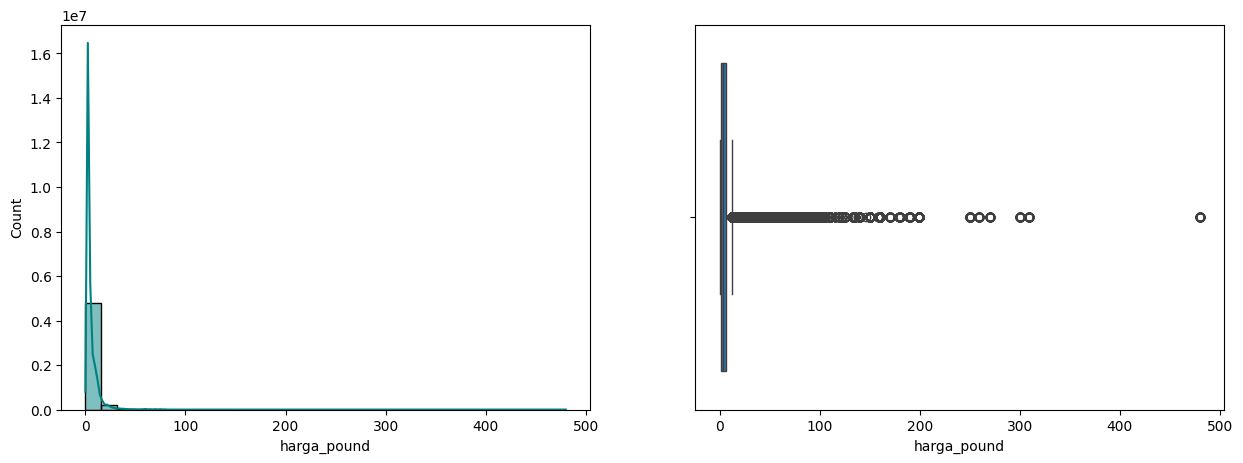

In [ ]:
hist_bp_viz(mart_df_cleaned_sorted, 'harga_pound')

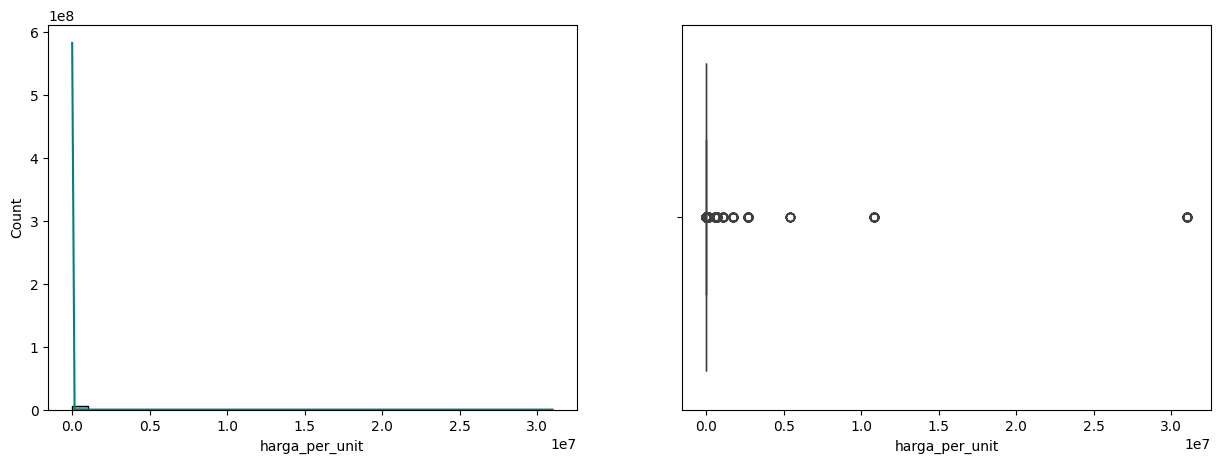

In [ ]:
hist_bp_viz(mart_df_cleaned_sorted, 'harga_per_unit')

In [ ]:
# fungsi menghitung jumlah outlier pada kolom
def count_outliers(col):
  Q1 = col.quantile(0.25)
  Q3 = col.quantile(0.75)

  # iqr formula
  IQR = Q3 - Q1

  RUB = Q3 + (1.5 * IQR)
  RLB = Q1 - (1.5 * IQR)

  count = 0
  for i in col:
    if i > RUB or i < RLB:
      count += 1

  return count, RUB, RLB

In [ ]:
# fungsi untuk mencetak jumlah outliers, persentase, rub, dan rlb
def print_outliers(df, lst):
  for col in lst:
    sorted_data = df[col].sort_values()
    count, rub, rlb = count_outliers(sorted_data)

    print(f'Total outliers pada kolom {col}: {count}')
    print(f'Persentase outliers terhadap keseluruhan data: {round((count/df.shape[0])*100, 3)}%')
    print(f'Batas atas: {rub}')
    print(f'Batas bawah: {rlb}')

    print()

In [ ]:
list_num_cols = ['harga_pound', 'harga_per_unit']

In [ ]:
# memeriksa informasi outliers pada mart_df
print_outliers(mart_df_cleaned_sorted, list_num_cols)

Total outliers pada kolom harga_pound: 443784
Persentase outliers terhadap keseluruhan data: 8.775%
Batas atas: 12.375
Batas bawah: -4.625

Total outliers pada kolom harga_per_unit: 537655
Persentase outliers terhadap keseluruhan data: 10.631%
Batas atas: 32.25
Batas bawah: -13.75



### **Outliers Analysis By `Kategori`**

In [ ]:
kat_df

,id_kategori,kategori
0,K01,baby_products
1,K02,bakery
2,K03,drinks
3,K04,food_cupboard
4,K05,free-from
5,K06,fresh_food
6,K07,frozen
7,K08,health_products
8,K09,home
9,K10,household


#### **Kategori baby_products**

In [ ]:
# memeriksa outliers berdasarkan kategori baby_products
kat_baby_products = mart_df_cleaned_sorted.loc[mart_df_cleaned_sorted['id_kategori'] == 'K01']
print_outliers(kat_baby_products, list_num_cols)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Total outliers pada kolom harga_pound: 11068
Persentase outliers terhadap keseluruhan data: 7.181%
Batas atas: 13.850000000000001
Batas bawah: -5.75

Total outliers pada kolom harga_per_unit: 17371
Persentase outliers terhadap keseluruhan data: 11.271%
Batas atas: 35.949999999999996
Batas bawah: -14.849999999999998



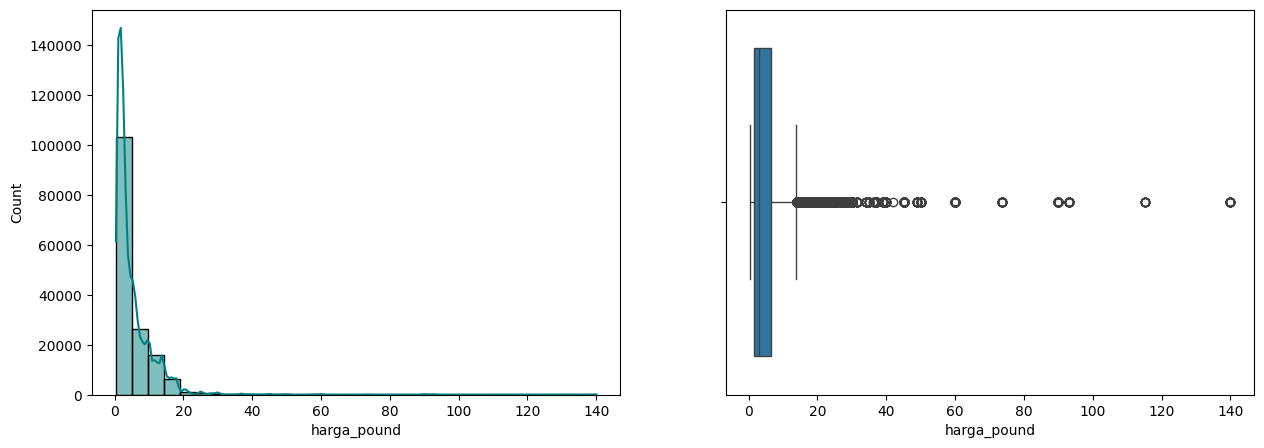

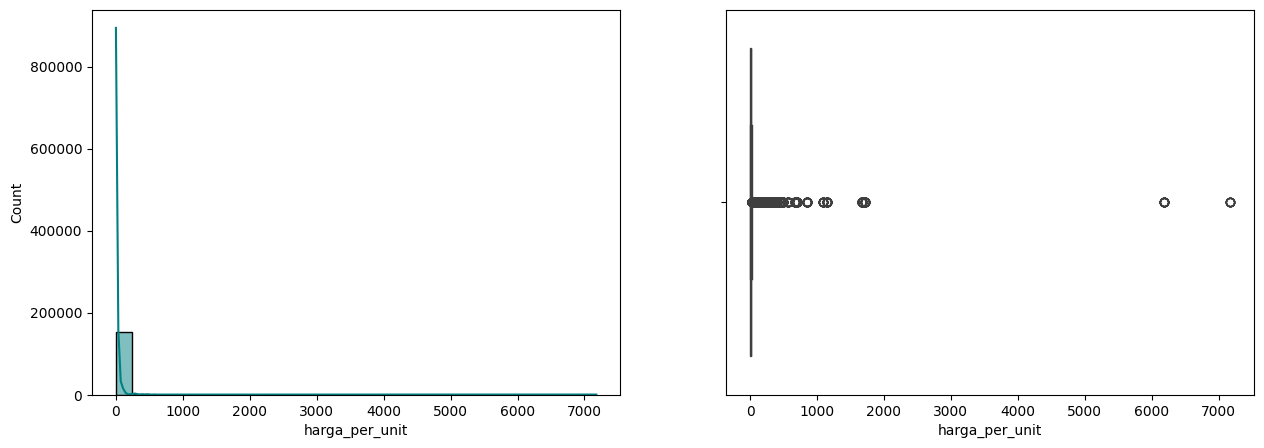

In [ ]:
# visualisasi distribusi data dan outliers
hist_bp_viz(kat_baby_products, 'harga_pound')
hist_bp_viz(kat_baby_products, 'harga_per_unit')

In [ ]:
# memeriksa harga terendah dan tertinggi pada kategori harga_pound
print('Harga jual terendah: ', kat_baby_products['harga_pound'].min())
print('Harga jual tertinggi: ', kat_baby_products['harga_pound'].max())
print()
print('Harga per unit terendah: ', kat_baby_products['harga_per_unit'].min())
print('Harga per unit tertinggi: ', kat_baby_products['harga_per_unit'].max())

Harga jual terendah:  0.39
Harga jual tertinggi:  140.0

Harga per unit terendah:  0.0
Harga per unit tertinggi:  7177.03


In [ ]:
kat_baby_products[kat_baby_products['harga_pound'] >= 100]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,nama_toko,harga_pound,harga_per_unit,unit,id_produk,id_kategori,brand_sendiri,tanggal
1635663,CVFamz,115.2,115.2,unit,P056462,K01,False,2023-02-21
1740936,CVFamz,115.2,115.2,unit,P056462,K01,False,2023-01-28
1848991,CVFamz,115.2,115.2,unit,P056462,K01,False,2023-01-03
1953447,CVFamz,115.2,115.2,unit,P056462,K01,False,2022-12-10
2070363,CVFamz,115.2,115.2,unit,P056462,K01,False,2022-11-14
2157693,CVFamz,115.2,115.2,unit,P056462,K01,False,2022-10-25
2254894,CVFamz,115.2,115.2,unit,P056462,K01,False,2022-10-02
2361790,CVFamz,115.2,115.2,unit,P056462,K01,False,2022-09-08
2694249,ScottishMart,140.0,140.0,unit,P110824,K01,False,2022-06-24
2800349,ScottishMart,140.0,140.0,unit,P110824,K01,False,2022-05-31


In [ ]:
kat_baby_products[kat_baby_products['harga_per_unit'] >= 1000]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,nama_toko,harga_pound,harga_per_unit,unit,id_produk,id_kategori,brand_sendiri,tanggal
6257,ScottishMart,11.75,1678.57,l,P020905,K01,False,2024-02-28
36334,UKMart,12.00,1714.29,l,P020906,K01,False,2024-02-21
44005,BritishMart,10.85,1085.00,l,P017970,K01,False,2024-02-19
115904,ScottishMart,11.75,1678.57,l,P020905,K01,False,2024-02-03
138802,UKMart,12.00,1714.29,l,P020906,K01,False,2024-01-29
...,...,...,...,...,...,...,...,...
4880399,UKMart,12.00,1714.29,l,P020906,K01,False,2021-02-10
4894786,ScottishMart,11.75,1678.57,l,P020905,K01,False,2021-02-07
5004034,ScottishMart,11.75,1678.57,l,P020905,K01,False,2021-01-13
5034689,UKMart,12.00,1714.29,l,P020906,K01,False,2021-01-06


In [ ]:
kat_baby_products[kat_baby_products['harga_per_unit'] > 5000]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,nama_toko,harga_pound,harga_per_unit,unit,id_produk,id_kategori,brand_sendiri,tanggal
432670,UKMart,9.00,7177.03,l,P029113,K01,False,2023-11-23
532017,UKMart,9.00,7177.03,l,P029113,K01,False,2023-10-31
634806,UKMart,9.00,7177.03,l,P029113,K01,False,2023-10-07
1205544,UKMart,7.75,6180.22,l,P029113,K01,False,2023-05-30
1415288,UKMart,7.75,6180.22,l,P029113,K01,False,2023-04-12
1520233,UKMart,7.75,6180.22,l,P029113,K01,False,2023-03-19
1627482,UKMart,7.75,6180.22,l,P029113,K01,False,2023-02-23
1724700,UKMart,7.75,6180.22,l,P029113,K01,False,2023-01-31
1830152,UKMart,7.75,6180.22,l,P029113,K01,False,2023-01-07
1938638,UKMart,7.75,6180.22,l,P029113,K01,False,2022-12-14


#### **Kategori bakery**

In [ ]:
# memeriksa outliers berdasarkan kategori bakery
kat_bakery = mart_df_cleaned_sorted.loc[mart_df_cleaned_sorted['id_kategori'] == 'K02']
print_outliers(kat_bakery, list_num_cols)

Total outliers pada kolom harga_pound: 12507
Persentase outliers terhadap keseluruhan data: 9.998%
Batas atas: 4.3500000000000005
Batas bawah: -0.6100000000000003

Total outliers pada kolom harga_per_unit: 12223
Persentase outliers terhadap keseluruhan data: 9.771%
Batas atas: 11.959999999999999
Batas bawah: -6.599999999999999



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


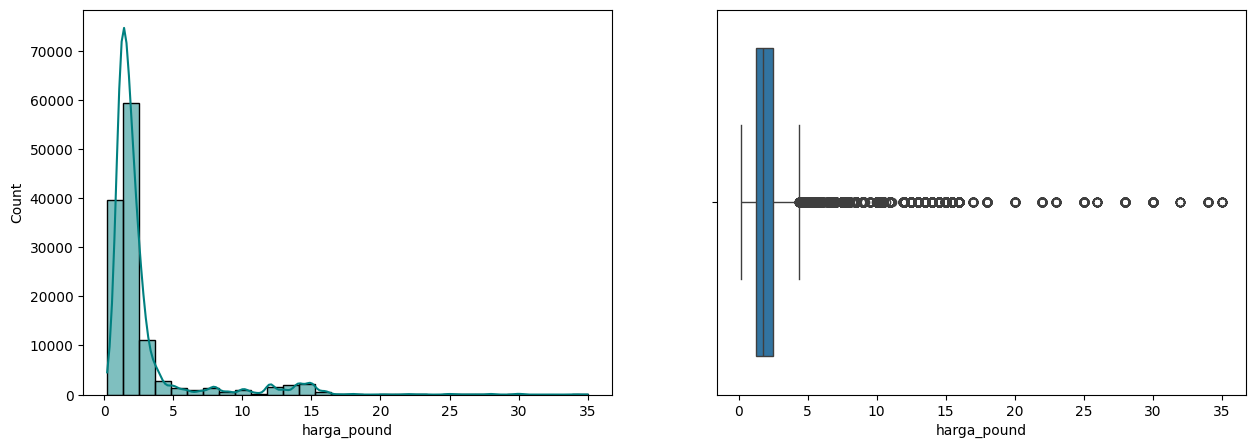

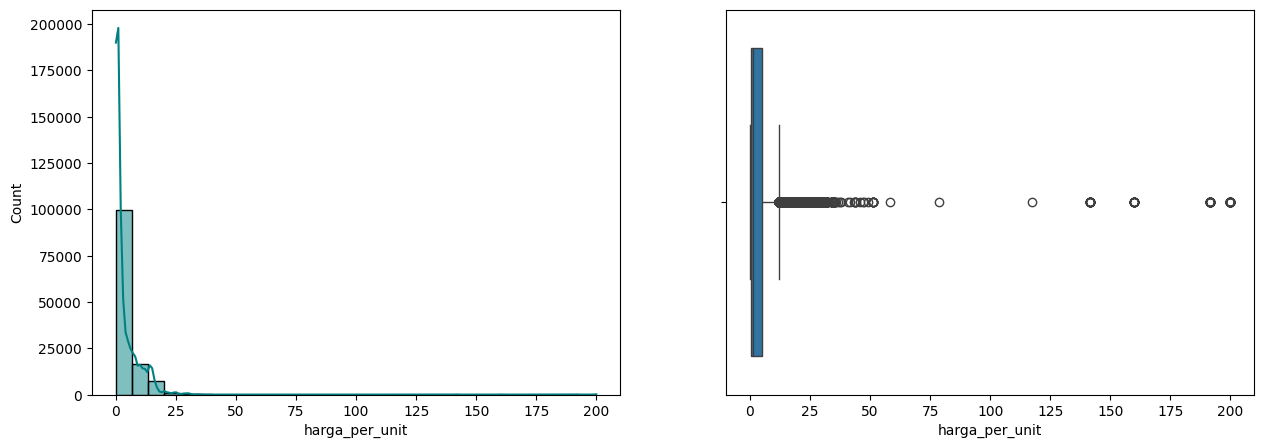

In [ ]:
# visualisasi distribusi data dan outliers
hist_bp_viz(kat_bakery, 'harga_pound')
hist_bp_viz(kat_bakery, 'harga_per_unit')

In [ ]:
# memeriksa harga terendah dan tertinggi pada kategori harga_pound
print('Harga jual terendah: ', kat_bakery['harga_pound'].min())
print('Harga jual tertinggi: ', kat_bakery['harga_pound'].max())
print()
print('Harga per unit terendah: ', kat_bakery['harga_per_unit'].min())
print('Harga per unit tertinggi: ', kat_bakery['harga_per_unit'].max())

Harga jual terendah:  0.2
Harga jual tertinggi:  35.0

Harga per unit terendah:  0.01
Harga per unit tertinggi:  200.0


In [ ]:
kat_bakery[kat_bakery['harga_pound'] >= 20]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,nama_toko,harga_pound,harga_per_unit,unit,id_produk,id_kategori,brand_sendiri,tanggal
22437,CVFamz,26.0,26.0,unit,P036391,K02,True,2024-02-24
23301,CVFamz,25.0,25.0,unit,P033932,K02,True,2024-02-24
25537,CVFamz,30.0,30.0,unit,P034044,K02,True,2024-02-24
26779,CVFamz,25.0,25.0,unit,P034587,K02,True,2024-02-23
38805,CVFamz,30.0,30.0,unit,P035126,K02,True,2024-02-21
...,...,...,...,...,...,...,...,...
4842025,CVFamz,25.0,25.0,unit,P034848,K02,True,2021-02-19
4842088,CVFamz,30.0,30.0,unit,P015003,K02,False,2021-02-19
4842089,CVFamz,30.0,30.0,unit,P034044,K02,True,2021-02-19
4842090,CVFamz,32.0,32.0,unit,P035180,K02,True,2021-02-19


In [ ]:
kat_bakery[kat_bakery['harga_per_unit'] >= 100]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,nama_toko,harga_pound,harga_per_unit,unit,id_produk,id_kategori,brand_sendiri,tanggal
16690,UKMart,0.80,160.0,kg,P046635,K02,False,2024-02-26
78505,ScottishMart,1.15,191.7,kg,P050365,K02,False,2024-02-12
115287,UKMart,0.80,160.0,kg,P046635,K02,False,2024-02-03
178357,ScottishMart,1.15,191.7,kg,P050365,K02,False,2024-01-20
219992,UKMart,0.80,160.0,kg,P046635,K02,False,2024-01-10
...,...,...,...,...,...,...,...,...
4784858,ScottishMart,1.15,191.7,kg,P050365,K02,False,2021-03-04
4893118,ScottishMart,1.15,191.7,kg,P050365,K02,False,2021-02-07
4938678,UKMart,1.00,200.0,kg,P046635,K02,False,2021-01-28
4997405,UKMart,1.00,200.0,kg,P046635,K02,False,2021-01-14


####**Kategori drinks**

In [ ]:
# memeriksa outliers berdasarkan kategori drinks
kat_drinks = mart_df_cleaned_sorted.loc[mart_df_cleaned_sorted['id_kategori'] == 'K03']
print_outliers(kat_drinks, list_num_cols)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Total outliers pada kolom harga_pound: 49028
Persentase outliers terhadap keseluruhan data: 8.449%
Batas atas: 19.125
Batas bawah: -7.875

Total outliers pada kolom harga_per_unit: 70047
Persentase outliers terhadap keseluruhan data: 12.071%
Batas atas: 35.65
Batas bawah: -16.75



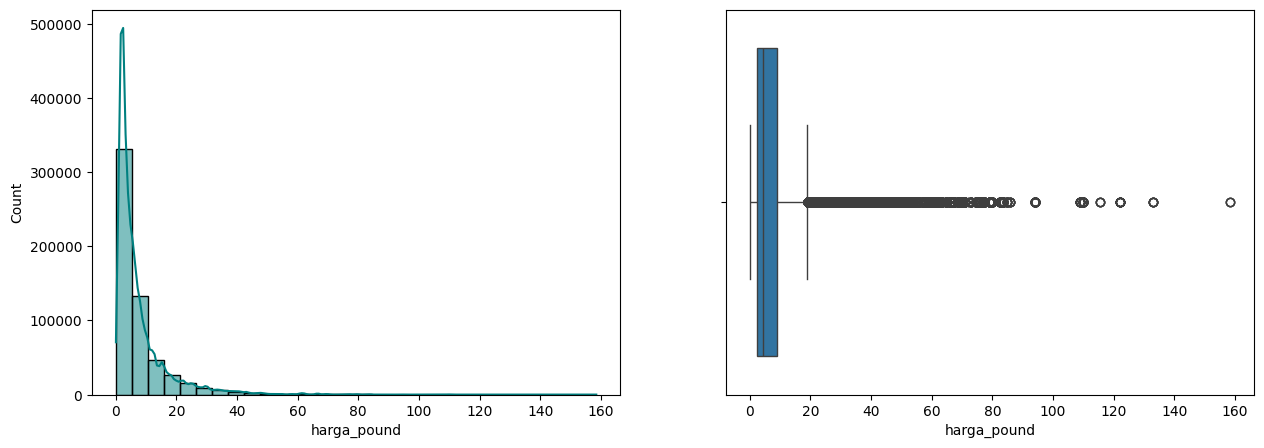

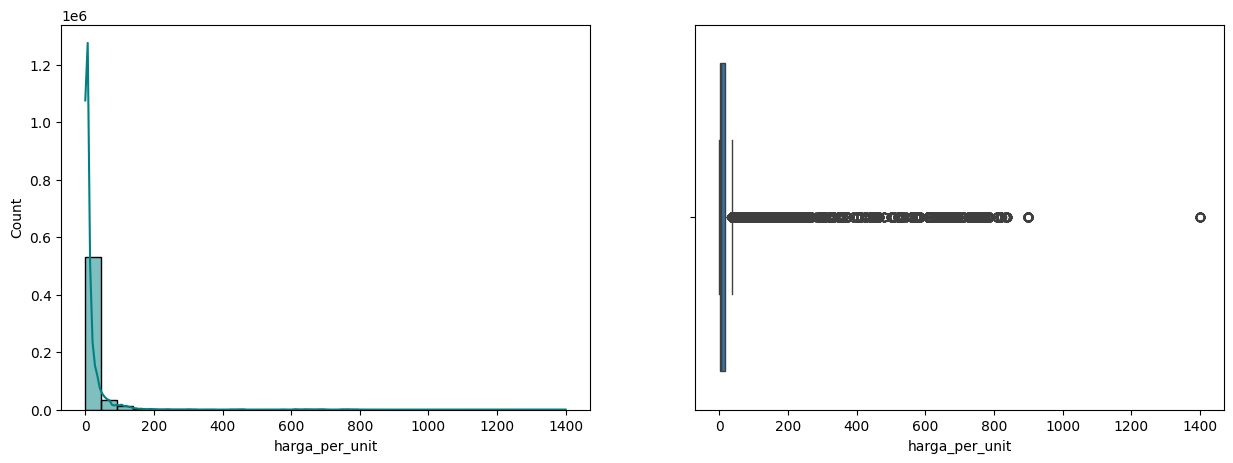

In [ ]:
# visualisasi distribusi data dan outliers
hist_bp_viz(kat_drinks, 'harga_pound')
hist_bp_viz(kat_drinks, 'harga_per_unit')

In [ ]:
# memeriksa harga terendah dan tertinggi pada kategori harga_pound
print('Harga jual terendah: ', kat_drinks['harga_pound'].min())
print('Harga jual tertinggi: ', kat_drinks['harga_pound'].max())
print()
print('Harga per unit terendah: ', kat_drinks['harga_per_unit'].min())
print('Harga per unit tertinggi: ', kat_drinks['harga_per_unit'].max())

Harga jual terendah:  0.1
Harga jual tertinggi:  158.5

Harga per unit terendah:  0.0
Harga per unit tertinggi:  1400.0


In [ ]:
kat_drinks[kat_drinks['harga_pound'] >= 100]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,nama_toko,harga_pound,harga_per_unit,unit,id_produk,id_kategori,brand_sendiri,tanggal
24874,UKMart,110.0,110.00,unit,P096743,K03,False,2024-02-24
87552,CVFamz,115.5,0.58,unit,P018256,K03,False,2024-02-10
124530,BritishMart,133.0,0.67,unit,P046809,K03,False,2024-02-01
127070,UKMart,110.0,110.00,unit,P096743,K03,False,2024-01-31
134768,BritishMart,133.0,0.67,unit,P053380,K03,False,2024-01-30
...,...,...,...,...,...,...,...,...
4801732,CVFamz,109.0,109.00,unit,P014464,K03,False,2021-02-28
4872177,UKMart,110.0,110.00,unit,P096743,K03,False,2021-02-12
4949446,CVFamz,110.0,110.00,unit,P096735,K03,False,2021-01-25
5002090,CVFamz,110.0,110.00,unit,P096735,K03,False,2021-01-13


In [ ]:
kat_drinks[kat_drinks['harga_per_unit'] >= 1400]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,nama_toko,harga_pound,harga_per_unit,unit,id_produk,id_kategori,brand_sendiri,tanggal
484541,UKMart,1.4,1400.0,kg,P083348,K03,False,2023-11-11
582476,UKMart,1.4,1400.0,kg,P083348,K03,False,2023-10-19
684790,UKMart,1.4,1400.0,kg,P083348,K03,False,2023-09-26
788011,UKMart,1.4,1400.0,kg,P083348,K03,False,2023-09-02
894321,UKMart,1.4,1400.0,kg,P083348,K03,False,2023-08-09
917706,UKMart,1.4,1400.0,kg,P083347,K03,False,2023-08-04
996673,UKMart,1.4,1400.0,kg,P083348,K03,False,2023-07-17
1009168,UKMart,1.4,1400.0,kg,P083347,K03,False,2023-07-14
1093830,UKMart,1.4,1400.0,kg,P083348,K03,False,2023-06-25
1097960,UKMart,1.4,1400.0,kg,P083347,K03,False,2023-06-24


####**Kategori food_cupboard**

In [ ]:
# memeriksa outliers berdasarkan kategori food_cupboard
kat_food_cupboard = mart_df_cleaned_sorted.loc[mart_df_cleaned_sorted['id_kategori'] == 'K04']
print_outliers(kat_food_cupboard, list_num_cols)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Total outliers pada kolom harga_pound: 70170
Persentase outliers terhadap keseluruhan data: 6.284%
Batas atas: 4.45
Batas bawah: -0.7500000000000002

Total outliers pada kolom harga_per_unit: 86663
Persentase outliers terhadap keseluruhan data: 7.762%
Batas atas: 32.2
Batas bawah: -11.32



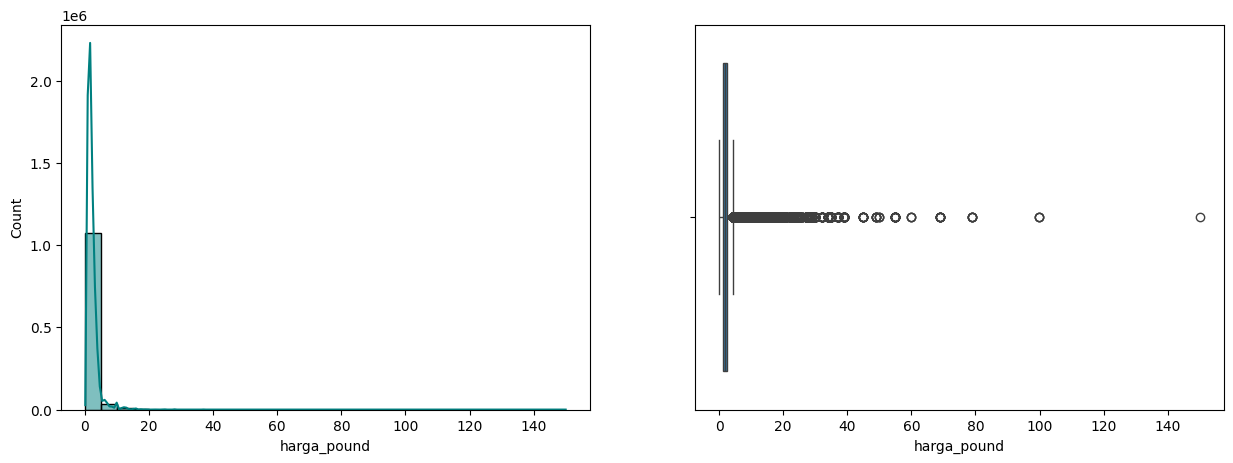

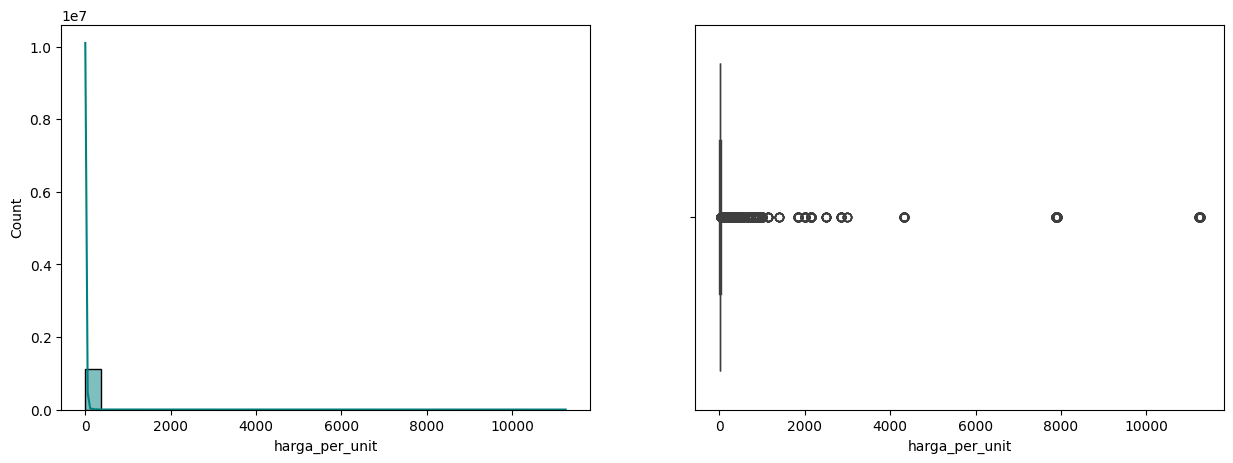

In [ ]:
# visualisasi distribusi data dan outliers
hist_bp_viz(kat_food_cupboard, 'harga_pound')
hist_bp_viz(kat_food_cupboard, 'harga_per_unit')

In [ ]:
# memeriksa harga terendah dan tertinggi pada kategori harga_pound
print('Harga jual terendah: ', kat_food_cupboard['harga_pound'].min())
print('Harga jual tertinggi: ', kat_food_cupboard['harga_pound'].max())
print()
print('Harga per unit terendah: ', kat_food_cupboard['harga_per_unit'].min())
print('Harga per unit tertinggi: ', kat_food_cupboard['harga_per_unit'].max())

Harga jual terendah:  0.1
Harga jual tertinggi:  150.0

Harga per unit terendah:  0.0
Harga per unit tertinggi:  11250.0


In [ ]:
kat_food_cupboard[kat_food_cupboard['harga_pound'] >= 80]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,nama_toko,harga_pound,harga_per_unit,unit,id_produk,id_kategori,brand_sendiri,tanggal
2682581,CVFamz,99.99,99.99,unit,P069339,K04,False,2022-06-27
3623111,CVFamz,99.99,99.99,unit,P069339,K04,False,2021-11-24
4473110,ScottishMart,150.00,150.00,kg,P053414,K04,False,2021-05-14
4616627,CVFamz,99.99,99.99,unit,P069339,K04,False,2021-04-11


In [ ]:
kat_food_cupboard[kat_food_cupboard['harga_per_unit'] >= 4000]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,nama_toko,harga_pound,harga_per_unit,unit,id_produk,id_kategori,brand_sendiri,tanggal
4050,UKMart,3.15,7875.0,kg,P090526,K04,True,2024-02-29
16712,BritishMart,4.49,11225.0,kg,P093492,K04,False,2024-02-26
22413,ScottishMart,4.50,11250.0,kg,P093491,K04,False,2024-02-24
28043,CVFamz,3.15,7875.0,kg,P016183,K04,True,2024-02-23
98752,ScottishMart,3.95,7900.0,kg,P106987,K04,True,2024-02-07
...,...,...,...,...,...,...,...,...
4959952,ScottishMart,3.95,7900.0,kg,P106987,K04,True,2021-01-23
4988045,UKMart,3.15,7875.0,kg,P090526,K04,True,2021-01-16
5001952,CVFamz,3.15,7875.0,kg,P016183,K04,True,2021-01-13
5002701,CVFamz,2.60,4333.0,kg,P039242,K04,False,2021-01-13


####**Kategori free-from**

In [ ]:
# memeriksa outliers berdasarkan kategori free-from
kat_free_from = mart_df_cleaned_sorted.loc[mart_df_cleaned_sorted['id_kategori'] == 'K05']
print_outliers(kat_free_from, list_num_cols)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Total outliers pada kolom harga_pound: 18709
Persentase outliers terhadap keseluruhan data: 10.118%
Batas atas: 5.875
Batas bawah: -1.125

Total outliers pada kolom harga_per_unit: 13616
Persentase outliers terhadap keseluruhan data: 7.364%
Batas atas: 32.15
Batas bawah: -12.09



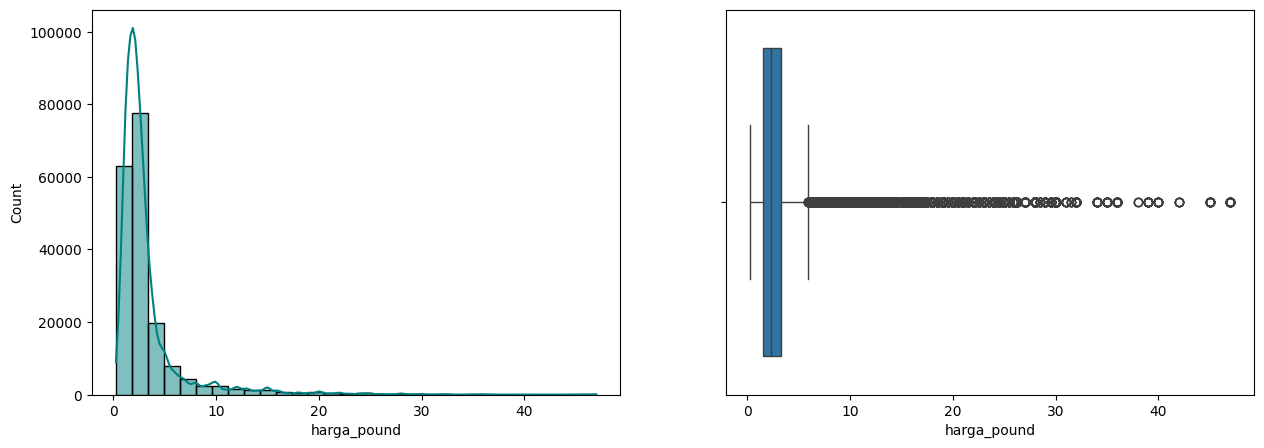

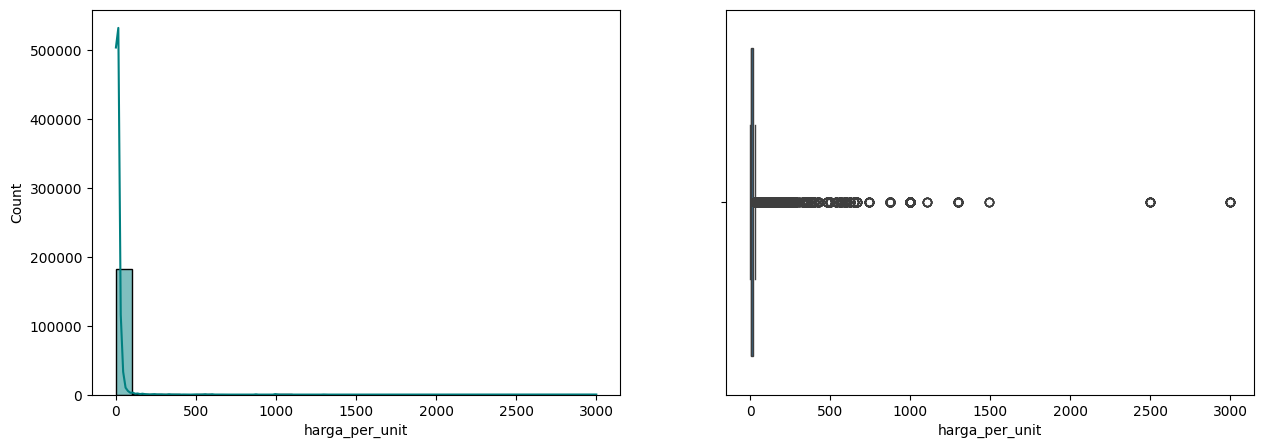

In [ ]:
# visualisasi distribusi data dan outliers
hist_bp_viz(kat_free_from, 'harga_pound')
hist_bp_viz(kat_free_from, 'harga_per_unit')

In [ ]:
# memeriksa harga terendah dan tertinggi pada kategori harga_pound
print('Harga jual terendah: ', kat_free_from['harga_pound'].min())
print('Harga jual tertinggi: ', kat_free_from['harga_pound'].max())
print()
print('Harga per unit terendah: ', kat_free_from['harga_per_unit'].min())
print('Harga per unit tertinggi: ', kat_free_from['harga_per_unit'].max())

Harga jual terendah:  0.25
Harga jual tertinggi:  47.0

Harga per unit terendah:  0.0
Harga per unit tertinggi:  3000.0


In [ ]:
kat_free_from[kat_free_from['harga_pound'] >= 40]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,nama_toko,harga_pound,harga_per_unit,unit,id_produk,id_kategori,brand_sendiri,tanggal
48244,CVFamz,40.0,57.14,l,P039402,K05,False,2024-02-18
80783,CVFamz,47.0,626.51,l,P066078,K05,False,2024-02-11
152143,CVFamz,40.0,57.14,l,P039402,K05,False,2024-01-26
172388,CVFamz,47.0,626.51,l,P066078,K05,False,2024-01-21
252435,CVFamz,47.0,626.51,l,P066078,K05,False,2024-01-03
...,...,...,...,...,...,...,...,...
4773682,UKMart,45.0,64.29,l,P076127,K05,False,2021-03-06
4773957,UKMart,42.0,56.00,l,P071946,K05,False,2021-03-06
4939000,CVFamz,47.0,626.51,l,P066078,K05,False,2021-01-28
5020697,UKMart,45.0,64.29,l,P076127,K05,False,2021-01-09


In [ ]:
kat_free_from[kat_free_from['harga_per_unit'] >= 2000]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,nama_toko,harga_pound,harga_per_unit,unit,id_produk,id_kategori,brand_sendiri,tanggal
363558,UKMart,3.0,3000.0,kg,P032110,K05,False,2023-12-08
527885,UKMart,3.0,3000.0,kg,P032110,K05,False,2023-11-01
879730,UKMart,3.0,3000.0,kg,P032110,K05,False,2023-08-13
982842,UKMart,3.0,3000.0,kg,P032110,K05,False,2023-07-20
1078340,UKMart,3.0,3000.0,kg,P032110,K05,False,2023-06-28
1167136,UKMart,3.0,3000.0,kg,P032110,K05,False,2023-06-08
1266368,UKMart,3.0,3000.0,kg,P032110,K05,False,2023-05-16
1363632,UKMart,3.0,3000.0,kg,P032110,K05,False,2023-04-24
1465845,UKMart,3.0,3000.0,kg,P032110,K05,False,2023-04-01
1597092,UKMart,3.0,3000.0,kg,P032110,K05,False,2023-03-02


####**Kategori fresh_food**

In [ ]:
# memeriksa outliers berdasarkan kategori fresh_food
kat_fresh_food = mart_df_cleaned_sorted.loc[mart_df_cleaned_sorted['id_kategori'] == 'K06']
print_outliers(kat_fresh_food, list_num_cols)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Total outliers pada kolom harga_pound: 38281
Persentase outliers terhadap keseluruhan data: 5.259%
Batas atas: 5.875
Batas bawah: -1.125

Total outliers pada kolom harga_per_unit: 30549
Persentase outliers terhadap keseluruhan data: 4.196%
Batas atas: 24.68
Batas bawah: -7.800000000000002



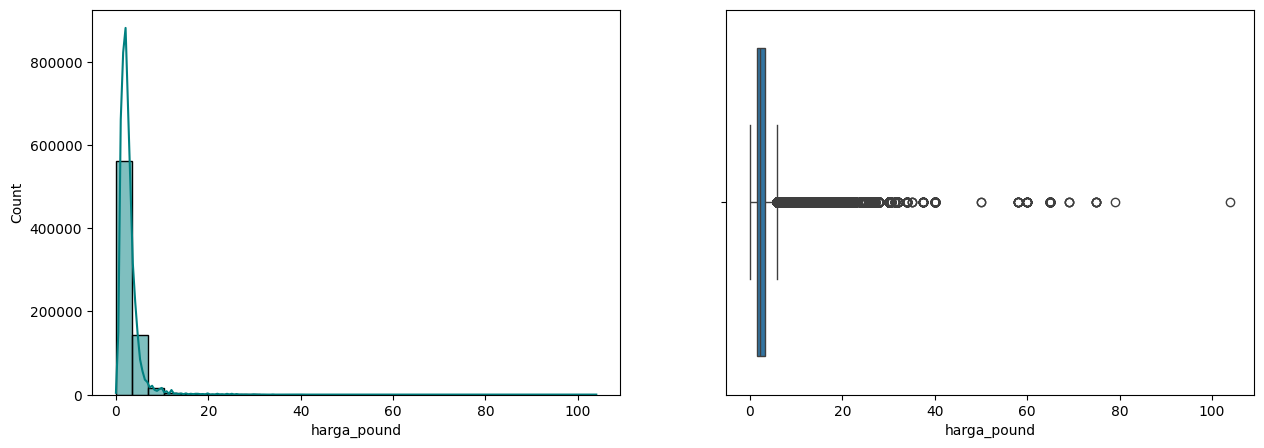

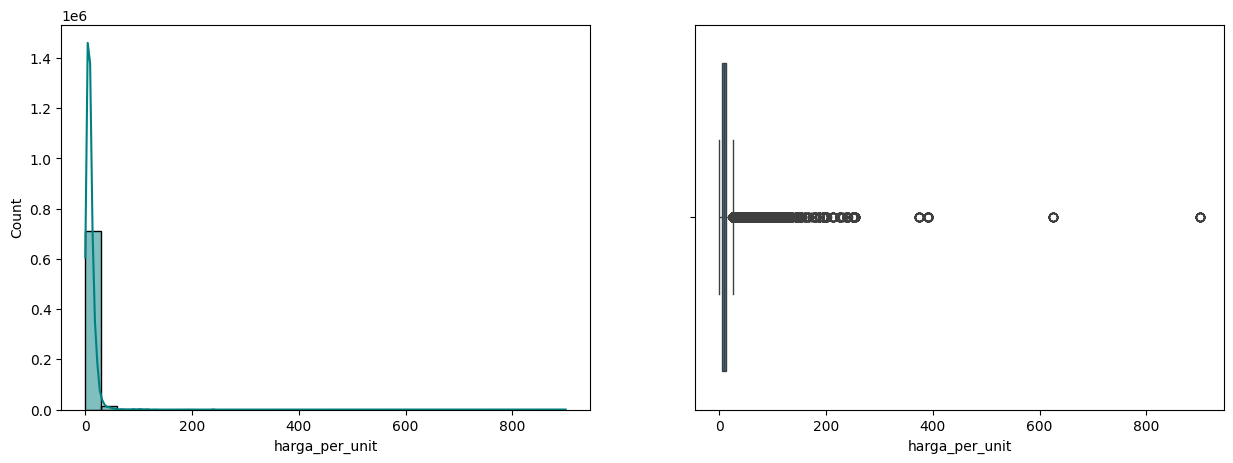

In [ ]:
# visualisasi distribusi data dan outliers
hist_bp_viz(kat_fresh_food, 'harga_pound')
hist_bp_viz(kat_fresh_food, 'harga_per_unit')

In [ ]:
# memeriksa harga terendah dan tertinggi pada kategori harga_pound
print('Harga jual terendah: ', kat_fresh_food['harga_pound'].min())
print('Harga jual tertinggi: ', kat_fresh_food['harga_pound'].max())
print()
print('Harga per unit terendah: ', kat_fresh_food['harga_per_unit'].min())
print('Harga per unit tertinggi: ', kat_fresh_food['harga_per_unit'].max())

Harga jual terendah:  0.01
Harga jual tertinggi:  104.0

Harga per unit terendah:  0.0
Harga per unit tertinggi:  900.0


In [ ]:
kat_fresh_food[kat_fresh_food['harga_pound'] >= 60]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,nama_toko,harga_pound,harga_per_unit,unit,id_produk,id_kategori,brand_sendiri,tanggal
15351,CVFamz,65.0,65.0,unit,P037201,K06,False,2024-02-26
22892,CVFamz,60.0,60.0,unit,P034035,K06,True,2024-02-24
108506,CVFamz,65.0,65.0,unit,P037201,K06,False,2024-02-05
128639,CVFamz,60.0,60.0,unit,P034035,K06,True,2024-01-31
215956,CVFamz,65.0,65.0,unit,P037201,K06,False,2024-01-11
...,...,...,...,...,...,...,...,...
4608758,CVFamz,60.0,60.0,unit,P034693,K06,True,2021-04-13
4678788,CVFamz,60.0,60.0,unit,P034693,K06,True,2021-03-28
4834530,CVFamz,60.0,60.0,unit,P034693,K06,True,2021-02-20
4934931,CVFamz,60.0,60.0,unit,P034693,K06,True,2021-01-29


In [ ]:
kat_fresh_food[kat_fresh_food['harga_per_unit'] >= 400]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,nama_toko,harga_pound,harga_per_unit,unit,id_produk,id_kategori,brand_sendiri,tanggal
21382,CVFamz,2.5,625.0,kg,P074772,K06,False,2024-02-25
68306,ScottishMart,0.9,900.0,l,P102579,K06,True,2024-02-14
174353,ScottishMart,0.9,900.0,l,P102579,K06,True,2024-01-21
232082,CVFamz,2.5,625.0,kg,P074772,K06,False,2024-01-07
483201,ScottishMart,0.9,900.0,l,P102579,K06,True,2023-11-11
726181,CVFamz,2.5,625.0,kg,P074772,K06,False,2023-09-17
898409,ScottishMart,0.9,900.0,l,P102579,K06,True,2023-08-08
1222854,ScottishMart,0.9,900.0,l,P102579,K06,True,2023-05-26
1225532,CVFamz,2.5,625.0,kg,P074772,K06,False,2023-05-26
1530008,ScottishMart,0.9,900.0,l,P102579,K06,True,2023-03-17


#### **Kategori frozen**

In [ ]:
# memeriksa outliers berdasarkan kategori frozen
kat_frozen = mart_df_cleaned_sorted.loc[mart_df_cleaned_sorted['id_kategori'] == 'K07']
print_outliers(kat_frozen, list_num_cols)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Total outliers pada kolom harga_pound: 2943
Persentase outliers terhadap keseluruhan data: 1.737%
Batas atas: 5.75
Batas bawah: -0.25

Total outliers pada kolom harga_per_unit: 5604
Persentase outliers terhadap keseluruhan data: 3.308%
Batas atas: 18.384999999999998
Batas bawah: -3.9749999999999996



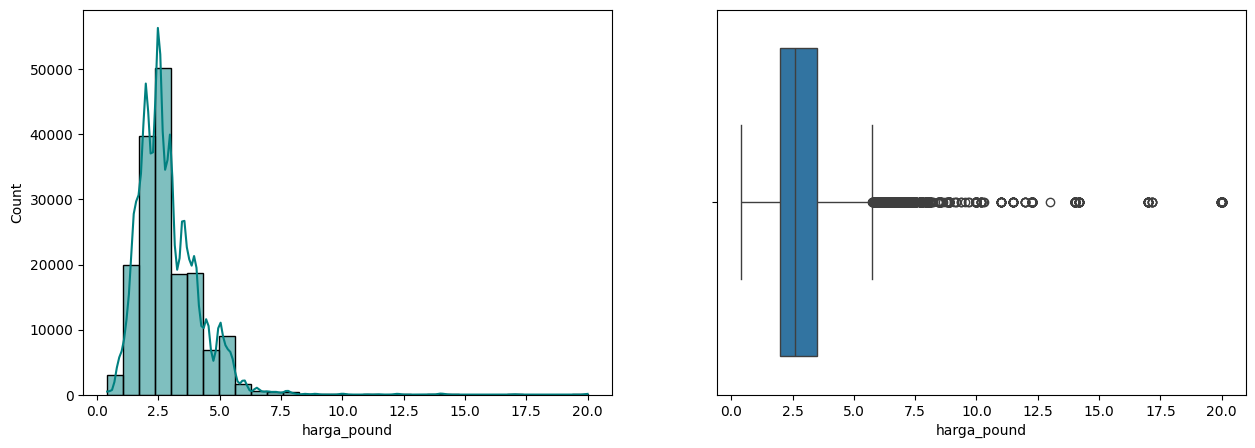

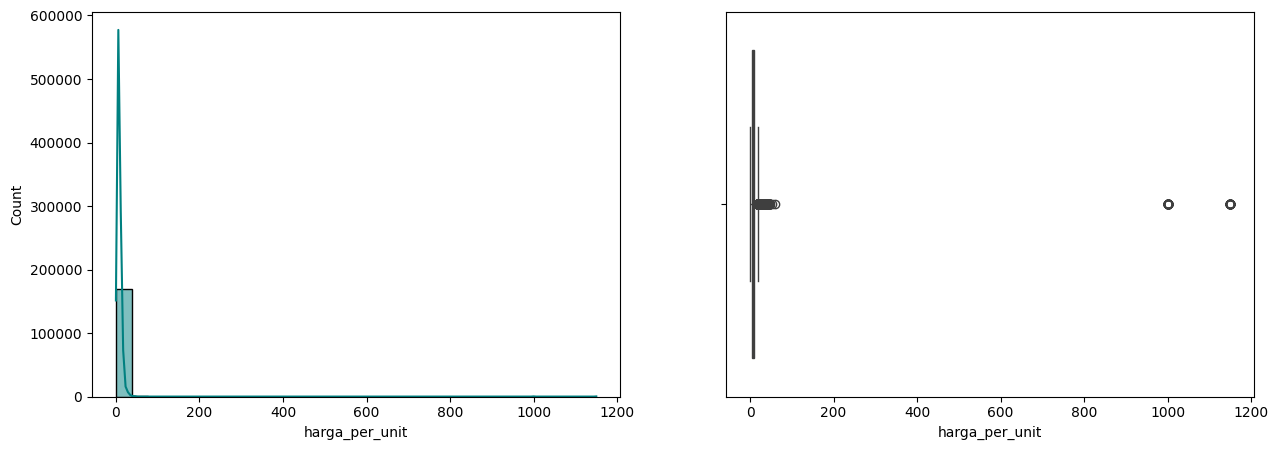

In [ ]:
# visualisasi distribusi data dan outliers
hist_bp_viz(kat_frozen, 'harga_pound')
hist_bp_viz(kat_frozen, 'harga_per_unit')

In [ ]:
# memeriksa harga terendah dan tertinggi pada kategori harga_pound
print('Harga jual terendah: ', kat_frozen['harga_pound'].min())
print('Harga jual tertinggi: ', kat_frozen['harga_pound'].max())
print()
print('Harga per unit terendah: ', kat_frozen['harga_per_unit'].min())
print('Harga per unit tertinggi: ', kat_frozen['harga_per_unit'].max())

Harga jual terendah:  0.41
Harga jual tertinggi:  20.0

Harga per unit terendah:  0.0
Harga per unit tertinggi:  1150.0


In [ ]:
kat_frozen[kat_frozen['harga_pound'] >= 15]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,nama_toko,harga_pound,harga_per_unit,unit,id_produk,id_kategori,brand_sendiri,tanggal
44757,BritishMart,16.99,12.31,kg,P065584,K07,True,2024-02-19
78012,BritishMart,19.99,2.78,kg,P012089,K07,False,2024-02-12
112966,BritishMart,19.99,2.78,kg,P012089,K07,False,2024-02-04
143941,BritishMart,16.99,12.31,kg,P065584,K07,True,2024-01-28
241913,BritishMart,19.99,2.78,kg,P012089,K07,False,2024-01-05
...,...,...,...,...,...,...,...,...
4608854,UKMart,20.00,8.00,kg,P089672,K07,True,2021-04-13
4699355,UKMart,20.00,8.00,kg,P089672,K07,True,2021-03-23
4699956,UKMart,17.15,10.09,kg,P086929,K07,True,2021-03-23
4923139,UKMart,17.15,10.09,kg,P086929,K07,True,2021-01-31


In [ ]:
kat_frozen[kat_frozen['harga_per_unit'] >= 900]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,nama_toko,harga_pound,harga_per_unit,unit,id_produk,id_kategori,brand_sendiri,tanggal
46358,CVFamz,1.15,1150.0,kg,P100622,K07,False,2024-02-19
49746,CVFamz,1.15,1150.0,kg,P100620,K07,False,2024-02-18
186780,CVFamz,1.15,1150.0,kg,P100622,K07,False,2024-01-18
188228,CVFamz,1.15,1150.0,kg,P100620,K07,False,2024-01-17
254492,CVFamz,1.15,1150.0,kg,P100622,K07,False,2024-01-02
...,...,...,...,...,...,...,...,...
4737293,CVFamz,1.00,1000.0,kg,P100622,K07,False,2021-03-15
4737294,CVFamz,1.00,1000.0,kg,P100620,K07,False,2021-03-15
4884456,CVFamz,1.00,1000.0,kg,P100620,K07,False,2021-02-09
4884457,CVFamz,1.00,1000.0,kg,P100622,K07,False,2021-02-09


#### **Kategori health_products**

In [ ]:
# memeriksa outliers berdasarkan kategori health_products
kat_health_products = mart_df_cleaned_sorted.loc[mart_df_cleaned_sorted['id_kategori'] == 'K08']
print_outliers(kat_health_products, list_num_cols)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Total outliers pada kolom harga_pound: 42569
Persentase outliers terhadap keseluruhan data: 5.021%
Batas atas: 18.0
Batas bawah: -6.0

Total outliers pada kolom harga_per_unit: 145370
Persentase outliers terhadap keseluruhan data: 17.147%
Batas atas: 108.75
Batas bawah: -58.849999999999994



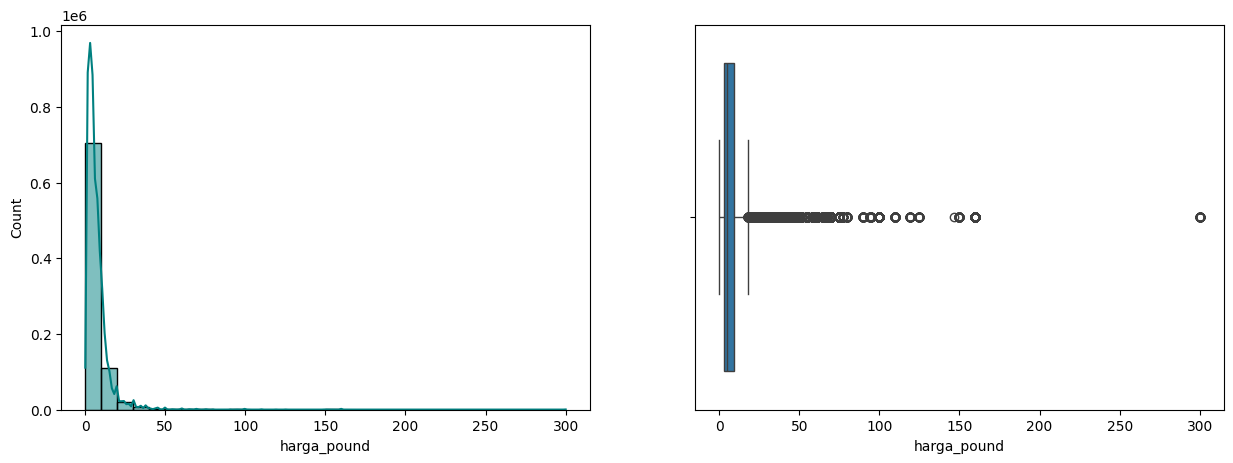

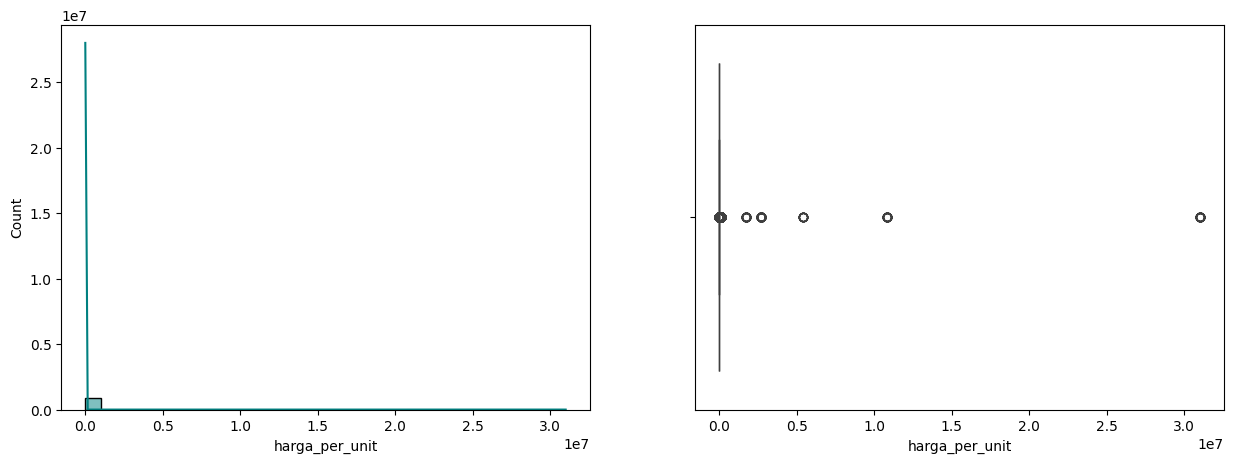

In [ ]:
# visualisasi distribusi data dan outliers
hist_bp_viz(kat_health_products, 'harga_pound')
hist_bp_viz(kat_health_products, 'harga_per_unit')

In [ ]:
# memeriksa harga terendah dan tertinggi pada kategori harga_pound
print('Harga jual terendah: ', kat_health_products['harga_pound'].min())
print('Harga jual tertinggi: ', kat_health_products['harga_pound'].max())
print()
print('Harga per unit terendah: ', kat_health_products['harga_per_unit'].min())
print('Harga per unit tertinggi: ', kat_health_products['harga_per_unit'].max())

Harga jual terendah:  0.13
Harga jual tertinggi:  300.0

Harga per unit terendah:  0.0
Harga per unit tertinggi:  31000000.0


In [ ]:
kat_health_products[kat_health_products['harga_pound'] >= 150]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,nama_toko,harga_pound,harga_per_unit,unit,id_produk,id_kategori,brand_sendiri,tanggal
1803,BritishMart,300.0,300.0,unit,P073624,K08,False,2024-02-29
32689,UKMart,150.0,150.0,unit,P073770,K08,False,2024-02-22
44231,UKMart,160.0,80.0,unit,P073655,K08,False,2024-02-19
48150,ScottishMart,160.0,160.0,unit,P073628,K08,False,2024-02-19
62349,ScottishMart,160.0,80.0,unit,P073658,K08,False,2024-02-15
...,...,...,...,...,...,...,...,...
4894697,ScottishMart,160.0,160.0,unit,P073629,K08,False,2021-02-07
4974213,UKMart,150.0,150.0,unit,P073770,K08,False,2021-01-20
4980570,BritishMart,160.0,160.0,unit,P073776,K08,False,2021-01-18
4980588,BritishMart,300.0,300.0,unit,P073624,K08,False,2021-01-18


In [ ]:
kat_health_products[kat_health_products['harga_per_unit'] >= 30000]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,nama_toko,harga_pound,harga_per_unit,unit,id_produk,id_kategori,brand_sendiri,tanggal
2667,UKMart,31.00,31000000.00,kg,P069233,K08,False,2024-02-29
25866,UKMart,26.00,1733333.33,kg,P069216,K08,False,2024-02-24
44097,UKMart,21.60,5400000.00,kg,P069191,K08,False,2024-02-19
49370,UKMart,8.00,40000.00,kg,P058097,K08,False,2024-02-18
57228,UKMart,10.80,2700000.00,kg,P069199,K08,False,2024-02-16
...,...,...,...,...,...,...,...,...
4943818,UKMart,8.00,40000.00,kg,P058097,K08,False,2021-01-26
4966724,UKMart,8.00,40000.00,kg,P058097,K08,False,2021-01-21
4968239,CVFamz,6.98,77556.00,kg,P057986,K08,False,2021-01-21
4968322,CVFamz,6.98,77556.00,kg,P057984,K08,False,2021-01-21


####**Kategori home**

In [ ]:
# memeriksa outliers berdasarkan kategori home
kat_home = mart_df_cleaned_sorted.loc[mart_df_cleaned_sorted['id_kategori'] == 'K09']
print_outliers(kat_home, list_num_cols)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Total outliers pada kolom harga_pound: 44976
Persentase outliers terhadap keseluruhan data: 6.437%
Batas atas: 25.0
Batas bawah: -9.0

Total outliers pada kolom harga_per_unit: 57458
Persentase outliers terhadap keseluruhan data: 8.223%
Batas atas: 25.5
Batas bawah: -10.5



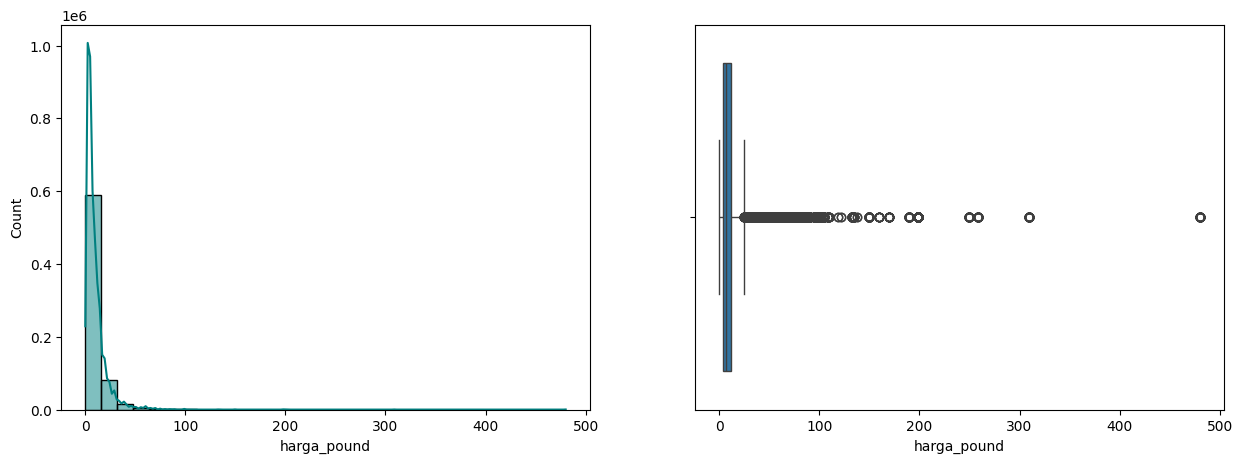

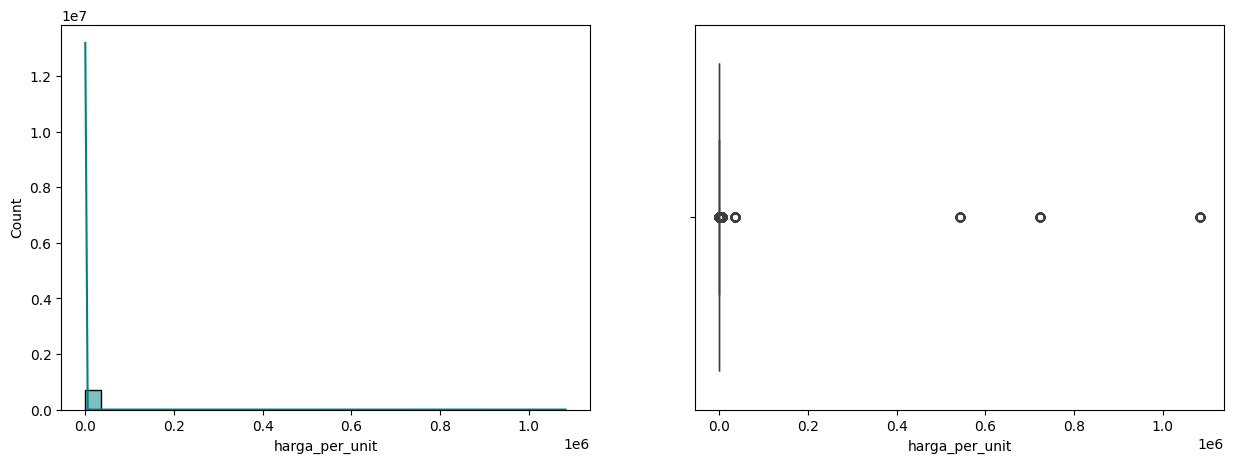

In [ ]:
# visualisasi distribusi data dan outliers
hist_bp_viz(kat_home, 'harga_pound')
hist_bp_viz(kat_home, 'harga_per_unit')

In [ ]:
# memeriksa harga terendah dan tertinggi pada kategori harga_pound
print('Harga jual terendah: ', kat_home['harga_pound'].min())
print('Harga jual tertinggi: ', kat_home['harga_pound'].max())
print()
print('Harga per unit terendah: ', kat_home['harga_per_unit'].min())
print('Harga per unit tertinggi: ', kat_home['harga_per_unit'].max())

Harga jual terendah:  0.25
Harga jual tertinggi:  479.99

Harga per unit terendah:  0.01
Harga per unit tertinggi:  1083333.33


In [ ]:
kat_home[kat_home['harga_pound'] >= 200]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,nama_toko,harga_pound,harga_per_unit,unit,id_produk,id_kategori,brand_sendiri,tanggal
45385,CVFamz,479.99,479.99,unit,P117012,K09,False,2024-02-19
133425,CVFamz,479.99,479.99,unit,P117012,K09,False,2024-01-30
155464,CVFamz,259.00,259.00,unit,P069365,K09,False,2024-01-25
180198,CVFamz,249.99,249.99,unit,P117007,K09,False,2024-01-19
182860,CVFamz,309.00,309.00,unit,P069396,K09,False,2024-01-19
...,...,...,...,...,...,...,...,...
4929045,CVFamz,259.00,259.00,unit,P069365,K09,False,2021-01-30
4993064,CVFamz,249.99,249.99,unit,P117007,K09,False,2021-01-15
4993117,CVFamz,309.00,309.00,unit,P069396,K09,False,2021-01-15
4993418,CVFamz,259.00,259.00,unit,P069365,K09,False,2021-01-15


In [ ]:
kat_home[kat_home['harga_per_unit'] >= 2000]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,nama_toko,harga_pound,harga_per_unit,unit,id_produk,id_kategori,brand_sendiri,tanggal
29,ScottishMart,4.50,2250.0,l,P114105,K09,False,2024-02-29
538,ScottishMart,4.50,2250.0,l,P114140,K09,False,2024-02-29
22164,ScottishMart,4.50,2250.0,l,P114153,K09,False,2024-02-24
26640,ScottishMart,4.50,2250.0,l,P114163,K09,False,2024-02-23
26648,ScottishMart,4.50,2250.0,l,P114120,K09,False,2024-02-23
...,...,...,...,...,...,...,...,...
4997761,ScottishMart,5.00,2500.0,l,P114156,K09,False,2021-01-14
4997762,ScottishMart,5.00,2500.0,l,P114163,K09,False,2021-01-14
4997891,ScottishMart,5.99,2995.0,l,P055585,K09,False,2021-01-14
4997893,ScottishMart,6.99,2912.5,l,P048808,K09,False,2021-01-14


#### **Kategori household**

In [ ]:
# memeriksa outliers berdasarkan kategori household
kat_household = mart_df_cleaned_sorted.loc[mart_df_cleaned_sorted['id_kategori'] == 'K10']
print_outliers(kat_household, list_num_cols)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Total outliers pada kolom harga_pound: 24146
Persentase outliers terhadap keseluruhan data: 8.184%
Batas atas: 12.0
Batas bawah: -4.0

Total outliers pada kolom harga_per_unit: 32625
Persentase outliers terhadap keseluruhan data: 11.058%
Batas atas: 18.75
Batas bawah: -8.850000000000001



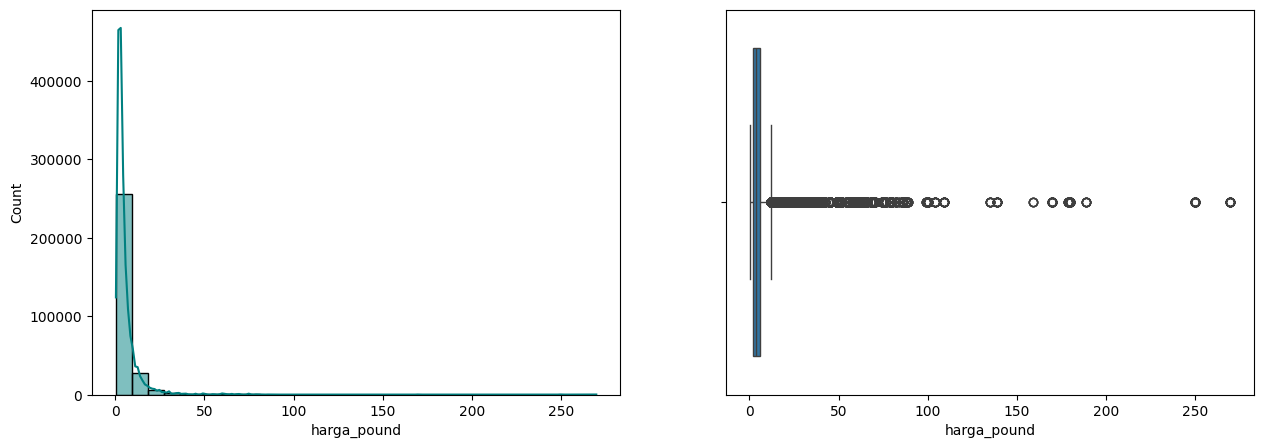

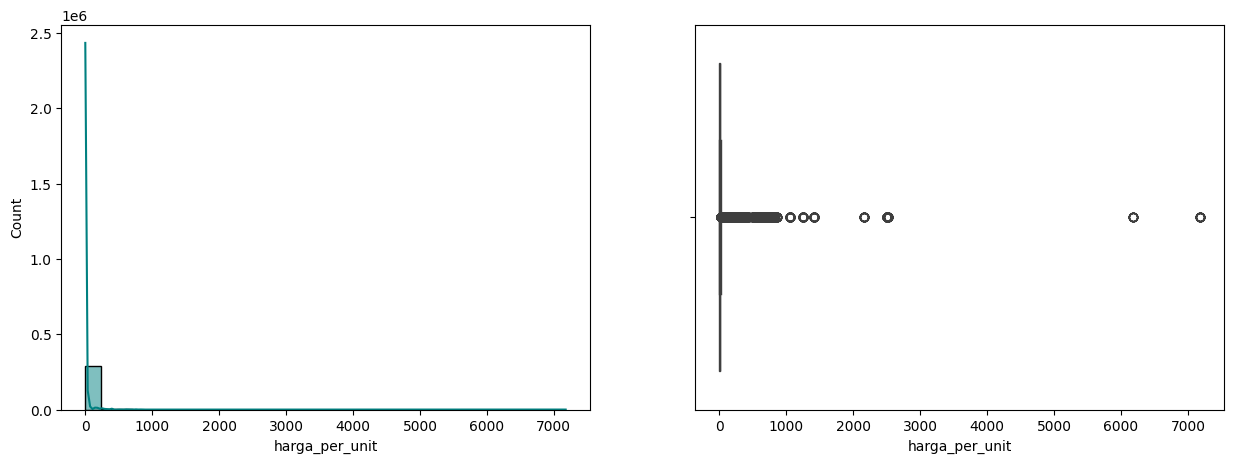

In [ ]:
# visualisasi distribusi data dan outliers
hist_bp_viz(kat_household, 'harga_pound')
hist_bp_viz(kat_household, 'harga_per_unit')

In [ ]:
# memeriksa harga terendah dan tertinggi pada kategori harga_pound
print('Harga jual terendah: ', kat_household['harga_pound'].min())
print('Harga jual tertinggi: ', kat_household['harga_pound'].max())
print()
print('Harga per unit terendah: ', kat_household['harga_per_unit'].min())
print('Harga per unit tertinggi: ', kat_household['harga_per_unit'].max())

Harga jual terendah:  0.3
Harga jual tertinggi:  269.99

Harga per unit terendah:  0.0
Harga per unit tertinggi:  7177.03


In [ ]:
kat_household[kat_household['harga_pound'] >= 150]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,nama_toko,harga_pound,harga_per_unit,unit,id_produk,id_kategori,brand_sendiri,tanggal
8939,CVFamz,179.00,179.00,unit,P094657,K10,False,2024-02-27
73554,UKMart,170.00,170.00,unit,P044047,K10,False,2024-02-13
89925,CVFamz,269.99,269.99,unit,P094658,K10,False,2024-02-09
127391,CVFamz,179.00,179.00,unit,P094657,K10,False,2024-01-31
132542,CVFamz,269.99,269.99,unit,P094658,K10,False,2024-01-30
...,...,...,...,...,...,...,...,...
4944463,CVFamz,249.99,249.99,unit,P094657,K10,False,2021-01-26
4944469,CVFamz,159.00,159.00,unit,P094658,K10,False,2021-01-26
4975830,CVFamz,249.99,249.99,unit,P094657,K10,False,2021-01-19
4975844,CVFamz,179.99,179.99,unit,P094656,K10,False,2021-01-19


In [ ]:
kat_household[kat_household['harga_per_unit'] >= 1000]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,nama_toko,harga_pound,harga_per_unit,unit,id_produk,id_kategori,brand_sendiri,tanggal
10821,BritishMart,2.50,1250.00,l,P029688,K10,False,2024-02-27
21284,UKMart,9.00,7177.03,l,P029113,K10,False,2024-02-25
25328,UKMart,9.50,1055.56,l,P110600,K10,False,2024-02-24
53789,BritishMart,2.50,2500.00,l,P118202,K10,False,2024-02-17
53892,BritishMart,2.50,2500.00,l,P118222,K10,False,2024-02-17
...,...,...,...,...,...,...,...,...
4978073,CVFamz,9.95,1421.00,l,P082310,K10,False,2021-01-19
4980849,BritishMart,2.50,2500.00,l,P118202,K10,False,2021-01-18
4980891,BritishMart,2.50,2500.00,l,P118222,K10,False,2021-01-18
4996549,UKMart,9.50,1055.56,l,P110600,K10,False,2021-01-14


####**Kategori pets**

In [ ]:
# memeriksa outliers berdasarkan kategori pets
kat_pets = mart_df_cleaned_sorted.loc[mart_df_cleaned_sorted['id_kategori'] == 'K11']
print_outliers(kat_pets, list_num_cols)

Total outliers pada kolom harga_pound: 10930
Persentase outliers terhadap keseluruhan data: 6.931%
Batas atas: 12.149999999999999
Batas bawah: -4.25

Total outliers pada kolom harga_per_unit: 18238
Persentase outliers terhadap keseluruhan data: 11.564%
Batas atas: 24.45
Batas bawah: -9.229999999999999



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


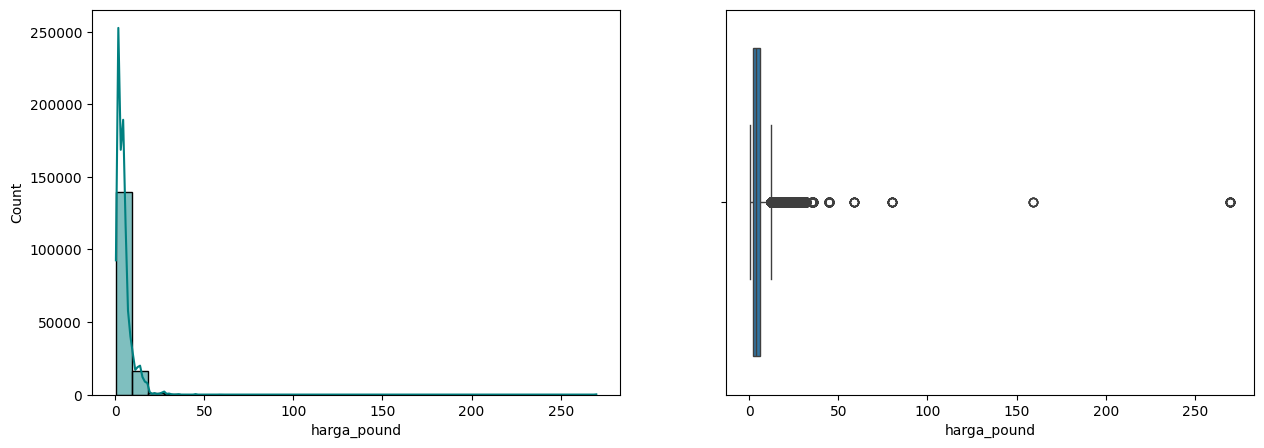

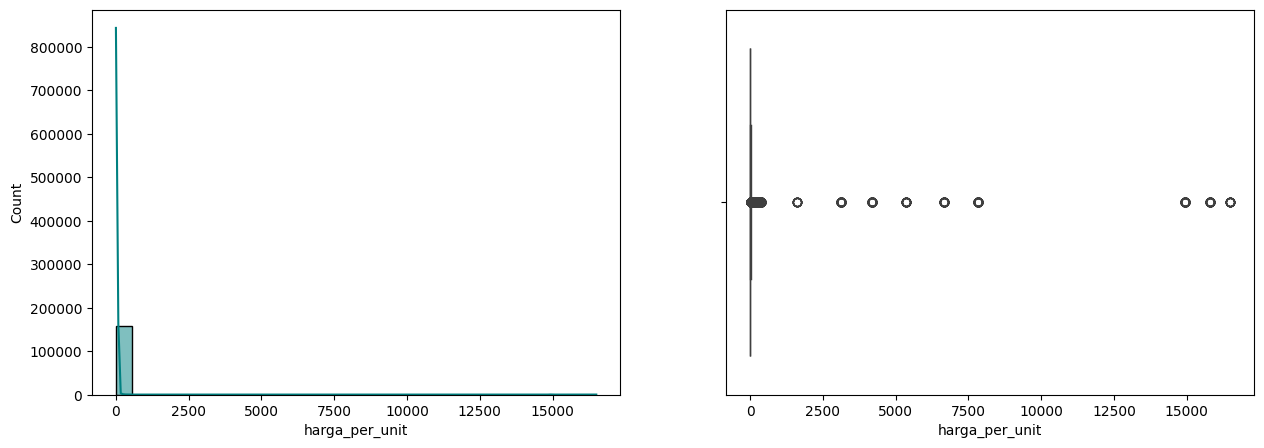

In [ ]:
# visualisasi distribusi data dan outliers
hist_bp_viz(kat_pets, 'harga_pound')
hist_bp_viz(kat_pets, 'harga_per_unit')

In [ ]:
# memeriksa harga terendah dan tertinggi pada kategori harga_pound
print('Harga jual terendah: ', kat_pets['harga_pound'].min())
print('Harga jual tertinggi: ', kat_pets['harga_pound'].max())
print()
print('Harga per unit terendah: ', kat_pets['harga_per_unit'].min())
print('Harga per unit tertinggi: ', kat_pets['harga_per_unit'].max())

Harga jual terendah:  0.4
Harga jual tertinggi:  269.99

Harga per unit terendah:  0.01
Harga per unit tertinggi:  16500.0


In [ ]:
kat_pets[kat_pets['harga_pound'] >= 100]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,nama_toko,harga_pound,harga_per_unit,unit,id_produk,id_kategori,brand_sendiri,tanggal
394764,CVFamz,269.99,269.99,unit,P094658,K11,False,2023-12-01
499815,CVFamz,269.99,269.99,unit,P094658,K11,False,2023-11-07
596041,CVFamz,269.99,269.99,unit,P094658,K11,False,2023-10-16
708957,CVFamz,269.99,269.99,unit,P094658,K11,False,2023-09-21
800588,CVFamz,269.99,269.99,unit,P094658,K11,False,2023-08-31
894069,CVFamz,269.99,269.99,unit,P094658,K11,False,2023-08-09
1191692,CVFamz,269.99,269.99,unit,P094658,K11,False,2023-06-02
2422829,CVFamz,269.99,269.99,unit,P094658,K11,False,2022-08-25
2526043,CVFamz,269.99,269.99,unit,P094658,K11,False,2022-08-01
2626862,CVFamz,269.99,269.99,unit,P094658,K11,False,2022-07-09


In [ ]:
kat_pets[kat_pets['harga_per_unit'] >= 1000]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,nama_toko,harga_pound,harga_per_unit,unit,id_produk,id_kategori,brand_sendiri,tanggal
44665,BritishMart,18.70,6678.60,kg,P079914,K11,False,2024-02-19
50218,ScottishMart,7.90,15800.00,l,P031898,K11,False,2024-02-18
52372,BritishMart,8.40,3111.10,kg,P009896,K11,False,2024-02-18
67988,ScottishMart,10.00,14925.37,l,P031905,K11,False,2024-02-14
71788,ScottishMart,11.25,4197.76,l,P031903,K11,False,2024-02-13
...,...,...,...,...,...,...,...,...
4971099,ScottishMart,11.25,4197.76,l,P031903,K11,False,2021-01-20
4989999,BritishMart,18.70,6678.60,kg,P079914,K11,False,2021-01-16
4990008,BritishMart,8.40,3111.10,kg,P009896,K11,False,2021-01-16
5027016,ScottishMart,8.25,16500.00,l,P031898,K11,False,2021-01-07


### **Hasil Analisis *Outliers***

> Setelah diperiksa nilai-nilai *outliers* dengan rentang jarak yang cukup berjauhan dari kedua kolom, ditemukan bahwa *outliers* tersebut masuk akal. Contohnya seperti pada kolom `harga_per_unit`, nilainya menjadi besar karena terjadi penyesuaian harga dengan satuan unit produk. Misalkan berdasarkan netto produk, untuk produk yang beratnya gram, harga_per_unit akan disesuaikan untuk bisa mencapai 1kg (sesuai nilai pada kolom unit). Hal ini berlaku pada produk di semua kategori. Maka dari itu, untuk *outliers* pada semua kolom dapat dibiarkan karena mengandung informasi yang relevan.

## **Modelling**

> Bagian ini mencakup proses pemodelan, dimulai dari pembuatan basket, meminta input user, menghasilkan rekomendasi kategori yang relevan, hingga menghasilkan rekomendasi produk yang relevan.

### **Market Basket Analysis (A priori) Recommendation System**

In [ ]:
# fungsi grouping basket berdasarkan kategori
def grouping_basket_by_kategori(df):

  grouped_basket = df.groupby(['nama_toko', 'tanggal'])['id_kategori'].apply(lambda x: list(set(x))).reset_index()

  grouped_basket['jmlh_kategori'] = grouped_basket['id_kategori'].apply(len)

  return grouped_basket

In [ ]:
basket_kategori = grouping_basket_by_kategori(mart_df_cleaned_sorted)
basket_kategori

,nama_toko,tanggal,id_kategori,jmlh_kategori
0,BritishMart,2021-01-01,"[K09, K03]",2
1,BritishMart,2021-01-02,"[K08, K03]",2
2,BritishMart,2021-01-03,"[K03, K09]",2
3,BritishMart,2021-01-04,"[K08, K06, K04, K09]",4
4,BritishMart,2021-01-05,"[K07, K06, K09]",3
...,...,...,...,...
5770,UKMart,2024-02-25,"[K07, K02, K01, K08, K04, K09, K03, K06, K11, ...",11
5771,UKMart,2024-02-26,"[K07, K02, K01, K08, K04, K09, K03, K06, K11, ...",11
5772,UKMart,2024-02-27,"[K07, K02, K01, K08, K04, K09, K03, K06, K11, ...",11
5773,UKMart,2024-02-28,"[K07, K02, K01, K08, K04, K09, K03, K06, K11, ...",11


> Basket yang dibuat berisi data transaksi produk berdasarkan tanggal transaksi. Namun, isi basket dikelompokkan berdasarkan kategori produknya, bukan produk individual. Pendekatan ini dipilih karena jumlah kategori produk jauh lebih sedikit dibandingkan dengan jumlah produk yang terjual. Hal ini membuat penerapan algoritma apriori lebih efisien dan memungkinkan untuk dilakukan pada skala data yang lebih besar.

In [ ]:
total_basket = basket_kategori.shape[0]
total_basket_per_mart = round((basket_kategori.shape[0]) / 5)

print(f'Total basket : {total_basket} basket')
print(f'Total basket per mart : {total_basket_per_mart} basket')

Total basket : 5775 basket
Total basket per mart : 1155 basket


In [ ]:
# fungsi untuk memeriksa basket pada setiap mart
def cek_basket(grouped_df):
  for nama_toko, data_by_toko in grouped_df:
    print(f'Nama mart: {nama_toko}')

    basket_unik = data_by_toko['tanggal'][(data_by_toko['nama_toko'] == nama_toko)].nunique()
    print(f'Total basket: {basket_unik} \n')

In [ ]:
cek_basket(basket_kategori.groupby('nama_toko'))

Nama mart: BritishMart
Total basket: 1155 

Nama mart: CVFamz
Total basket: 1155 

Nama mart: CVanyMart
Total basket: 1155 

Nama mart: ScottishMart
Total basket: 1155 

Nama mart: UKMart
Total basket: 1155 



> Setelah diperiksa, ternyata jumlah basket pada setiap mart sama, yaitu sebanyak 1155.

#### **Proses Modeling Market Basket Analysis**

In [ ]:
# melakukan train test split pada data
basket_kategori_train = basket_kategori[basket_kategori['tanggal'] < '2023-01-01']
basket_kategori_test = basket_kategori[basket_kategori['tanggal'] >= '2023-01-01']

> Data basket dibagi untuk proses training dan testing. Hal ini dilakukan untuk melihat serta mengukur performa model.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

class MarketBasketAnalysis:
  def __init__(self, basket_kategori):
    self.basket_kategori = basket_kategori

  # fungsi untuk menyimpan data basket sesuai input mart yang dipilih
  def create_basket_per_mart(self, nama_mart):
    self.basket_per_mart = self.basket_kategori[self.basket_kategori['nama_toko'] == nama_mart]
    return self.basket_per_mart

  # fungsi untuk men-encode data basket
  def encode_basket_data(self):
    te = TransactionEncoder()

    # fit dan transform data ke encoder
    encoded_arr = te.fit_transform(self.basket_per_mart['id_kategori'])

    # menjadikan hasil encoding ke sebuah dataframe
    self.encoded_basket_df = pd.DataFrame(encoded_arr, columns= te.columns_)

    return self.encoded_basket_df

  # fungsi untuk menampilkan tabel frequent itemsets dan association rules menggunakan algo. apriori
  def apriori_rules(self, min_support=0.5, min_confidence=0.5):
    # menemukan frequent itemsets dengan menggunakan algoritma apriori
    frequent_itemsets = apriori(self.encoded_basket_df, min_support=min_support, use_colnames=True)

    # menghitung association rules
    rules = association_rules(frequent_itemsets, metric='confidence', min_threshold = min_confidence)

    return frequent_itemsets, rules

  # fungsi untuk merekomendasikan kategori produk yang sering dibeli bersama kategori yang diinginkan
  def recommend_product_category(self, kategori_dibeli, rules):
    recommendations = []

    for index, row in rules.iterrows():
        antecedents = set(row['antecedents'])
        consequents = set(row['consequents'])
        if kategori_dibeli in antecedents: # memeriksa apakah kategori_dibeli ada di antecedents
            confidence = row['confidence']
            recommendations.append((consequents, confidence))

    # mengurutkan rekomendasi berdasarkan metrics confidence secara descending
    recommendations.sort(key=lambda x: x[1], reverse=True)

    # memilih dua kategori pertama dari rekomendasi (dari nilai confidence yang terbesar)
    recommendation_list = [item[0] for item in recommendations[:2]]

    return recommendation_list

In [ ]:
# fungsi meminta input id produk
def get_id_produk():
  produk_dibeli = input('Masukkan id produk (P000001-P118460): ')
  return produk_dibeli

In [ ]:
# fungsi meminta input nama mart
def get_nama_mart(df, id_produk):
  list_mart = ['BritishMart', 'CVanyMart', 'CVFamz', 'ScottishMart', 'UKMart']
  available_in = []

  for mart in list_mart:
    if ((df['nama_toko'] == mart) & (df['id_produk'] == id_produk)).any():
      available_in.append(mart)

  if available_in:
    print(f'Produk dengan ID {id_produk} tersedia di toko: {", ".join(available_in)}')
    nama_mart = input('Masukkan pilihan mart (contoh: BritishMart):').strip()

  # meminta input kembali apabila nama toko tidak sesuai
  while nama_mart not in available_in:
    print('Produk tidak tersedia pada mart yang Anda pilih. Silakan coba kembali.')
    nama_mart = input('Masukkan pilihan mart (contoh: BritishMart):').strip()

  return nama_mart

In [ ]:
# menginisialisasi objek mba
mba = MarketBasketAnalysis(basket_kategori_train)

In [ ]:
# menerima input pengguna
produk_dibeli = get_id_produk()
print()
nama_mart = get_nama_mart(mart_df_cleaned_sorted, produk_dibeli)

Masukkan id produk (P000001-P118460): P108228

Produk dengan ID P108228 tersedia di toko: ScottishMart
Masukkan pilihan mart (contoh: BritishMart):ScottishMart


In [ ]:
# mencetak informasi kategori yang dibeli
kategori_dibeli = produk_df.loc[produk_df['id_produk'] == produk_dibeli, 'id_kategori'].values[0]
print(f'Kategori yang dibeli: {kategori_dibeli}')

Kategori yang dibeli: K09


In [ ]:
# membuat basket berdasarkan mart yang dipilih
basket_kategori = mba.create_basket_per_mart(nama_mart)
basket_kategori

,nama_toko,tanggal,id_kategori,jmlh_kategori
3465,ScottishMart,2021-01-01,"[K07, K02, K01, K08, K04, K09, K03, K06, K11, ...",10
3466,ScottishMart,2021-01-02,"[K07, K02, K01, K08, K04, K09, K03, K06, K11, ...",10
3467,ScottishMart,2021-01-03,"[K07, K02, K01, K08, K04, K09, K03, K06, K10]",9
3468,ScottishMart,2021-01-04,"[K07, K02, K01, K08, K04, K09, K03, K06, K11, ...",10
3469,ScottishMart,2021-01-05,"[K07, K02, K01, K08, K04, K09, K03, K06, K11, ...",10
...,...,...,...,...
4190,ScottishMart,2022-12-27,"[K07, K02, K01, K08, K04, K09, K03, K06, K11, ...",10
4191,ScottishMart,2022-12-28,"[K07, K02, K01, K08, K04, K09, K03, K06, K11, ...",10
4192,ScottishMart,2022-12-29,"[K07, K02, K01, K08, K04, K09, K03, K06, K11, ...",10
4193,ScottishMart,2022-12-30,"[K07, K02, K01, K08, K04, K09, K03, K06, K11, ...",10


In [ ]:
# melakukan encoding terhadap data basket
basket_encoded = mba.encode_basket_data()
basket_encoded

,K01,K02,K03,K04,K06,K07,K08,K09,K10,K11
0,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,False
3,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...
725,True,True,True,True,True,True,True,True,True,True
726,True,True,True,True,True,True,True,True,True,True
727,True,True,True,True,True,True,True,True,True,True
728,True,True,True,True,True,True,True,True,True,True


In [ ]:
# menampilkan tabel frequent itemsets dan association rules
frequent_itemsets, rules = mba.apriori_rules(min_support=0.5, min_confidence=0.5)

In [ ]:
frequent_itemsets

,support,itemsets
0,1.000000,(K01)
1,0.997260,(K02)
2,1.000000,(K03)
3,1.000000,(K04)
4,1.000000,(K06)
...,...,...
1018,0.984932,"(K07, K02, K01, K08, K09, K03, K06, K11, K10)"
1019,0.984932,"(K07, K02, K01, K08, K04, K09, K06, K11, K10)"
1020,0.987671,"(K07, K01, K08, K04, K09, K03, K06, K11, K10)"
1021,0.984932,"(K07, K02, K08, K04, K09, K03, K06, K11, K10)"


In [ ]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(K02),(K01),0.997260,1.000000,0.997260,1.000000,1.000000,0.000000,inf,0.000000
1,(K01),(K02),1.000000,0.997260,0.997260,0.997260,1.000000,0.000000,1.000000,0.000000
2,(K03),(K01),1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,inf,0.000000
3,(K01),(K03),1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,inf,0.000000
4,(K04),(K01),1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,inf,0.000000
...,...,...,...,...,...,...,...,...,...,...
56997,(K09),"(K07, K02, K01, K08, K04, K03, K06, K11, K10)",1.000000,0.984932,0.984932,0.984932,1.000000,0.000000,1.000000,0.000000
56998,(K03),"(K07, K02, K01, K08, K04, K09, K06, K11, K10)",1.000000,0.984932,0.984932,0.984932,1.000000,0.000000,1.000000,0.000000
56999,(K06),"(K07, K02, K01, K08, K04, K09, K03, K11, K10)",1.000000,0.984932,0.984932,0.984932,1.000000,0.000000,1.000000,0.000000
57000,(K11),"(K07, K02, K01, K08, K04, K09, K03, K06, K10)",0.987671,0.997260,0.984932,0.997226,0.999966,-0.000034,0.987671,-0.002774


In [ ]:
# menghasilkan rekomendasi kategori
recommendations = mba.recommend_product_category(kategori_dibeli, rules)
print('Rekomendasi kategori: ', recommendations)

Rekomendasi kategori:  [{'K01'}, {'K03'}]


#### **Metrics Evaluation**

In [ ]:
# mengubah hasil rekomendasi kategori dari list of sets menjadi set
recommendations_set = set.union(*recommendations)
recommendations_set

{'K01', 'K03'}

In [ ]:
# fungsi evaluasi model
def eval_model(test_data, kategori_dibeli, recommendations_set, model, rules):

  # menyimpan seluruh transaksi yang mengandung kategori_dibeli
  actual_transactions = set()
  for kategori_list in test_data['id_kategori']:
    if kategori_dibeli in kategori_list:
      actual_transactions.add(tuple(kategori_list))

  # menyimpan seluruh transaksi yang mengandung kategori rekomendasi dari actual transactions
  relevant_transactions = set()
  for transaction in actual_transactions:
    if any(cat in transaction for cat in recommendations_set):
      relevant_transactions.add(transaction)

  # evaluasi model menggunakan metrics recall
  recall = len(relevant_transactions) / len(actual_transactions) if len(actual_transactions) > 0 else 0

  print('Hasil evaluasi model menggunakan metrik recall:')
  print(f'Recall: {round(recall, 3)}')

  return recall, recommendations_set

In [ ]:
# evaluasi model
eval = eval_model(basket_kategori_test, kategori_dibeli, recommendations_set, mba, rules)

Hasil evaluasi model menggunakan metrik recall:
Recall: 0.94


> Pada evaluasi model, metrik yang digunakan adalah recall. Metrik ini digunakan karena recall membantu menilai sejauh mana model dapat merekomendasikan kategori yang sering muncul bersamaan dengan kategori dari produk yang dibeli.
> Terlihat hasil evaluasi cukup bagus. Namun, hasil ini bisa berubah tergantung input produk oleh user, bisa jadi lebih baik ataupun sedikit menurun. Hal ini bisa jadi disebabkan oleh bagaimana suatu kategori tersebut sering dibeli atau tidak yang bisa jadi memengaruhi performa model.

#### **Rekomendasi Produk**

> Setelah didapatkan daftar kategori rekomendasi, langkah selanjutnya adalah proses rekomendasi produk. Produk yang direkomendasikan akan dibagi menjadi tiga kelompok: kategori produk yang dibeli dan dua kategori dari rekomendasi. Produk yang direkomendasikan akan dihitung *similarity score*-nya terhadap produk yang dibeli (*product anchor*). Hasil akhirnya adalah rekomendasi 5 produk dari setiap kategori, yang terdiri dari kombinasi produk dari brand sendiri dan brand lain, yang disusun berdasarkan *similarity score*-nya.

In [ ]:
# menggabungkan kategori dan hasil rekomendasi kategori ke satu list
categories_list = list(recommendations_set)
categories_list.insert(0, kategori_dibeli)
categories_list

['K09', 'K03', 'K01']

In [ ]:
# fungsi untuk memfilter df dengan kategori yang termasuk pada list saja
def filter_by_cat(df, categories):
  filtered_df = df[df['id_kategori'].isin(categories)].reset_index(drop=True)
  return filtered_df

In [ ]:
recom_by_cat = filter_by_cat(mart_df_cleaned_sorted.drop(columns=['harga_per_unit', 'unit']), categories_list)
recom_by_cat = recom_by_cat[recom_by_cat['nama_toko'] == nama_mart].reset_index(drop=True)
recom_by_cat

,nama_toko,harga_pound,id_produk,id_kategori,brand_sendiri,tanggal
0,ScottishMart,9.00,P056958,K03,False,2024-02-29
1,ScottishMart,48.00,P053466,K03,False,2024-02-29
2,ScottishMart,4.75,P077524,K03,False,2024-02-29
3,ScottishMart,6.50,P017476,K03,False,2024-02-29
4,ScottishMart,2.50,P111709,K03,False,2024-02-29
...,...,...,...,...,...,...
368014,ScottishMart,1.25,P101523,K09,True,2021-01-01
368015,ScottishMart,1.25,P101522,K09,True,2021-01-01
368016,ScottishMart,1.25,P101521,K09,True,2021-01-01
368017,ScottishMart,1.25,P101519,K09,True,2021-01-01


In [ ]:
# menyimpan produk yang unik saja dari df yang telah difilter sebelumnya
recom_by_cat_unique = recom_by_cat.drop_duplicates(subset='id_produk').reset_index(drop=True)
recom_by_cat_unique = recom_by_cat_unique.merge(produk_df[['id_produk', 'nama']], on='id_produk', how='left')
recom_by_cat_unique

,nama_toko,harga_pound,id_produk,id_kategori,brand_sendiri,tanggal,nama
0,ScottishMart,9.00,P056958,K03,False,2024-02-29,Maison Castel Cotes Du Rhone Red 75Cl
1,ScottishMart,48.00,P053466,K03,False,2024-02-29,Lanson Le Vintage 75Cl
2,ScottishMart,4.75,P077524,K03,False,2024-02-29,Piccodoro Sicilian Rosso Red 75Cl
3,ScottishMart,6.50,P017476,K03,False,2024-02-29,Campaneo Old Vines Garnacha 75Cl
4,ScottishMart,2.50,P111709,K03,False,2024-02-29,Twinings 40 Spicy Chai T Bags 100G
...,...,...,...,...,...,...,...
10252,ScottishMart,1.15,P043540,K01,False,2021-01-09,Heinz Immunity Support Apple Banana & Cereals 85g
10253,ScottishMart,1.10,P031579,K01,True,2021-01-08,Fred & Flo 60 Head-to-Toe Extra Large fragranc...
10254,ScottishMart,2.60,P048167,K01,False,2021-01-06,Johnson's Baby Soothing Vapour Bath 300ml
10255,ScottishMart,3.50,P070430,K01,False,2021-01-06,Nuby Food Storage Pots 4m+ 4 Pack


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from numpy.linalg import norm
import pandas as pd
import numpy as np

class ProductRecommendations:
    def __init__(self, df):
        self.df = df

    # fungsi untuk menghitung similarity terhadap produk
    def calculate_similarity(self, produk_dibeli):
        tf_idf = TfidfVectorizer(stop_words='english')

        tf_idf_mtrx = tf_idf.fit_transform(self.df['nama'])

        idx_in_df = self.df.index[self.df['id_produk'] == produk_dibeli].tolist()[0]

        # menghitung similarity score menggunakan cosine similarity
        product_anchor_vector = tf_idf_mtrx[idx_in_df]

        similarity_score = []
        for i in range(tf_idf_mtrx.shape[0]):
            if i != idx_in_df:
                # menyimpan informasi produk
                vector_i = tf_idf_mtrx[i]
                id_produk_i = self.df.iloc[i]['id_produk']
                id_kategori_i = self.df.iloc[i]['id_kategori']
                harga_i = self.df.iloc[i]['harga_pound']
                brand_sendiri_i = self.df.iloc[i]['brand_sendiri']

                cosine_similarity = np.dot(product_anchor_vector.toarray(),
                                           vector_i.toarray().T) / (norm(product_anchor_vector.toarray()) * norm(vector_i.toarray()))

                similarity_score.append([i, id_produk_i, id_kategori_i, harga_i, brand_sendiri_i, round(cosine_similarity[0][0], 3)])

        # mengurutkan produk dari nilai similarity score tertinggi
        similarity_score = sorted(similarity_score, key=lambda x: x[-1], reverse=True)

        return similarity_score

    # fungsi untuk merekomendasikan produk berdasarkan nilai similarity score
    def recommend_relevant_products(self, similarity_score, num_recommendations=5):
        private_label_brand = []
        other_brand = []

        # menghitung nilai similarity score produk dengan product anchor
        for score in similarity_score:
            if self.df.loc[self.df['id_produk'] == score[1], 'brand_sendiri'].values[0] == True:
                private_label_brand.append(score)
            else:
                other_brand.append(score)

        # mengambil produk 3 produk relevan dari brand sendiri & 2 produk relevan dari brand lain
        relevant_products = private_label_brand[:3] + other_brand[:3]
        relevant_products_sorted = sorted(relevant_products, key=lambda x: x[-1], reverse=True)

        return relevant_products_sorted[:5]

    # fungsi alternatif untuk merekomendasikan top produk apabila nilai similarity score = 0
    def recommend_top_products(self, category):
        products_sold = self.df[self.df['id_kategori'] == category].groupby('id_produk').agg(
            jmlh_transaksi=('id_produk', 'size'),
            brand_sendiri=('brand_sendiri', 'first'),
            harga=('harga_pound', 'first')).sort_values(by='jmlh_transaksi', ascending=False).reset_index()

        # menyimpan gabungan top produk: 3 brand sendiri & 2 brand lain
        private_label_brands = products_sold[products_sold['brand_sendiri'] == True].head(3)
        other_brands = products_sold[products_sold['brand_sendiri'] == False].head(2)

        top_products = pd.concat([private_label_brands, other_brands]).reset_index(drop=True)

        top_products_lst = [(row['id_produk'], row['jmlh_transaksi'], row['brand_sendiri'], row['harga']) for _, row in top_products.iterrows()]

        return top_products_lst

    # fungsi untuk menampilkan hasil rekomendasi tergantung kasus
    def generate_prod_recom(self, produk_dibeli, categories, similarity_score):
        # mencetak relevan produk dengan kategori yang sama dengan kategori dibeli
        relevant_products = self.recommend_relevant_products(similarity_score)
        print('Rekomendasi produk lainnya dari kategori serupa:')
        for product in relevant_products:
            print(f'''- Id Produk: {product[1]}, Kategori: {product[2]}, Harga: {product[3]}, Brand Sendiri: {product[4]}, Similarity score: {product[-1]}''')
        print()

        # mencetak produk yang relevan ataupun top products dari rekomendasi kategori lainnya
        for category in categories[1:]:
            similar_products = [score for score in similarity_score if (score[-1] > 0) & (self.df.loc[self.df['id_produk'] == score[1],
                                                                                              'id_kategori'].values[0] == category)]
            if similar_products:
                plb_similar = [product for product in similar_products if product[4] == True][:3]
                ob_similar = [product for product in similar_products if product[4] == False][:3]
                relevant_similar_products = sorted((plb_similar + ob_similar), key=lambda x: x[-1], reverse=True)
                print(f'Rekomendasi produk yang relevan dari kategori rekomendasi {category}:')
                for product in relevant_similar_products[:5]:
                    print(f'''- Id Produk: {product[1]}, Kategori: {product[2]}, Harga: {product[3]}, Brand Sendiri: {product[4]}, Similarity score: {product[-1]}''')
                print()
            else:
                top_products = self.recommend_top_products(category)
                print(f'Rekomendasi produk unggulan dari kategori rekomendasi {category}:')
                for product in top_products:
                    print(f'''- Id Produk: {product[0]}, Kategori: {category}, Harga: {product[3]} , Brand Sendiri: {product[2]}''')
                print()

In [ ]:
# menginisialisasi objek mba
produkRecom = ProductRecommendations(recom_by_cat_unique)

In [ ]:
# menghitung similarity score
similarity_score = produkRecom.calculate_similarity(produk_dibeli)
similarity_score

[[624, 'P107613', 'K09', 5.0, True, 0.822],
 [8344, 'P102401', 'K09', 5.0, True, 0.821],
 [6913, 'P107609', 'K09', 5.0, True, 0.806],
 [5822, 'P107611', 'K09', 5.0, True, 0.775],
 [4781, 'P107608', 'K09', 5.0, True, 0.756],
 [6881, 'P103190', 'K09', 5.0, True, 0.755],
 [79, 'P107612', 'K09', 5.0, True, 0.725],
 [6865, 'P107700', 'K09', 5.0, True, 0.716],
 [6550, 'P107610', 'K09', 5.0, True, 0.711],
 [6921, 'P106994', 'K09', 5.0, True, 0.698],
 [9641, 'P105629', 'K09', 5.0, True, 0.676],
 [9693, 'P108227', 'K09', 9.0, True, 0.638],
 [197, 'P107607', 'K09', 7.0, True, 0.613],
 [6449, 'P102399', 'K09', 7.0, True, 0.612],
 [1454, 'P101537', 'K09', 3.5, True, 0.603],
 [7119, 'P107603', 'K09', 7.0, True, 0.601],
 [5983, 'P107614', 'K09', 5.0, True, 0.595],
 [4255, 'P107605', 'K09', 7.0, True, 0.576],
 [663, 'P103189', 'K09', 7.0, True, 0.56],
 [2993, 'P101686', 'K09', 4.0, True, 0.556],
 [1816, 'P107606', 'K09', 7.0, True, 0.536],
 [2482, 'P107699', 'K09', 7.0, True, 0.53],
 [5113, 'P107604'

In [ ]:
# menampilkan rekomendasi produk sesuai kategori
produkRecom.generate_prod_recom(produk_dibeli, categories_list, similarity_score)

Rekomendasi produk lainnya dari kategori serupa:
- Id Produk: P107613, Kategori: K09, Harga: 5.0, Brand Sendiri: True, Similarity score: 0.822
- Id Produk: P102401, Kategori: K09, Harga: 5.0, Brand Sendiri: True, Similarity score: 0.821
- Id Produk: P107609, Kategori: K09, Harga: 5.0, Brand Sendiri: True, Similarity score: 0.806
- Id Produk: P115796, Kategori: K09, Harga: 9.0, Brand Sendiri: False, Similarity score: 0.307
- Id Produk: P083417, Kategori: K09, Harga: 5.0, Brand Sendiri: False, Similarity score: 0.279

Rekomendasi produk yang relevan dari kategori rekomendasi K03:
- Id Produk: P117503, Kategori: K03, Harga: 7.75, Brand Sendiri: False, Similarity score: 0.267
- Id Produk: P117474, Kategori: K03, Harga: 7.75, Brand Sendiri: False, Similarity score: 0.257
- Id Produk: P117512, Kategori: K03, Harga: 7.75, Brand Sendiri: False, Similarity score: 0.256
- Id Produk: P105607, Kategori: K03, Harga: 0.55, Brand Sendiri: True, Similarity score: 0.056
- Id Produk: P105452, Kategori: 

> Untuk rekomendasi produk, akan diambil 6 produk (3 brand sendiri & 3 other brand) dengan nilai *similarity score* terbesar, tetapi tetap akan ditampilkan 5 terbesarnya.

> Ketika melakukan rekomendasi produk dari kategori yang tidak sama dengan kategori pembelian, wajar saja jika nilai *similarity score*-nya cenderung rendah. Hal ini disebabkan oleh perbedaan sifat dan karakteristik antara kategori produk tersebut. Model menghitung *similarity score* berdasarkan informasi dari nama produk, tetapi untuk kategori yang berbeda, informasi yang relevan mungkin tidak selalu tersedia. Kategori yang berbeda cenderung memiliki jenis produk yang berbeda pula sehingga kesamaan dalam nama produk atau merek seringkali menjadi satu-satunya titik persamaan yang dapat dihitung.